In [30]:
# 4.1 라이브러리 로드하고 한글폰트 설정하기 (06:19) 

### **1. Are there any differences in health checkup scores depending on whether or not you drink?**

In [31]:
# 음주 여부에 따라 건강검진 수치 차이가 있을까?

### **2. Are height and waist size correlated with weight?**

In [32]:
# 신장과 허리둘레의 크기는 체중과 상관관계가 있을까?

- 분석을 통해 가설을 검증해 봅니다.

### **3. Library load**

In [1]:
# 분석에 사용할 pandas, 수치계산에 사용할 numpy, 시각화에 사용할 seaborn을 불러옵니다.
# 또 구 버전의 주피터 노트북에서는 %matplotlib inline 설정이 되어야 노트북 안에서 그래프를 시각화 합니다.abs

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# %matplotlib inline

### **4. Font setting**

In [34]:
# # Google Colab 사용 시 아래 주석을 풀고 폰트설정을 합니다.
# # 로컬 아나콘다 사용 시에는 그대로 주석처리를 해놓으면 됩니다.
# # 나눔고딕 설치
# # 이 코드를 사용시 아래에 있는 폰트를 로드할 경우 colab에서는 오류가 발생하니
# # 아래에 있는 폰트 설정은 꼭 주석처리를 해주세요.
# !apt -qq -y install fonts-nanum > /dev/null

# import matplotlib.font_manager as fm

# fontpath = 'usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=9)
# fm._rebuild()

# # Colab 의 한글 폰트 설정
# plt.rc('font', family='NanumGothic')
# # 마이너스 폰트 깨지는 문제에 대한 대처
# plt.rc("axes", unicode_minus=False)

In [2]:
# 한글폰트를 설정해 주지 않으면 그래프 상에서 한글이 깨져보입니다.
# 한글이 출력될 수 있도록 폰트 설정을 해줍니다.
# 운영체제별 설정을 위해 로드 합니다.
import os

# 윈도우, 맥 이외 OS는 별도로 설정해 주세요.
print(os.name)

if os.name == 'nt':
    plt.rc('font', family='Malgun Gothic') # window 용
else:
    plt.rc('font', family='AppleGothic') # Mac 용
    
# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc("axes", unicode_minus =False)


nt


In [3]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'


***

In [37]:
# 4.2 데이터셋 소개와 로드하기 - 가설세우기 (14:05)

### **5. Data load**

- 건강검진정보란 2002년부터 2013년까지의 국민건강보험의 직장가입자와 40세 이상의 피부양자, 세대주인 지역가입자와 
40세 이상의 지역가입자의 일반건강검진 결과와 이들 일반건강검진 대상자 중에 만 40세와 만 66에 도달한 이들이 받게 되는 생애전환기 건강진단 수검이력이 있는 각 연도별 수진자 
100만명에 대한 기본정보(성, 연령대, 시도코드 등)와 검진내역(신장, 체중, 총 콜레스테롤, 혈색소 등)으로 구성된 개방데이터이다

공공데이터 개방 서비스([https://www.data.go.kr/dataset/15007122/fileData.do](https://www.data.go.kr/dataset/15007122/fileData.do))에서도 다운 받을 수 있음.

- 건강검진정보(20117) 다운로드: 홈페이지
- 2018년 데이터로 실습을 하셔도 됩니다. 다만 encoding과 컬럼명이 달라서 2018 데이터에 맞게 고쳐주시면 됩니다.
- 2018년 외 다른 연도의 데이터로도 실습을 하고자 한다면 컬럼명과 인코딩에 주의해 주세요.

In [4]:
# 다운로드 받은 파일을 판다스의 read_csv 를 통해 읽어옵니다.
# 퍼알을 읽어온 후 shape로 행과 열의 수를 출력합니다.
# # euckr(한글23502자) or cp949(11172자)"

df= pd.read_csv("datadori/4.2.2 NHIS_OPEN_GJ_2017.csv", encoding = "cp949")

df.shape

(1000000, 34)

#### **5.1 data preview**

In [39]:
# sample, head, tail을 통해 데이터를 미리보기 합니다.

df.head()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  시력(좌)  \
0  2017        1     1           13    46      170.0        65.0  91.0    1.0   
1  2017        2     2            8    41      150.0        45.0  73.4    1.2   
2  2017        3     1            8    45      175.0        75.0  94.0    1.0   
3  2017        4     2           12    11      155.0        55.0  67.5    0.9   
4  2017        5     1            8    41      175.0        75.0  93.0    1.5   

   시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  치아마모증유무  \
0    1.2  ...   25.0   3.0   0.0          1      NaN    NaN      NaN   
1    1.0  ...   10.0   1.0   0.0          1      NaN    NaN      NaN   
2    0.8  ...  136.0   1.0   0.0          1      NaN    NaN      NaN   
3    1.0  ...   30.0   1.0   1.0          0      NaN    NaN      NaN   
4    1.5  ...   68.0   3.0   0.0          0      NaN    NaN      NaN   

   제3대구치(사랑니)이상   치석   데이터공개일자  
0           NaN  1.0  20181126  
1           NaN  1.0  20181126  
2           NaN  0.0  20181126  
3           NaN  NaN  20181126  
4           NaN  NaN  20181126  

[5 rows x 34 columns]

In [40]:
df.tail() # shuft+ tab 하면 정보확인 가능

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  \
999995  2017   999996     2            9    41      165.0        55.0  70.0   
999996  2017   999997     2            9    11      165.0        50.0  68.0   
999997  2017   999998     2           12    27      155.0        50.0  83.8   
999998  2017   999999     1           11    47      160.0        70.0  99.0   
999999  2017  1000000     2            9    27      165.0        60.0  74.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  \
999995    1.5    1.5  ...   11.0   1.0   1.0          0      NaN    NaN   
999996    1.2    1.5  ...   11.0   1.0   0.0          1      NaN    NaN   
999997    0.2    1.0  ...   12.0   1.0   0.0          1      NaN    NaN   
999998    0.8    0.9  ...   35.0   2.0   1.0          0      NaN    NaN   
999999    1.2    1.2  ...   15.0   1.0   0.0          0      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석   데이터공개일자  
999995      NaN           NaN  NaN  20181126  
999996      NaN           NaN  0.0  20181126  
999997      NaN           NaN  0.0  20181126  
999998      NaN           NaN  NaN  20181126  
999999      NaN           NaN  NaN  20181126  

[5 rows x 34 columns]

In [41]:
df.sample()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  \
871848  2017   871849     1           14    11      165.0        75.0  95.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  \
871848    9.9    9.9  ...   25.0   3.0   0.0          0      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상  치석   데이터공개일자  
871848      NaN           NaN NaN  20181126  

[1 rows x 34 columns]

### **6. View basic information**

In [42]:
# info를 통해 데이터의 크기, 형식, 메모리 사용량 등을 봅니다.

df.info()
# "치아 우식증유무" 등 과 같은 결측치 데이터를 삭제하여 메모리를 줄일수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [43]:
# 컬럼의 수가 많습니다. 컬럼만 따로 출력합니다.

df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

In [44]:
# dtypes 을 통해 데이터 형식만 출력합니다.

df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)       float64
체중(5Kg 단위)      float64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부            float64
구강검진 수검여부         int64
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석              float64
데이터공개일자           int64
dtype: object

***

In [45]:
# 4.3 로드한 데이터의 결측치를 보고 요약, 집계하기 (10:14)
# - info, isnull, value_counts

### **7. View missing values**

In [46]:
# isnull 을 통해 결측치를 bool 값으로 표시하고 sum을 하면 컬럼마다의 결측치 수를 세어숩니다.

df.isnull() 
# missing value = True ( not missiong value = False)
# True == 1: 따라서 True + True + False = 2

기준년도  가입자일련번호   성별코드  연령대코드(5세단위)   시도코드  신장(5Cm단위)  체중(5Kg 단위)  \
0       False    False  False        False  False      False       False   
1       False    False  False        False  False      False       False   
2       False    False  False        False  False      False       False   
3       False    False  False        False  False      False       False   
4       False    False  False        False  False      False       False   
...       ...      ...    ...          ...    ...        ...         ...   
999995  False    False  False        False  False      False       False   
999996  False    False  False        False  False      False       False   
999997  False    False  False        False  False      False       False   
999998  False    False  False        False  False      False       False   
999999  False    False  False        False  False      False       False   

         허리둘레  시력(좌)  시력(우)  ...  감마지티피   흡연상태   음주여부  구강검진 수검여부  치아우식증유무  \
0       False  False  False  ...  False  False  False      False     True   
1       False  False  False  ...  False  False  False      False     True   
2       False  False  False  ...  False  False  False      False     True   
3       False  False  False  ...  False  False  False      False     True   
4       False  False  False  ...  False  False  False      False     True   
...       ...    ...    ...  ...    ...    ...    ...        ...      ...   
999995  False  False  False  ...  False  False  False      False     True   
999996  False  False  False  ...  False  False  False      False     True   
999997  False  False  False  ...  False  False  False      False     True   
999998  False  False  False  ...  False  False  False      False     True   
999999  False  False  False  ...  False  False  False      False     True   

        결손치유무  치아마모증유무  제3대구치(사랑니)이상     치석  데이터공개일자  
0        True     True          True  False    False  
1        True     True          True  False    False  
2        True     True          True  False    False  
3        True     True          True   True    False  
4        True     True          True   True    False  
...       ...      ...           ...    ...      ...  
999995   True     True          True   True    False  
999996   True     True          True  False    False  
999997   True     True          True  False    False  
999998   True     True          True   True    False  
999999   True     True          True   True    False  

[1000000 rows x 34 columns]

In [47]:
df.isnull().sum()

# 치아우식증유무, 결손치유무, 치아마모증유무, 제3대구치(사랑니)이상  :  전부 결측치 (1000000)

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)           262
체중(5Kg 단위)          268
허리둘레                440
시력(좌)               288
시력(우)               279
청력(좌)               242
청력(우)               243
수축기혈압                76
이완기혈압                77
식전혈당(공복혈당)           43
총콜레스테롤               43
트리글리세라이드             43
HDL콜레스테롤             44
LDL콜레스테롤           2899
혈색소                  56
요단백                4859
혈청크레아티닌              44
(혈청지오티)AST           42
(혈청지오티)ALT           44
감마지티피                45
흡연상태                160
음주여부                525
구강검진 수검여부             0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               601252
데이터공개일자               0
dtype: int64

In [48]:
# isna 로도 결측치 여부를 확인하고 sum 을 통해 결측치 수를 집계할 수 있습니다.

df.isna().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)           262
체중(5Kg 단위)          268
허리둘레                440
시력(좌)               288
시력(우)               279
청력(좌)               242
청력(우)               243
수축기혈압                76
이완기혈압                77
식전혈당(공복혈당)           43
총콜레스테롤               43
트리글리세라이드             43
HDL콜레스테롤             44
LDL콜레스테롤           2899
혈색소                  56
요단백                4859
혈청크레아티닌              44
(혈청지오티)AST           42
(혈청지오티)ALT           44
감마지티피                45
흡연상태                160
음주여부                525
구강검진 수검여부             0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               601252
데이터공개일자               0
dtype: int64

<AxesSubplot:>

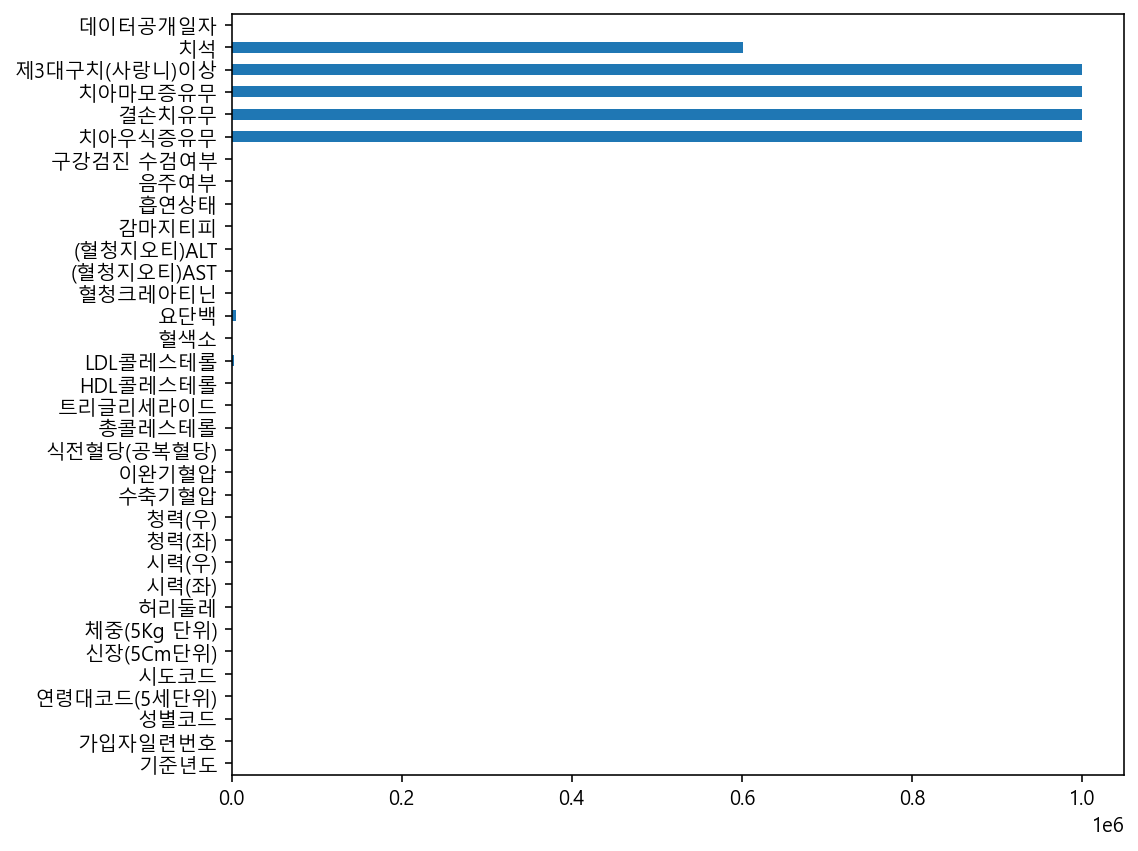

In [49]:
# pandas에 내장 된 plot 을 통해 시각화를 합니다.

df.isnull().sum().plot.barh(figsize=(8,7))

### **8. Summarize some datas**

In [50]:
# 여러 컬럼을 가져옵니다.
# "(혈청지오티)ALT", "(혈청지오티)AST"를 가져와 미리보기 합니다.

df[["(혈청지오티)ALT", "(혈청지오티)AST"]].head() # 2개 이상은 리스트구조[[,]]로..

(혈청지오티)ALT  (혈청지오티)AST
0        41.0        19.0
1        13.0        16.0
2        62.0        45.0
3        24.0        21.0
4        62.0        37.0

In [51]:
# "(혈청지오티)ALT", "(혈청지오티)AST" 를 요약합니다.

df[["(혈청지오티)ALT", "(혈청지오티)AST"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   (혈청지오티)ALT  999956 non-null  float64
 1   (혈청지오티)AST  999958 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB


In [52]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].describe()

(혈청지오티)ALT     (혈청지오티)AST
count  999956.000000  999958.000000
mean       25.859343      26.075068
std        25.814268      24.437136
min         1.000000       1.000000
25%        15.000000      19.000000
50%        20.000000      23.000000
75%        30.000000      28.000000
max      6710.000000    9999.000000

### **9. Aggregating values with `value_counts`**

In [53]:
# value_counts 를 통해 성별코드로 그룹화 하고 갯수를 집계합니다.

df["성별코드"].value_counts()

# 남성데이터(1)가 여성데이터(2)보다 많음

1    531172
2    468828
Name: 성별코드, dtype: int64

In [54]:
# value_counts 를 통해 흡연상태로 그룹화 하고 갯수를 집계합니다.

df["흡연상태"].value_counts()

# 1: 비흡연자, 3:흡연자, 2:전흡연 현비흡연자

1.0    608587
3.0    215061
2.0    176192
Name: 흡연상태, dtype: int64

공공데이터 개방서비스[(http://nhiss.nhis.or.kr/op/it/index.do)](http://nhiss.nhis.or.kr/op/it/index.do)에서 1,2 등에 해당하는 코드 값의 의미를 찾을 수 있다.

***

In [55]:
# 4.4강 ( 18:25) : groupBy와 pivot_table로 다양한 집계 연산 하기

### **10. Using `groupby` and `pivot_table`**

#### **10.1 `groupby`**

In [56]:
df.groupby? # 공식문서 (가장 아래의 Example로 연습하면 유리함)

SyntaxError: invalid syntax (4172846976.py, line 1)

In [57]:
# groupby 를 통해 데이터를 그룹화 합니다.
# 성별코드로 그룹화 한 데이터를 세어 봅니다.

df.groupby(["성별코드"]).count()

기준년도  가입자일련번호  연령대코드(5세단위)    시도코드  신장(5Cm단위)  체중(5Kg 단위)    허리둘레  \
성별코드                                                                        
1     531172   531172       531172  531172     531098      531098  531102   
2     468828   468828       468828  468828     468640      468634  468458   

       시력(좌)   시력(우)   청력(좌)  ...   감마지티피    흡연상태    음주여부  구강검진 수검여부  치아우식증유무  \
성별코드                          ...                                               
1     531047  531055  531064  ...  531154  531120  530976     531172        0   
2     468665  468666  468694  ...  468801  468720  468499     468828        0   

      결손치유무  치아마모증유무  제3대구치(사랑니)이상      치석  데이터공개일자  
성별코드                                                 
1         0        0             0  230156   531172  
2         0        0             0  168592   468828  

[2 rows x 33 columns]

In [58]:
df.groupby(["성별코드"])["가입자일련번호"].count() 

# value_counts()와 같은 역할을 하지만 
# groupby를 사용하면 count() 뿐만이 아닌 다양한 연산가능하고 여러개의 컬럼을 한번에 볼 수 있음

성별코드
1    531172
2    468828
Name: 가입자일련번호, dtype: int64

In [59]:
# 성별코드와 음주여부로 그룹화를 하고 갯수를 세어봅니다.

df.groupby(["성별코드", "음주여부"])["가입자일련번호"].count()

성별코드  음주여부
1     0.0     175150
      1.0     355826
2     0.0     327579
      1.0     140920
Name: 가입자일련번호, dtype: int64

In [60]:
# 성별코드와 음주여부로 그룹화를 하고 감마지티피의 평균을 구합니다.

df.groupby(["성별코드", "음주여부"])["감마지티피"].mean()

# 남자(1) 중에 음주자(0):34, 비음주자(1): 56

성별코드  음주여부
1     0.0     34.710544
      1.0     56.707919
2     0.0     22.660238
      1.0     25.115149
Name: 감마지티피, dtype: float64

In [61]:
# 성별코드와 음주여부로 그룹화를 하고 감마지티피의 요약수치를 구합니다.

df.groupby(["성별코드", "음주여부"])["감마지티피"].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    0.0   175139.0  34.710544  37.715218  1.0  18.0  25.0  38.0  999.0
     1.0   355819.0  56.707919  69.039084  1.0  24.0  37.0  63.0  999.0
2    0.0   327559.0  22.660238  25.181300  1.0  13.0  17.0  24.0  999.0
     1.0   140913.0  25.115149  35.870812  1.0  13.0  17.0  25.0  999.0

In [62]:
# agg 를 사용하면 여러 수치를 함께 구할 수 있습니다.

df.groupby(["성별코드", "음주여부"])["감마지티피"].agg(
    ["count", "mean", "median"])

count       mean  median
성별코드 음주여부                           
1    0.0   175139  34.710544    25.0
     1.0   355819  56.707919    37.0
2    0.0   327559  22.660238    17.0
     1.0   140913  25.115149    17.0

#### **10.2 `pivot_table`**

In [ ]:
# groupby 와 pivot_table 은 서로 거의 같은 역할을 한다.

# pivot       : 연산을 하지 않고 데이터의 형태만 바꾸고자 할 때
# pivot_table :  연산을 하고자 할 때

- [http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html)

In [63]:
# 음주여부에 따른 그룹화된 수를 피봇테이블로 구합니다.

# df.pivot_table() : 괄호 안에 shift + tab 하면 공식문서 볼 수 있음 (Example 참고)

df.pivot_table(index = "음주여부")

(혈청지오티)ALT  (혈청지오티)AST   HDL콜레스테롤    LDL콜레스테롤        가입자일련번호      감마지티피  \
음주여부                                                                            
0.0    24.107862   25.094792  56.161852  114.467632  499800.113284  26.858541   
1.0    27.634991   27.069879  57.606351  111.444394  500196.825986  47.745678   

      구강검진 수검여부  기준년도   데이터공개일자      성별코드  ...     청력(우)     청력(좌)  \
음주여부                                       ...                       
0.0    0.358768  2017  20181126  1.651602  ...  1.041086  1.042881   
1.0    0.439257  2017  20181126  1.283686  ...  1.020745  1.021758   

      체중(5Kg 단위)      총콜레스테롤        치석    트리글리세라이드       허리둘레        혈색소  \
음주여부                                                                       
0.0    60.082827  194.699007  0.573111  122.063887  80.269019  13.748950   
1.0    66.778226  196.346568  0.626153  144.077696  82.484576  14.704997   

       혈청크레아티닌      흡연상태  
음주여부                      
0.0   0.837132  1.320330  
1.0   0.892460  1.896158  

[2 rows x 29 columns]

In [64]:
df.pivot_table(index = "음주여부", values = "가입자일련번호") # aggfunc='mean'이 디폴트

# 가입자일련번호의 평균값은 의미가 없으므로 총합을 'count'로 지정해준다.

가입자일련번호
음주여부               
0.0   499800.113284
1.0   500196.825986

In [65]:
df.pivot_table(index = "음주여부", values = "가입자일련번호", aggfunc="count") 

가입자일련번호
음주여부         
0.0    502729
1.0    496746

In [66]:
df.pivot_table(index = "성별코드", values = "가입자일련번호", aggfunc="count") 

가입자일련번호
성별코드         
1      531172
2      468828

In [67]:
# groupby는 series의 형태, pivot_table은 dataFrame 으로 결과가 출력이 되는 것을 볼 수 있다.
# pivot_table이 조금 느리지만 직관적으로 볼 수 있다는 장점이 있다.

In [68]:
# df.pivot_table(index, ...) == pd.pivot_table(df, index,...) 

In [69]:
# 음주여부에 따른 감마지피티의 평균을 구합니다.

pd.pivot_table(df, index = "음주여부", values =  "감마지티피") 

감마지티피
음주여부           
0.0   26.858541
1.0   47.745678

In [70]:
# 기본값은 평균(mean)을 구하지만 aggfunc 를 통해 지정해 줄 수도 있습니다.
# median(중앙값)

pd.pivot_table(df, index = "음주여부", values =  "감마지티피", aggfunc = "mean") 

감마지티피
음주여부           
0.0   26.858541
1.0   47.745678

In [71]:
# aggfunc 에 여러 값을 한번에 지정할 수도 있습니다.

pd.pivot_table(df, index = "음주여부", values =  "감마지티피",
               aggfunc = ["mean", "median"])

# 보통자료에서 평균연봉 계산할 때 요런거 씀
# 평균연봉은 임원의 높은 연봉까지 계산되므로 평균값이 크므로 중앙값으로 비교하는 것이 좀 더 적절함

mean median
          감마지티피  감마지티피
음주여부                  
0.0   26.858541   19.0
1.0   47.745678   30.0

In [72]:
# aggfunc 에 describe 를 사용해 통계요약값을 한번에 볼 수도 있습니다.

pd.pivot_table(df, index = "음주여부", values =  "감마지티피",
               aggfunc = ["describe"])

describe                                                        
          25%   50%   75%     count    max       mean  min        std
음주여부                                                                 
0.0      14.0  19.0  29.0  502698.0  999.0  26.858541  1.0  30.687404
1.0      19.0  30.0  53.0  496732.0  999.0  47.745678  1.0  63.103844

In [73]:
# 성별코드, 음주여부에 따른 감마지티피 값의 평균을 구합니다.

pd.pivot_table(df, index = ["성별코드","음주여부"], values =  "감마지티피",
               aggfunc = ["describe"])

describe                                                        
               25%   50%   75%     count    max       mean  min        std
성별코드 음주여부                                                                 
1    0.0      18.0  25.0  38.0  175139.0  999.0  34.710544  1.0  37.715218
     1.0      24.0  37.0  63.0  355819.0  999.0  56.707919  1.0  69.039084
2    0.0      13.0  17.0  24.0  327559.0  999.0  22.660238  1.0  25.181300
     1.0      13.0  17.0  25.0  140913.0  999.0  25.115149  1.0  35.870812

***

In [ ]:
# 4.5강 (10:47 ): 히스토그램으로 전체 수치 데이터를 한번에 시각화 하기

### **11. Visualize the entire data**

- 100만개가 넘는 데이터를 시각화할 때는 되도록이면 groupby 혹은 pivot_table 로 연산을 하고 시각화를 하는 것을 권장합니다.
- 100만개가 넘은 데이터를 seaborn 과 같은 고급 통계 연산을 하는 그래프를 사용하게 되면 많이 느릴 수 있습니다.


#### **11.1 histogram**

- 판다스의 info 기능을 통해 대부분 수치 데이터로 이루어 진 것을 확인할 수 있었습니다.
- 히스토그램을 사용하면 수치데이터를 bin 의 갯수만큼 그룹화 해서 도수분포표를 만들고 그 결과를 시각화 합니다.
- 이 데이터에는 수치데이터가 많기 때문에 판다스의 hist 를 사용해서 히스토그램을 그립니다.

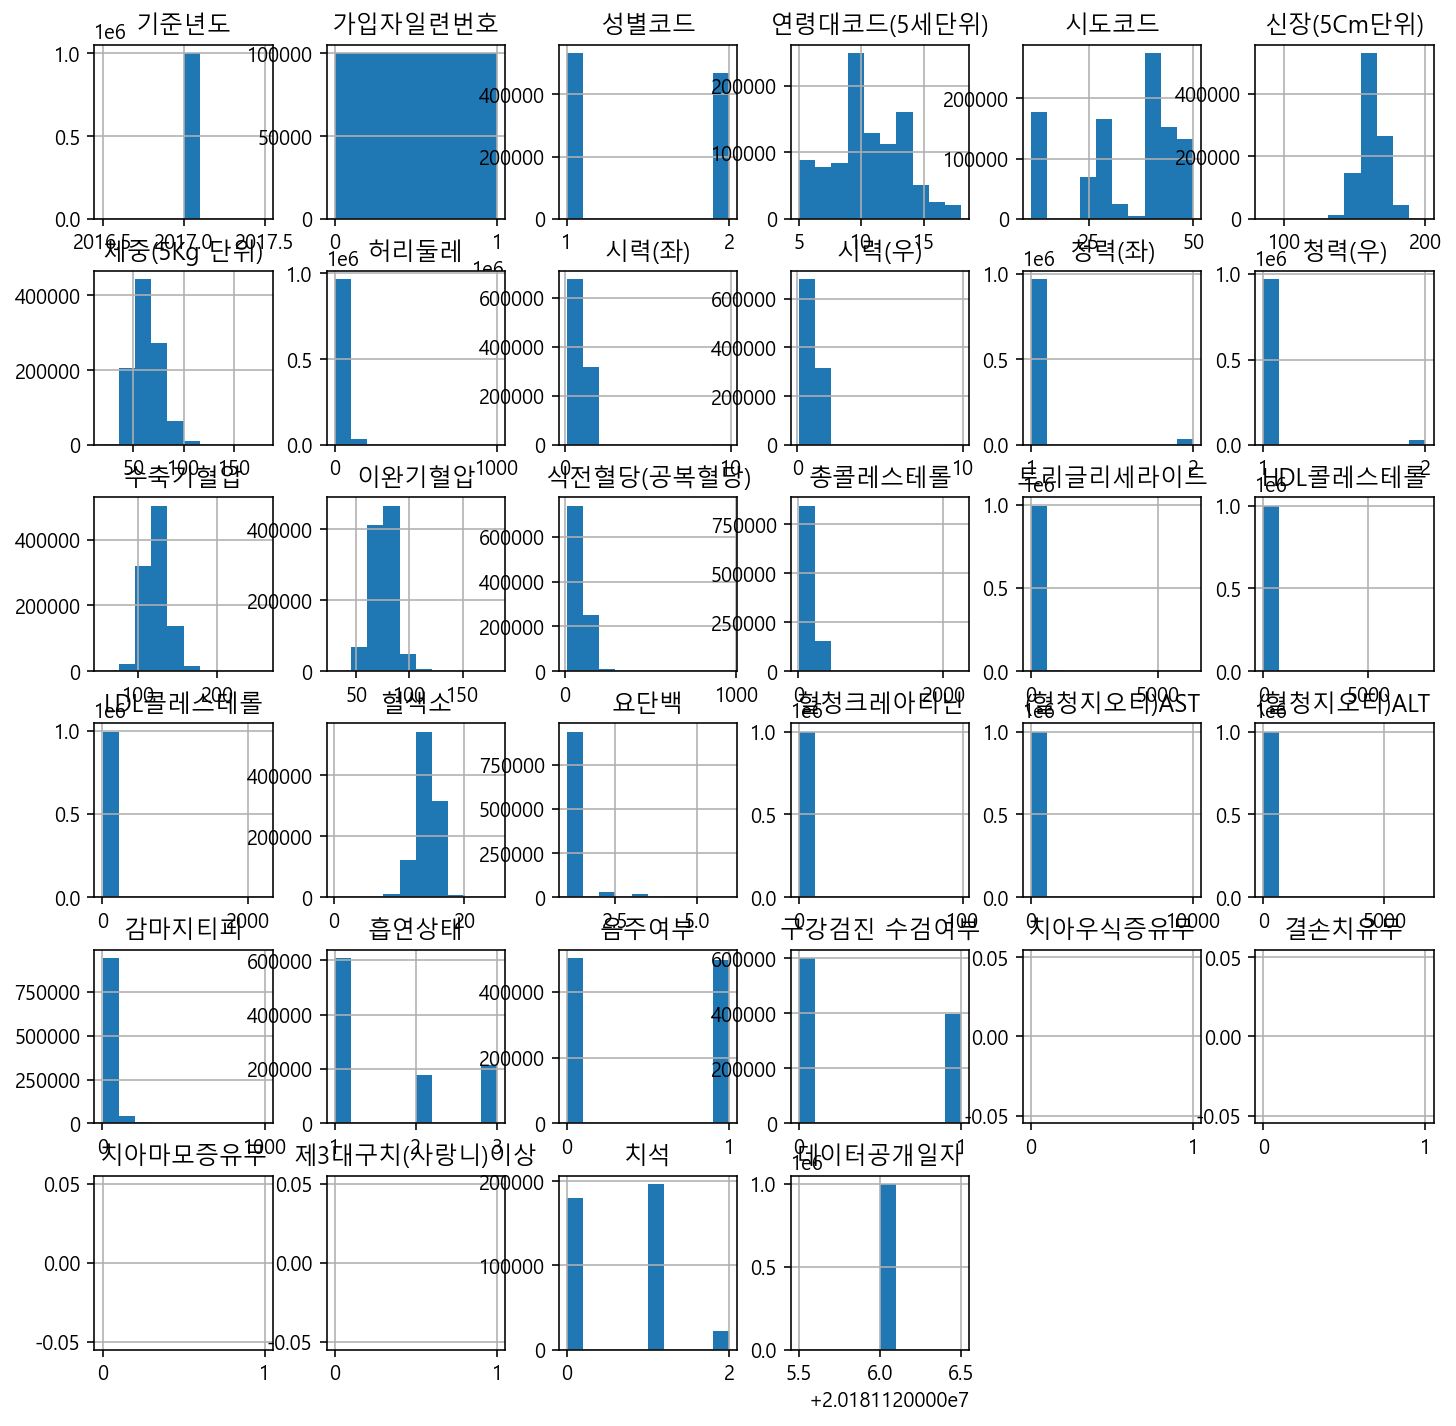

In [74]:
# 전체 데이터에 대한 히스토그램을 출력합니다.

h = df.hist(figsize=(12,12)) # 변수(h)에 할당하면 상대적으로 (seaborn 보다)빨리 시각화 됨

#### **11.2 Drawing a histogram using slicing**

- 슬라이싱 기능을 사용해서 데이터를 나누어 그립니다.
- 슬라이싱 사용시 `iloc` 를 활용하면 인덱스의 순서대로 슬라이싱이 가능합니다.
- `iloc[행, 열]` 순으로 인덱스를 써주면 해당 인덱스만 불러오며, 전체 데이터를 가져오고자 할 때는 `[:,:]`을 사용합니다.
- 슬라이싱을 해주는 대괄호 안의 콜론 앞 뒤에 숫자를 써주게 되면 해당 시작인덱스 : 끝인덱스(+1)를 지정할 수 있습니다.

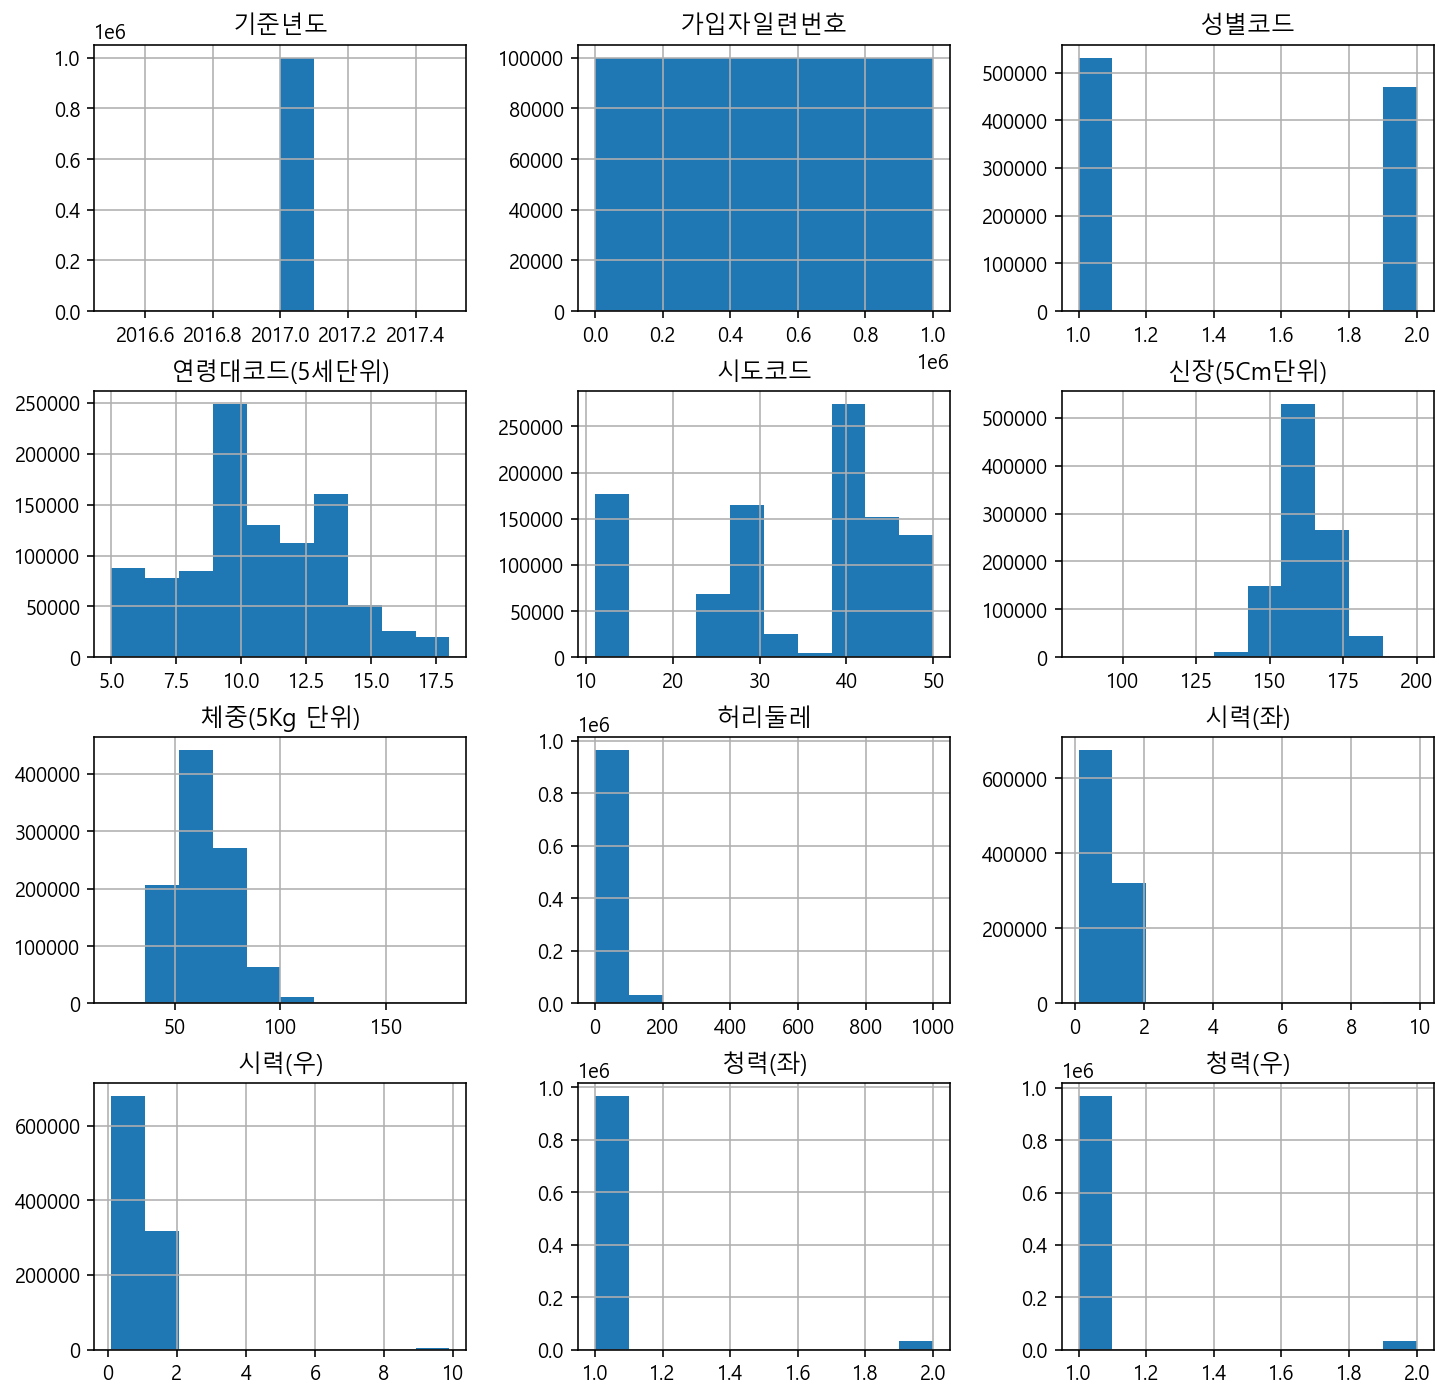

In [76]:
# 슬라이싱을 사용해 앞에서 12개 컬럼에 대한 데이터로 히스토그램을 그립니다.
# [행, 열]

h = df.iloc[:, :12].hist(figsize=(12,12))

In [77]:
# 슬라이싱을 사용해 앞에서 12번째 부터 23번째까지 (12:24) 컬럼에 대한 히스토그램을 그립니다.

df.iloc[:, 12:24]

수축기혈압  이완기혈압  식전혈당(공복혈당)  총콜레스테롤  트리글리세라이드  HDL콜레스테롤  LDL콜레스테롤   혈색소  \
0       158.0   88.0        95.0   178.0     161.0      43.0     102.0  15.9   
1       110.0   79.0        98.0   255.0      82.0      62.0     176.0  10.7   
2       130.0   89.0        88.0   211.0     271.0      64.0      92.0  16.1   
3       138.0   90.0        76.0   160.0      97.0      52.0      88.0  13.4   
4       128.0   80.0        97.0   253.0     182.0      47.0     169.0  16.1   
...       ...    ...         ...     ...       ...       ...       ...   ...   
999995  124.0   70.0        93.0   196.0     120.0      64.0     108.0  13.2   
999996  111.0   71.0        94.0   199.0      65.0      67.0     119.0  12.3   
999997   96.0   60.0        88.0   240.0      63.0      46.0     181.0  12.6   
999998  145.0   93.0       105.0   267.0     173.0      59.0     173.0  16.5   
999999  113.0   66.0        97.0   172.0     118.0      60.0      88.0  12.7   

        요단백  혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT  
0       1.0      1.0        19.0        41.0  
1       1.0      0.9        16.0        13.0  
2       1.0      1.1        45.0        62.0  
3       1.0      0.6        21.0        24.0  
4       1.0      1.1        37.0        62.0  
...     ...      ...         ...         ...  
999995  1.0      1.1        18.0        11.0  
999996  1.0      0.8        21.0        11.0  
999997  1.0      0.8        23.0        13.0  
999998  1.0      0.9        28.0        30.0  
999999  1.0      0.7        21.0        20.0  

[1000000 rows x 12 columns]

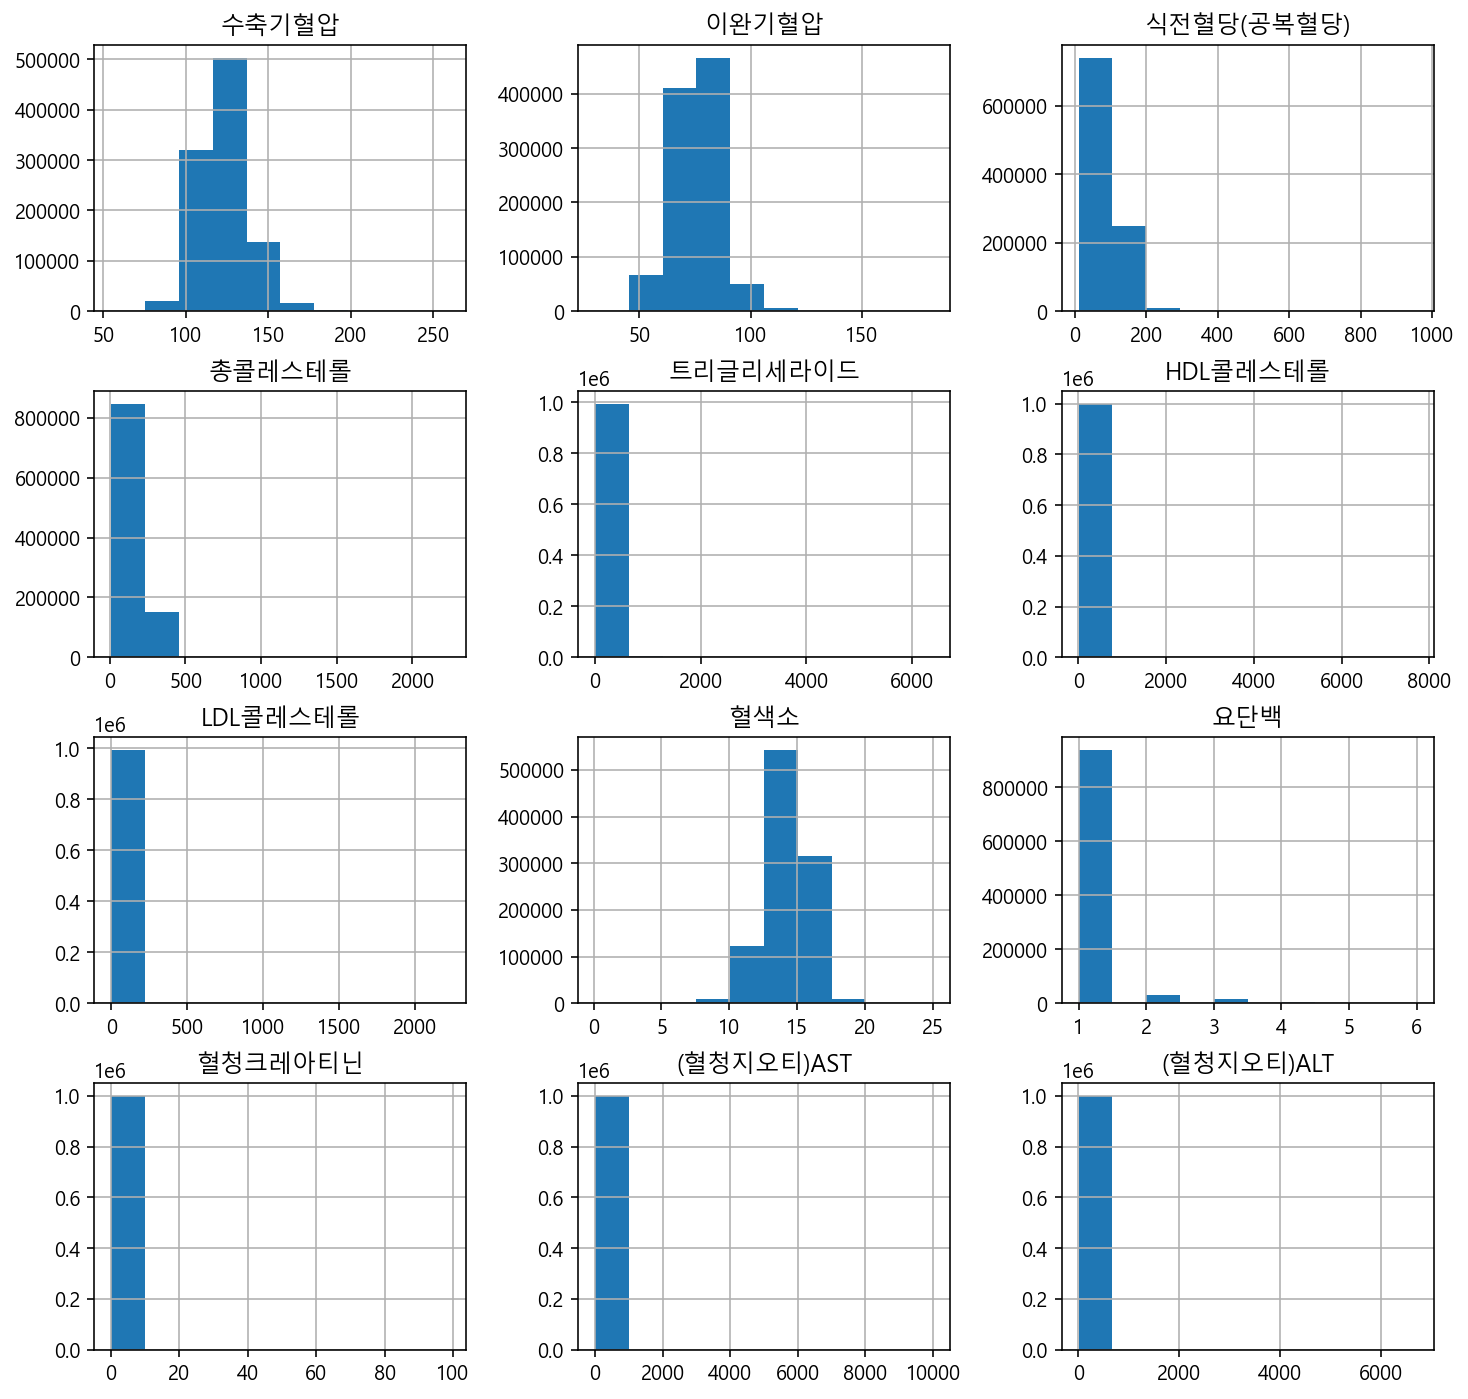

In [78]:
h = df.iloc[:, 12:24].hist(figsize = (12,12))

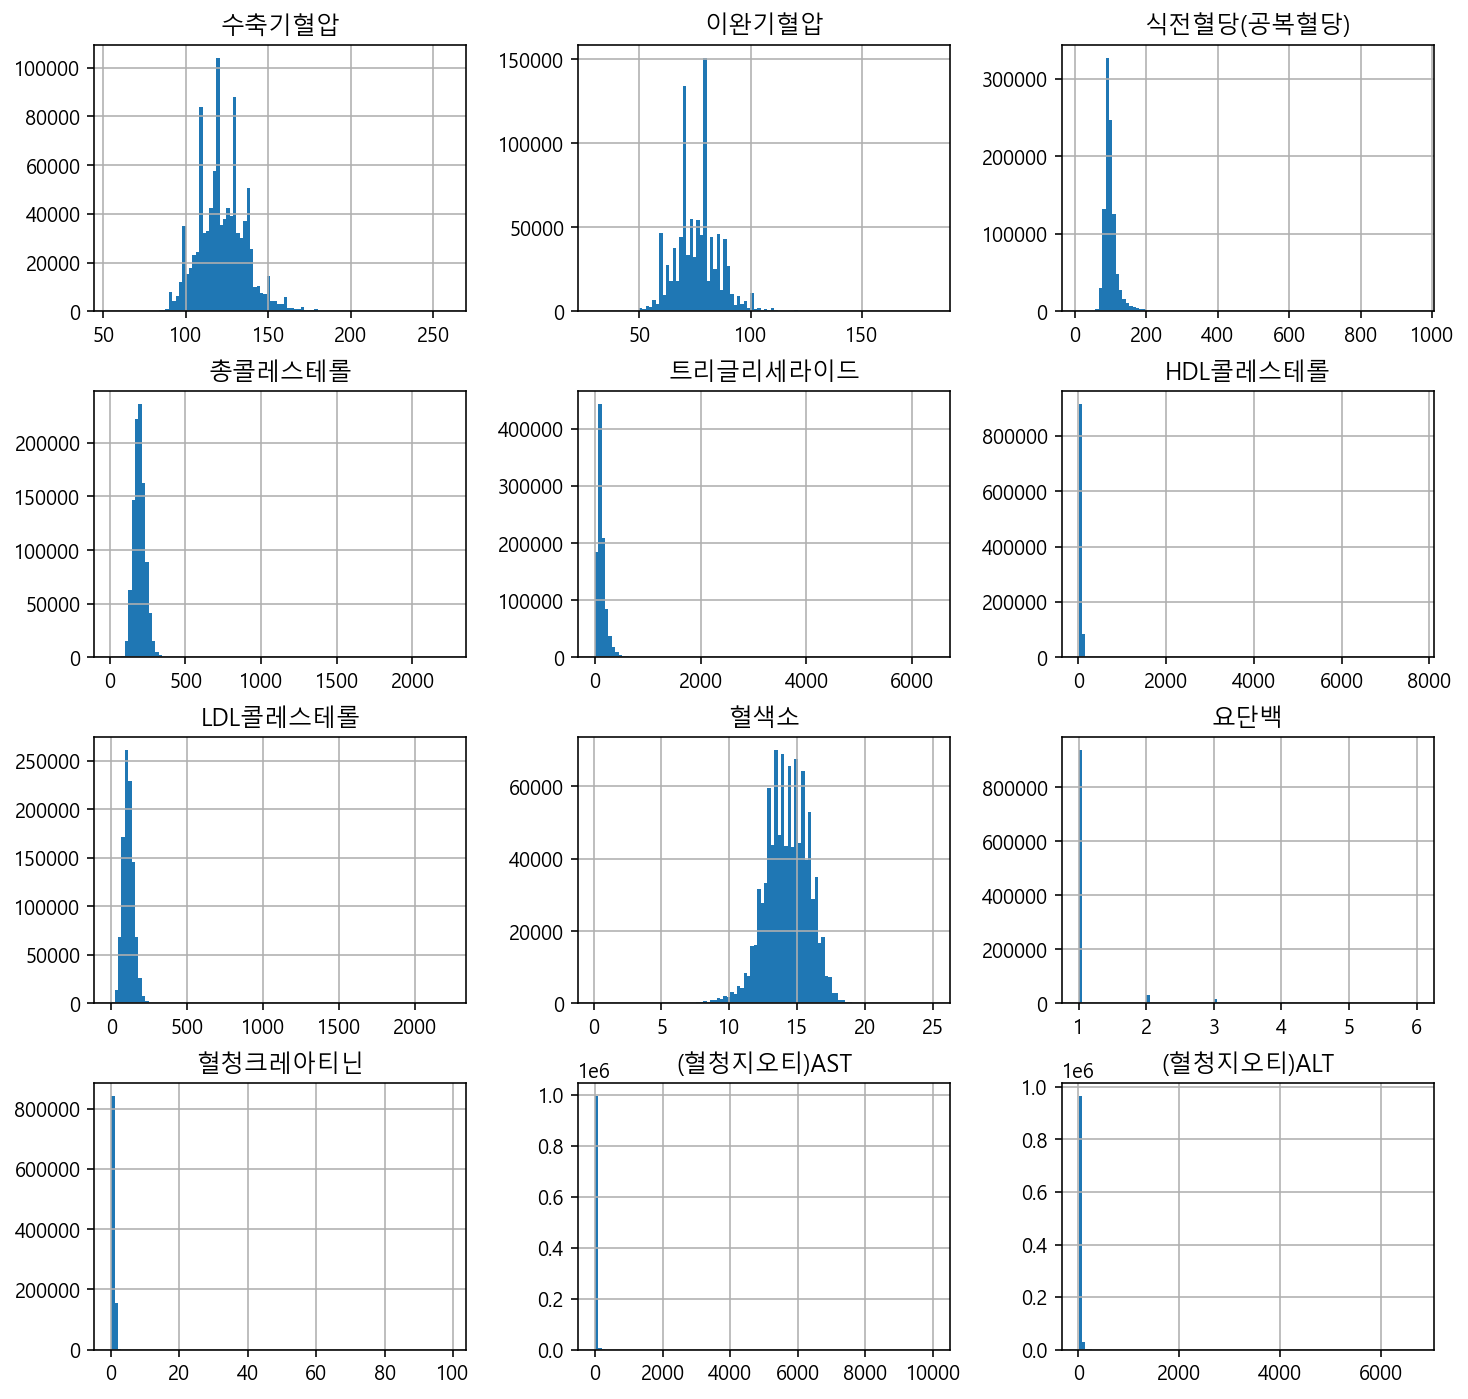

In [79]:
h = df.iloc[:, 12:24].hist(figsize = (12,12), bins = 100) 

# bins 옵션(막대개수)으로 더 잘게 그려 값의 분포를 좀 더 정확하게 관찰 할 수 있다.

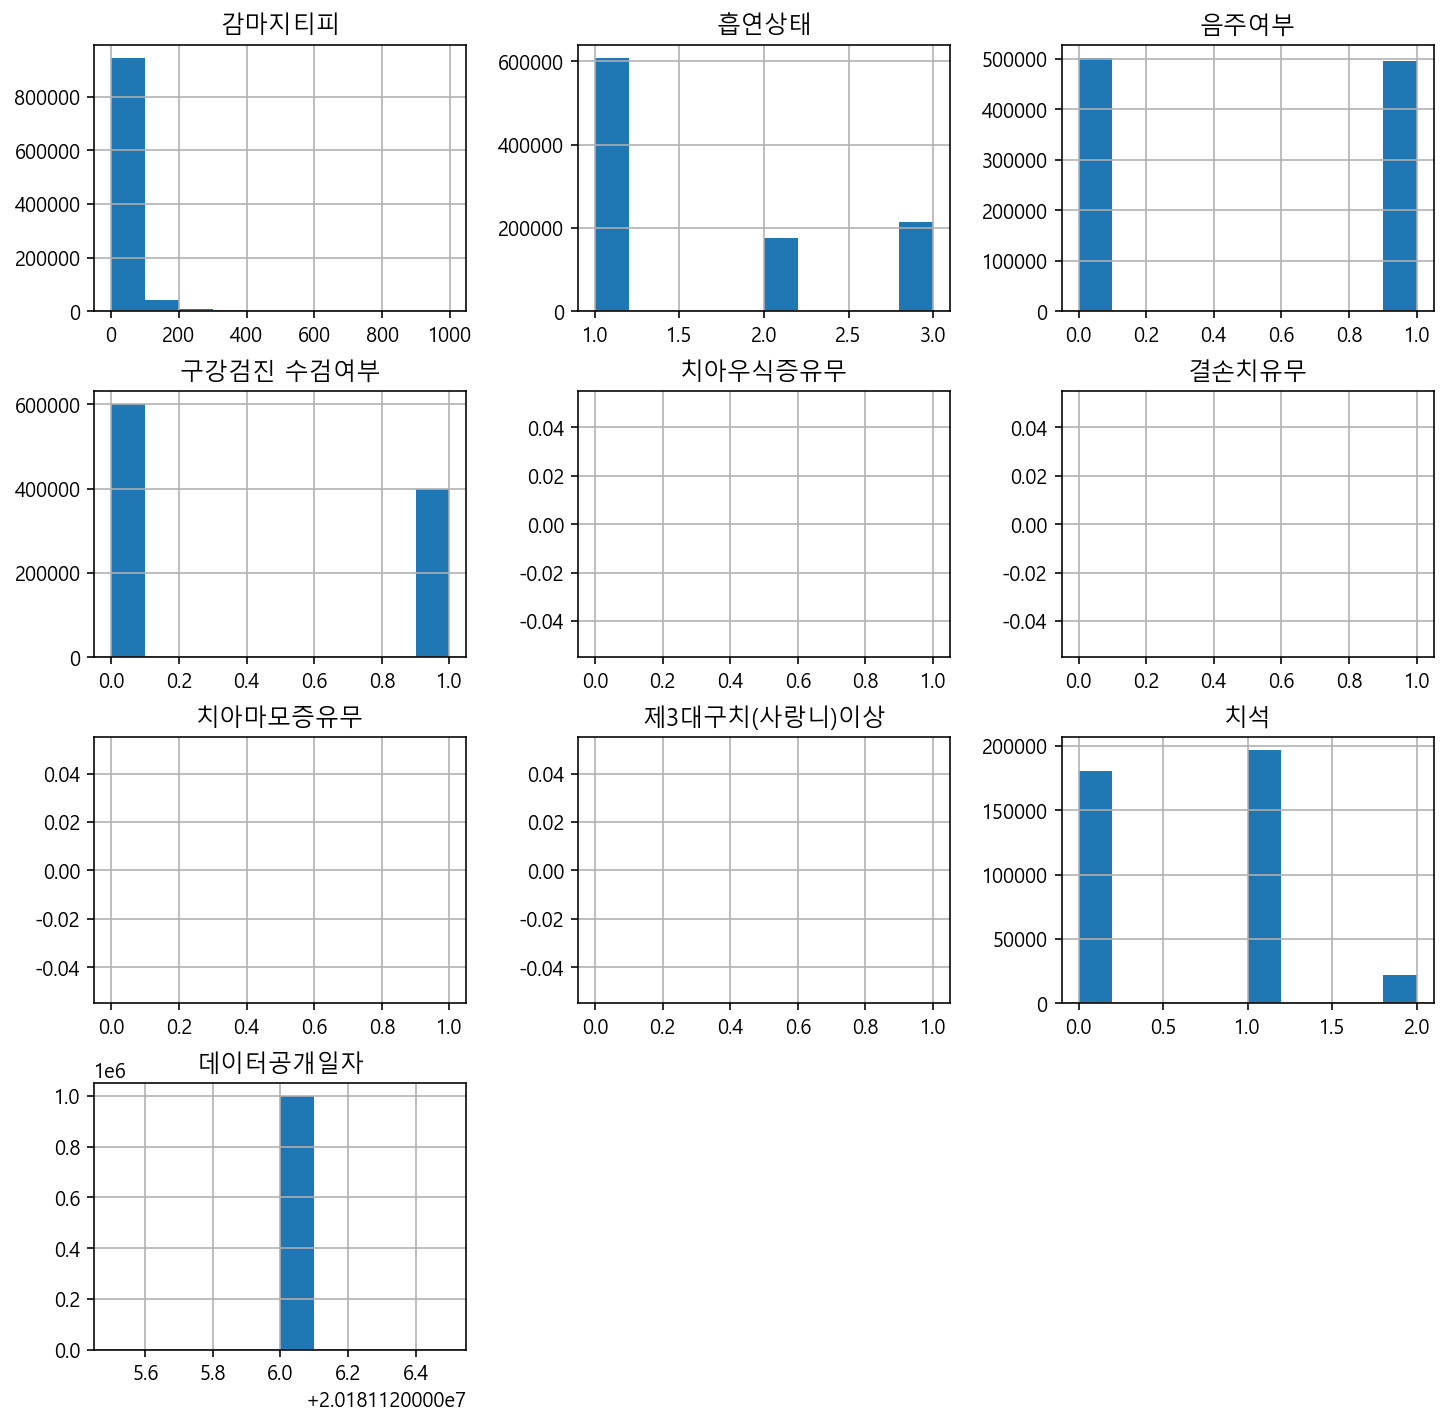

In [80]:
# 슬라이싱을 사용해 앞에서 24번째 부터 마지막까지 (24:) 컬럼에 대한 히스토그램을 그립니다.

h = df.iloc[:, 24:].hist(figsize = (12,12), bins = 10)

In [ ]:
# 결측치가 꽤 보임

In [ ]:
# 위의 값들은 수치데이터이므로 히스토그램으로 표현했으나, 
# object type(String type)의 경우는 다르게도 표현이가능하다.

***

In [ ]:
# 4.6강 (13:50 ) :데이터의 빈도수 시각화 하기(막대그래프1) - countplot

### **12. Extract sample data**

- seaborn 의 그래프는 내부에서 수학적 연산이 되기 때문에 데이터가 많으면 속도가 오래 걸립니다.
- 따라서 전체 데이터를 사용하면 너무 느리기 때문에 일부만 샘플링해서 사용합니다.

In [81]:
# df.sample 를 통해 일부 데이터만 샘플데이터를 추출합니다.
# random_state 를 사용해 샘플링되는 값을 고정할 수 있습니다.
# 실험을 통제하기 위해 random_state 를 고정하기도 합니다.
# 여기에서는 1을 사용하겠습니다. 이 값은 높든 낮든 상관 없이 값을 고정시키는 역할만 합니다.

df.sample(10, random_state =1) #random_state = 1 하면 샘플이 고정됨 

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)   허리둘레  \
276826  2017   276827     2           12    11      155.0        85.0  113.0   
849425  2017   849426     2           15    11      155.0        45.0   73.0   
504499  2017   504500     1           11    47      170.0        45.0   63.0   
601054  2017   601055     2           16    26      150.0        50.0   77.0   
980221  2017   980222     2           13    41      150.0        65.0   95.0   
409364  2017   409365     2           10    28      150.0        45.0   69.0   
653769  2017   653770     1           13    27      165.0        70.0   89.0   
846412  2017   846413     2           18    41      140.0        45.0   86.0   
771284  2017   771285     2            9    46      160.0        75.0   93.0   
372778  2017   372779     1           11    41      165.0        80.0   90.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  \
276826    0.7    1.0  ...   35.0   1.0   0.0          0      NaN    NaN   
849425    0.5    0.4  ...   19.0   1.0   0.0          1      NaN    NaN   
504499    0.7    0.4  ...   15.0   3.0   0.0          0      NaN    NaN   
601054    0.4    0.3  ...   13.0   1.0   0.0          0      NaN    NaN   
980221    1.0    0.8  ...  265.0   1.0   0.0          0      NaN    NaN   
409364    1.0    1.2  ...   10.0   1.0   0.0          0      NaN    NaN   
653769    0.7    1.0  ...   66.0   3.0   1.0          0      NaN    NaN   
846412    0.4    0.6  ...   41.0   1.0   0.0          0      NaN    NaN   
771284    0.8    0.8  ...   47.0   1.0   0.0          0      NaN    NaN   
372778    1.0    0.9  ...  165.0   1.0   1.0          0      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석   데이터공개일자  
276826      NaN           NaN  NaN  20181126  
849425      NaN           NaN  0.0  20181126  
504499      NaN           NaN  NaN  20181126  
601054      NaN           NaN  NaN  20181126  
980221      NaN           NaN  NaN  20181126  
409364      NaN           NaN  NaN  20181126  
653769      NaN           NaN  NaN  20181126  
846412      NaN           NaN  NaN  20181126  
771284      NaN           NaN  NaN  20181126  
372778      NaN           NaN  NaN  20181126  

[10 rows x 34 columns]

In [82]:
df_sample = df.sample(1000, random_state =1)
df_sample.shape

(1000, 34)

### **13. Using the data visualization tool `Seaborn`**

- [http://seaborn.pydata.org/](http://seaborn.pydata.org/)
- seaborn 은 [http://matplotlib.org/](http://matplotlib.org/) 를 사용하기 쉽게 만들어 졌으며, 간단하게 고급 통계 연산을 할 수 있습니다.

데이터는 2가지로 나뉜다.
1. 범주형(카테고리, 문자형 string) 데이터
2. 수치형 데이터

### **14. Categorical(category) data visualization**

범주형(카테고리)데이터 시각화

- countplot 은 범주형 데이터의 수를 더한 값을 그래프로 표현합니다.
- value_counts 로 구한 값을 시각화 한다고 보면 됩니다.


#### **14.1 `countplot` - 음주여부**

In [83]:
# 음주여부에 따른 countplot 을 그립니다.

df["음주여부"].value_counts() # pandas 로 시각화

0.0    502729
1.0    496746
Name: 음주여부, dtype: int64

<AxesSubplot:>

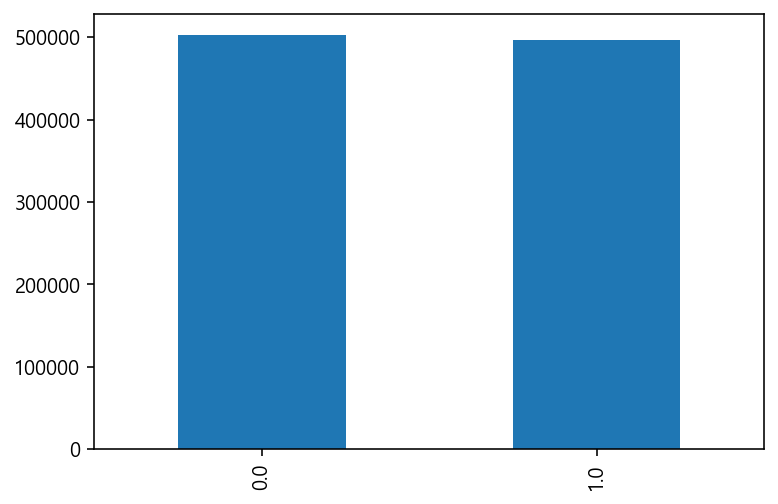

In [84]:
df["음주여부"].value_counts().plot.bar()

<AxesSubplot:xlabel='음주여부', ylabel='count'>

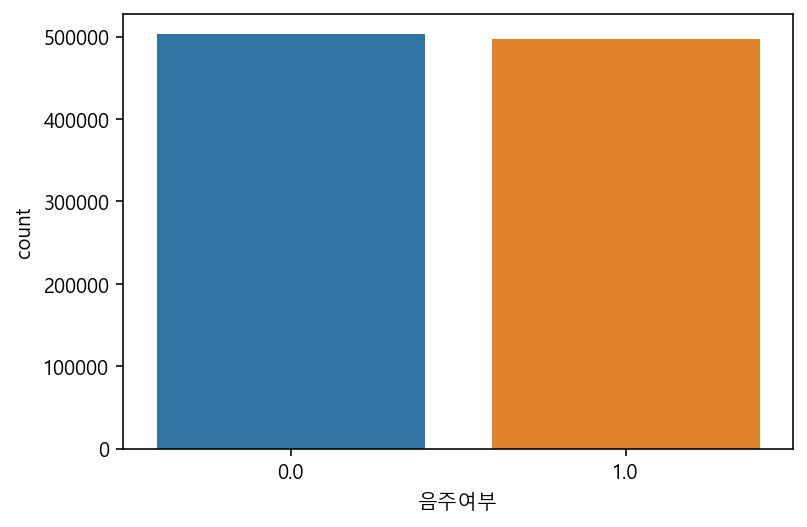

In [85]:
sns.countplot(x="음주여부", data = df) # seaborn 으로 시각화

<AxesSubplot:xlabel='성별코드', ylabel='count'>

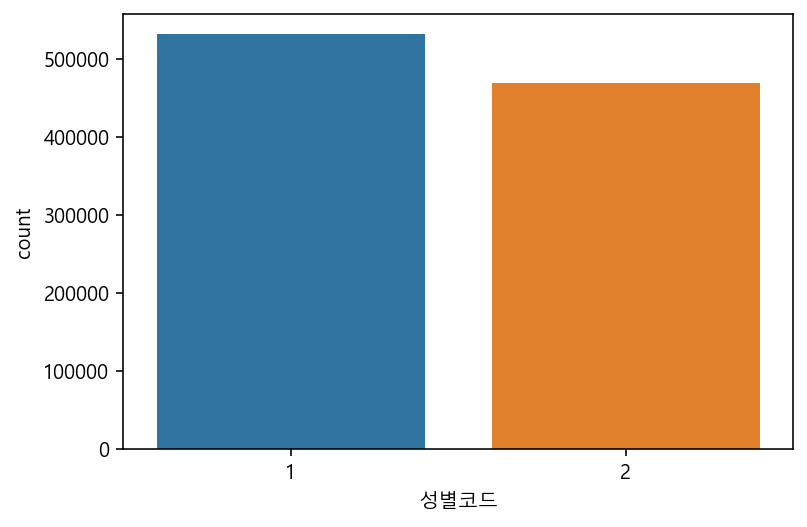

In [86]:
sns.countplot(x="성별코드", data = df)

<AxesSubplot:xlabel='흡연상태', ylabel='count'>

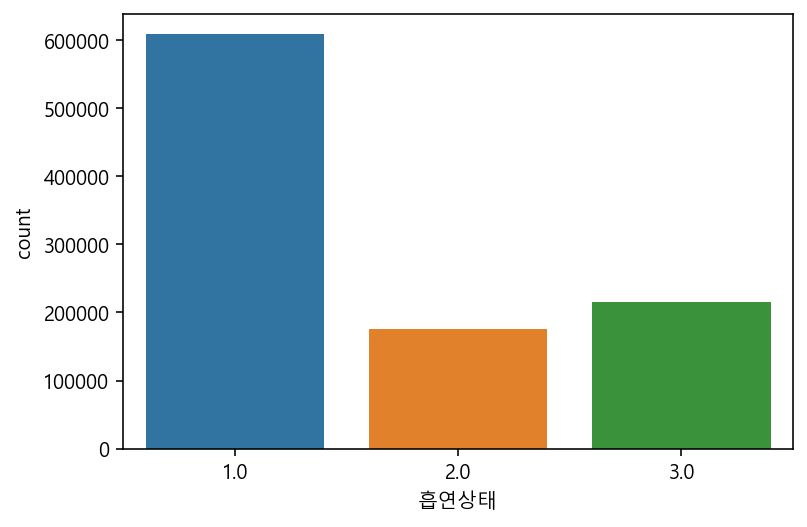

In [87]:
sns.countplot(x="흡연상태", data = df)

<AxesSubplot:xlabel='흡연상태', ylabel='count'>

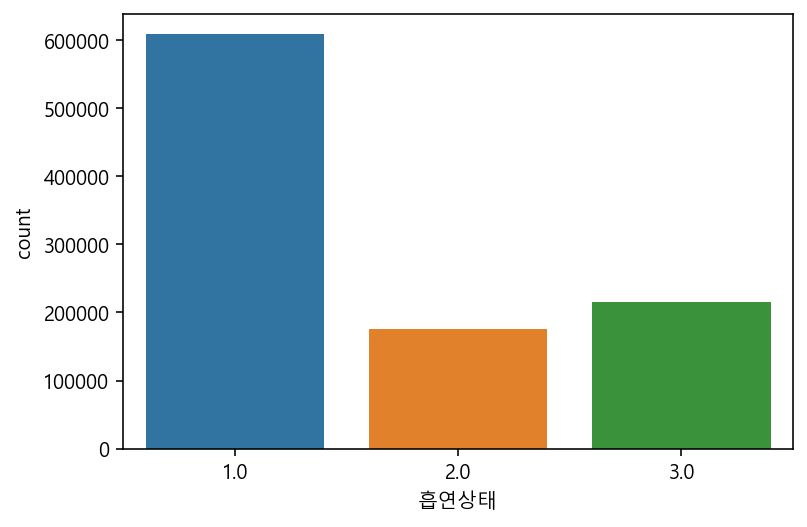

In [88]:
sns.countplot(data = df, x="흡연상태") # 위치 바껴도 결과는 똑같넹

#### **14.2 Using the `hue` option**

<AxesSubplot:xlabel='음주여부', ylabel='count'>

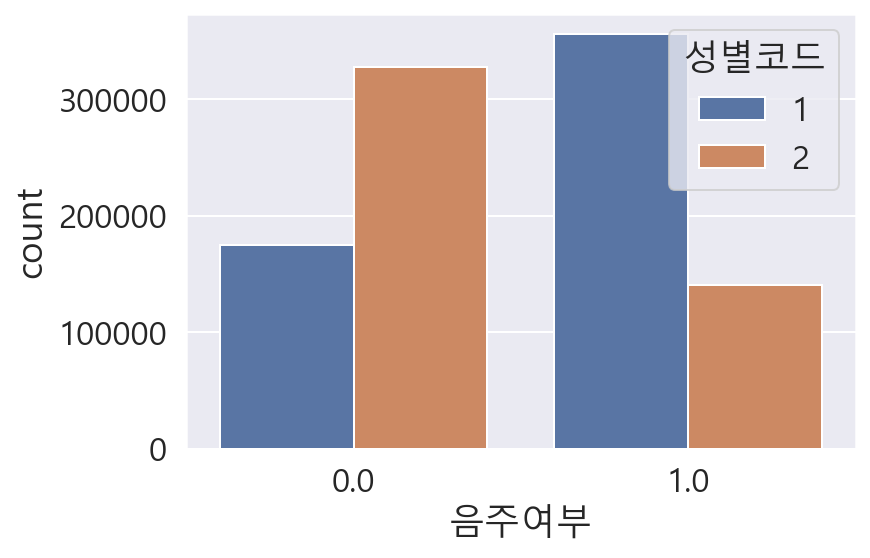

In [89]:
# 음주여부에 따른 countplot 를 그리고 hue 를 사용해 성별코드로 색상을 구분해 그립니다.
# 여기에서 hue는 포토샵에 있는 hue 메뉴를 떠올리면 됩니다. 색상을 의미합니다.
# 또, seaborn 에서 제공하는 폰트 설정을 사용하실 수도 있습니다.
# 다만, 이 때 seaborn 의 기본 스타일이 적용되는 것을 확인해 주는 것이 좋습니다.
# Mac
# sns.set(font_scale = 1.5, font = "AppleGothic")
# Window
sns.set(font_scale = 1.5, font = "Malgun Gothic")

sns.countplot(data = df, x = "음주여부", hue = "성별코드") 
# 1남자, 2여자
# 0.0 비음주, 1.0 음주

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='count'>

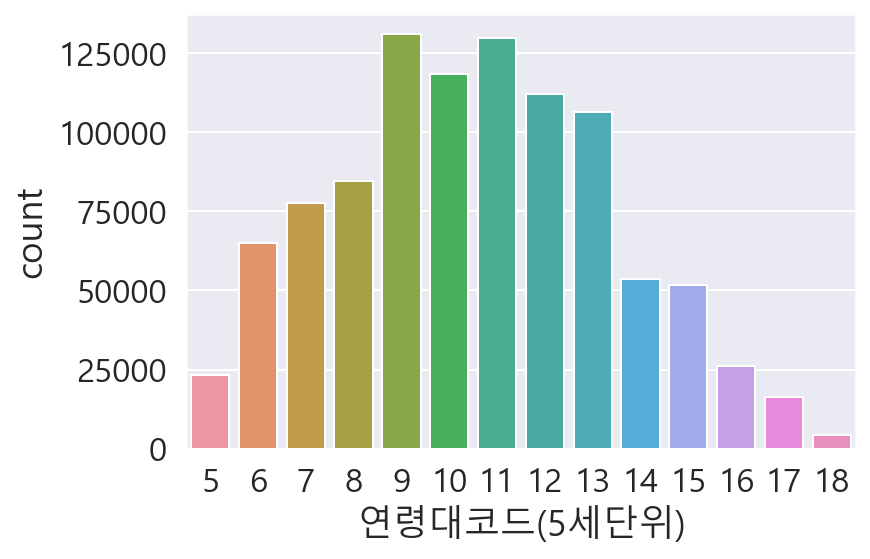

In [90]:
# countplot 으로 연령대별 음주여부를 봅니다.
# hue 를 사용해 다른 색상으로 표현합니다.

sns.countplot(data = df, x ="연령대코드(5세단위)")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='count'>

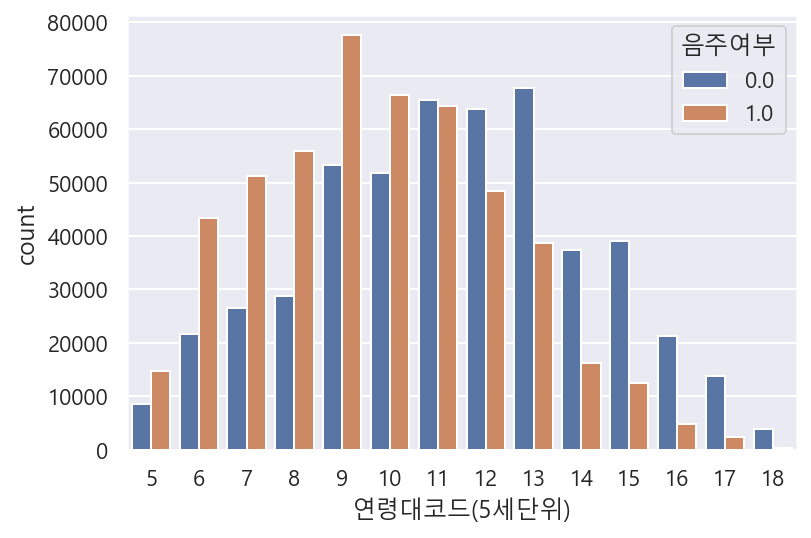

In [91]:
sns.set(font_scale = 1, font = "Malgun Gothic")

sns.countplot(data = df, x ="연령대코드(5세단위)", hue = "음주여부")
# 0.0 비음주, 1.0 음주

#### **14.3 `countplot` - height and weight**

- 키와 몸무게는 연속형 데이터라고 볼 수 있습니다.
- 하지만 이 데이터는 키는 5cm, 체중은 5kg 단위로 되어 있습니다.
- 이렇게 특정 범위로 묶게 되면 연속형 데이터라기 보다는 범주형 데이터라고 볼 수 있습니다.


<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

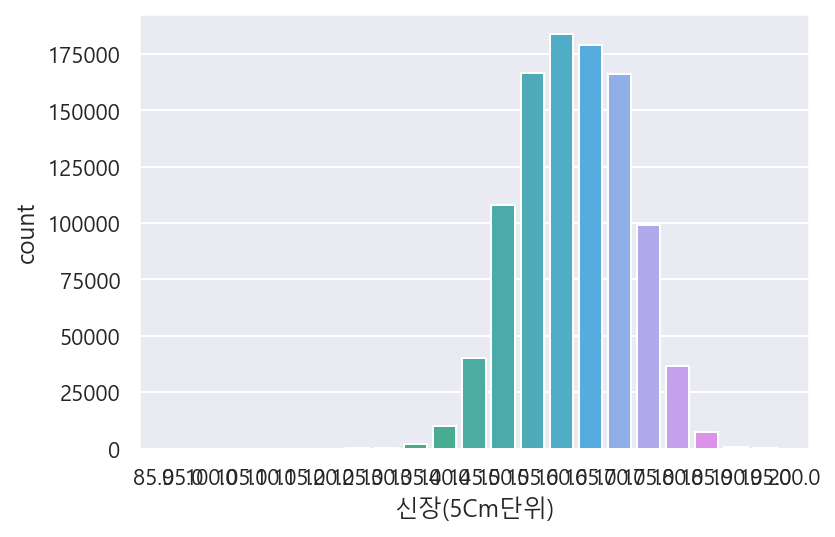

In [92]:
# countplot 으로 키를 봅니다.

sns.countplot(data = df, x = "신장(5Cm단위)")

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

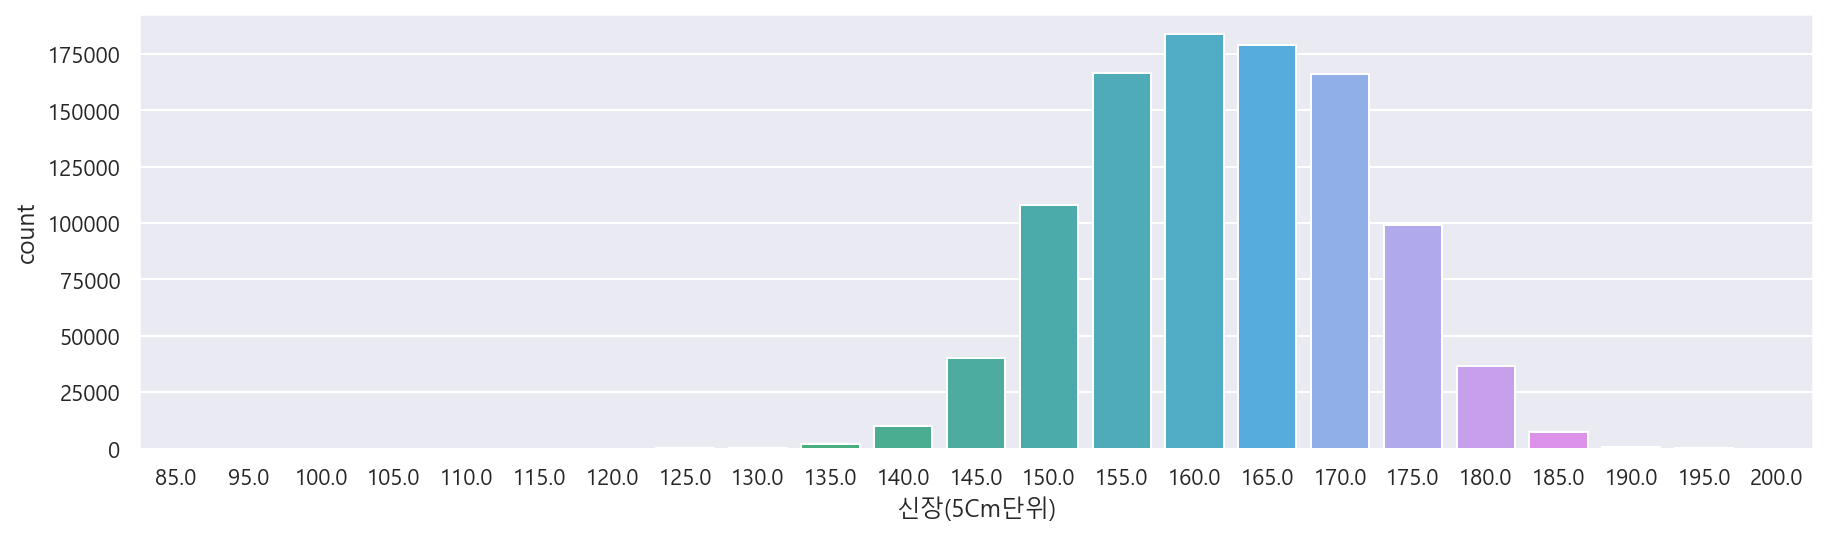

In [93]:
plt.figure(figsize = (15,4))
sns.countplot(data = df, x = "신장(5Cm단위)")

<AxesSubplot:xlabel='체중(5Kg 단위)', ylabel='count'>

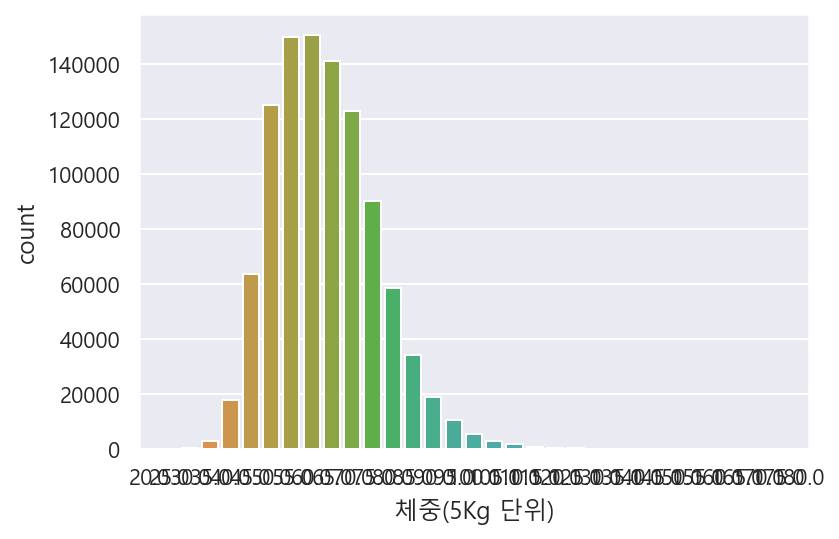

In [94]:
# countplot 으로 체중을 봅니다.

sns.countplot(data = df , x = "체중(5Kg 단위)")

<AxesSubplot:xlabel='체중(5Kg 단위)', ylabel='count'>

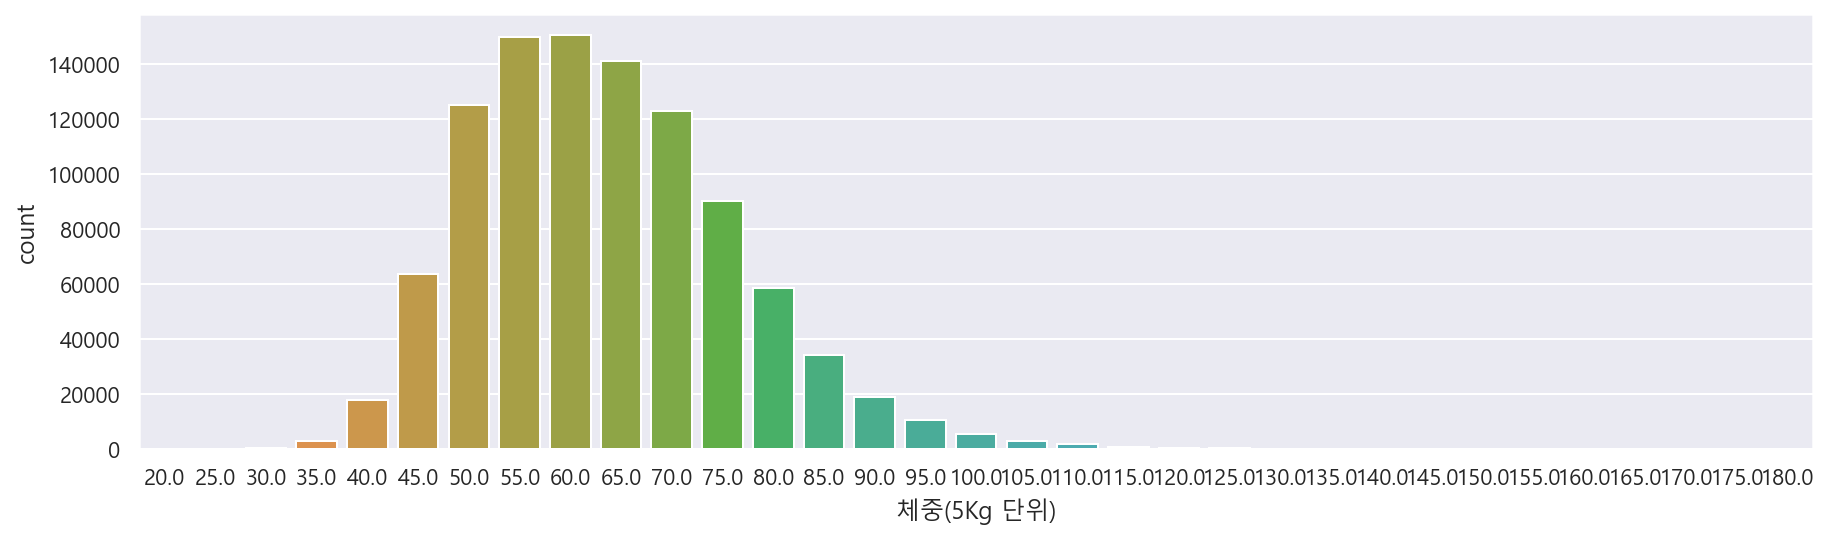

In [95]:
plt.figure(figsize = (15,4))
sns.countplot(data = df , x = "체중(5Kg 단위)")

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

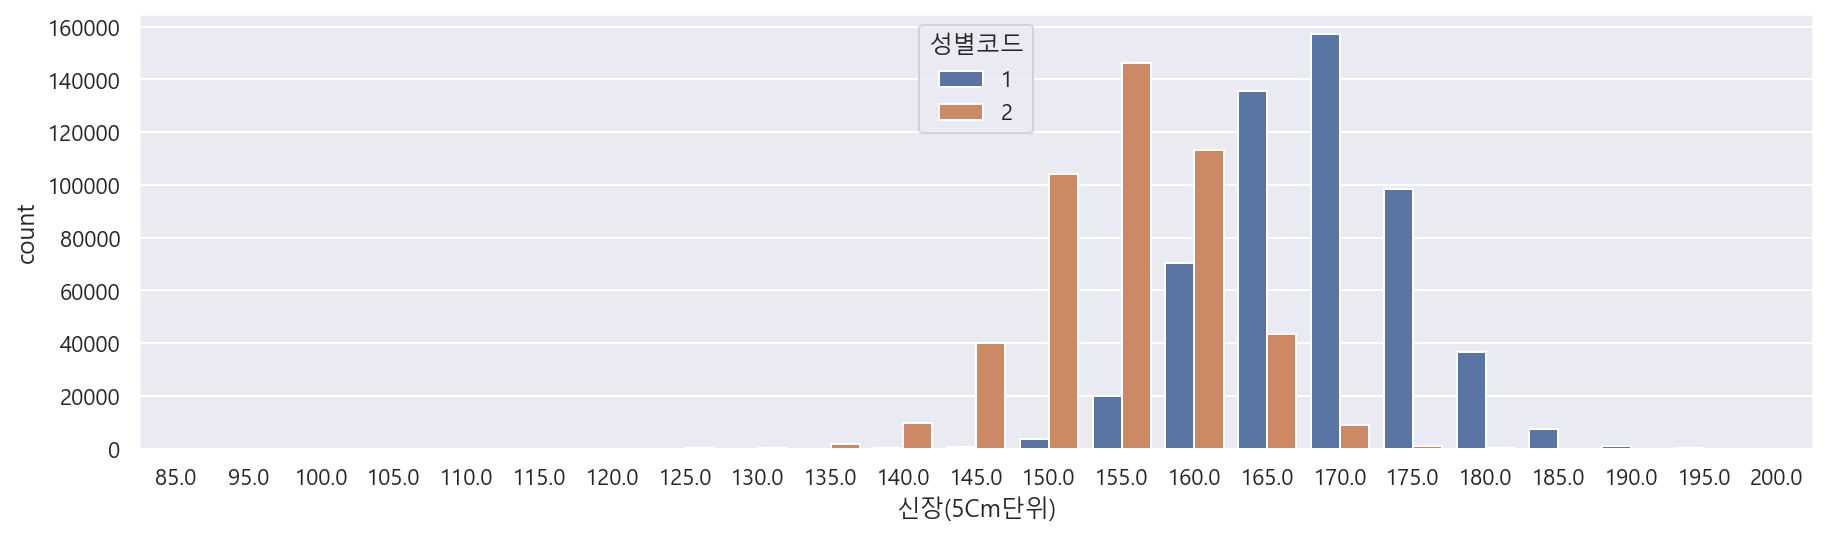

In [96]:
# countplot 으로 신장(5cm단위)을 봅니다.
# 성별에 따른 키의 차이를 봅니다.

plt.figure(figsize = (15,4))
sns.countplot(data = df, x = "신장(5Cm단위)",  hue = "성별코드")
# 파랑1(남자), 주황2(여자)

<AxesSubplot:xlabel='체중(5Kg 단위)', ylabel='count'>

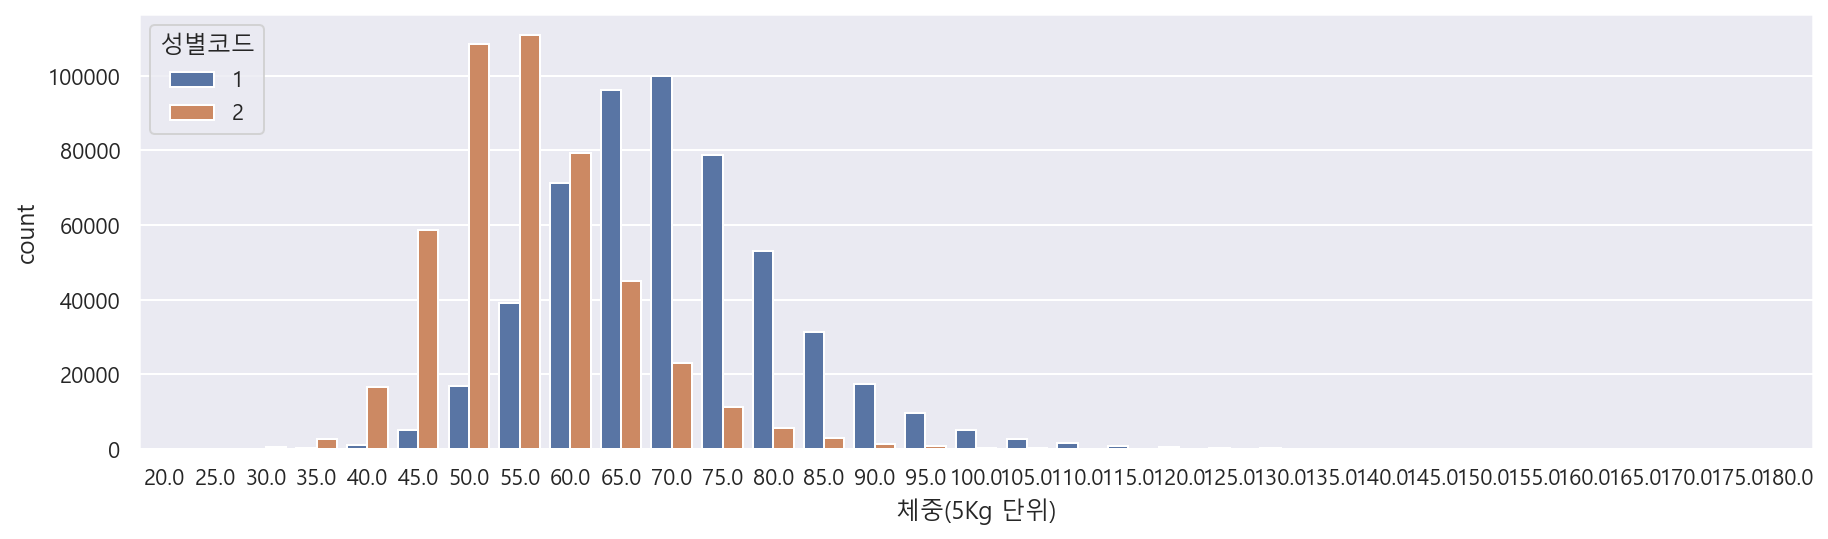

In [97]:
# 성별에 따른 체중의 차이를 봅니다.

plt.figure(figsize = (15,4))
sns.countplot(data = df , x = "체중(5Kg 단위)", hue = "성별코드")

<AxesSubplot:xlabel='체중(5Kg 단위)', ylabel='count'>

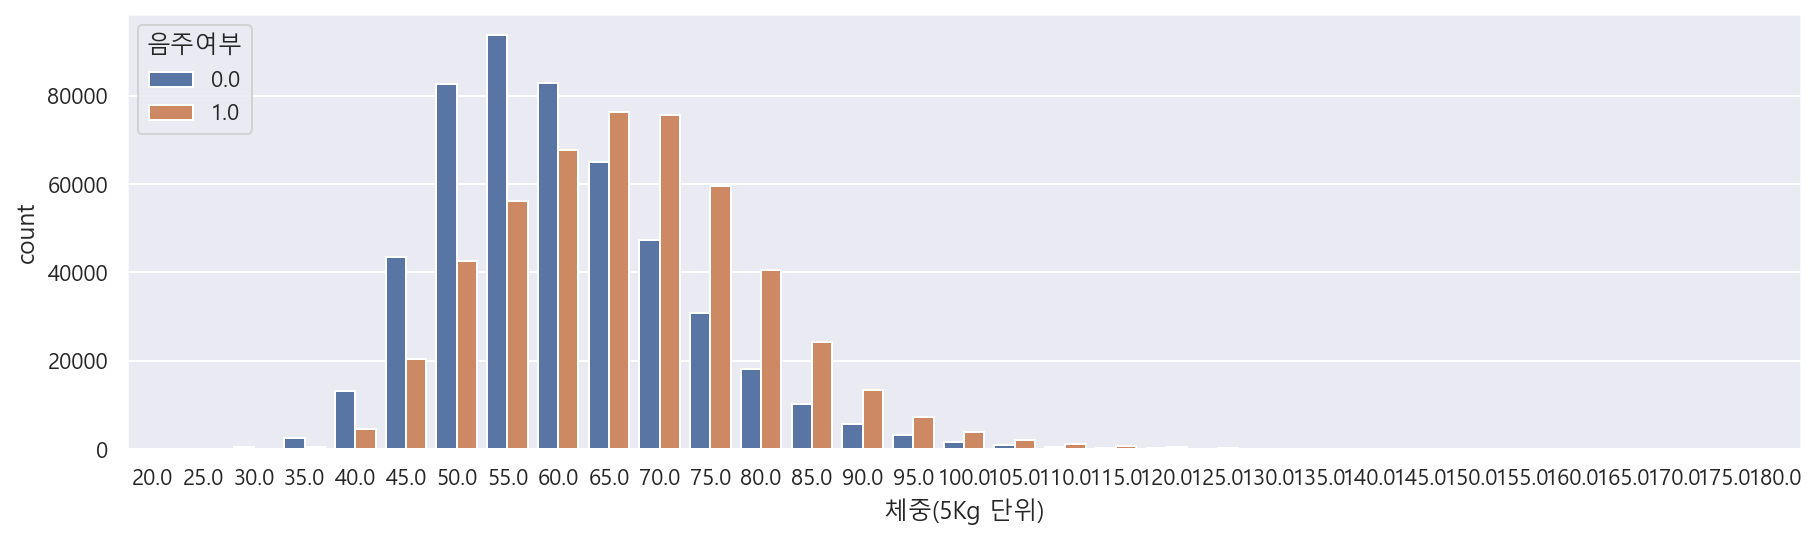

In [98]:
plt.figure(figsize = (15,4))
sns.countplot(data = df , x = "체중(5Kg 단위)", hue = "음주여부")

***

In [ ]:
# 4.7강 ( 10:41):수치형 vs 범주형 데이터의 시각화(막대그래프2) - barplot

#### **14.4 `barplot` - visualize Numeric data vs Categorical data**

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

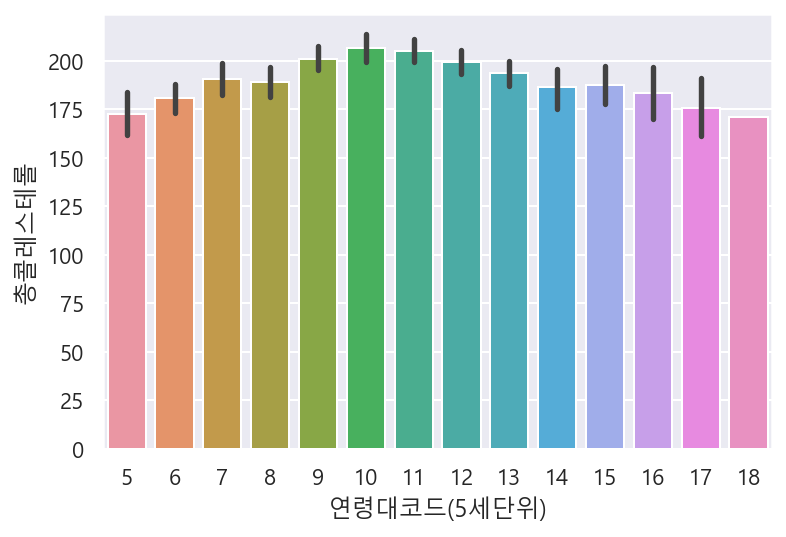

In [99]:
# 연령대코드와 총 콜레스테롤을 봅니다.
# hue로 색상을 다르게 표현할 수 있습니다. 음주여부를 함께 봅니다.

#sns.barplot(data = df, x = "연령대코드(5세단위)", y = "총콜레스테롤")
# 위와 같이 실행하면 데이터가 커서 오래걸림
# data에 df대신 df_sample을 넣어주면 조금 빠름

sns.barplot(data = df_sample, x = "연령대코드(5세단위)", y = "총콜레스테롤")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

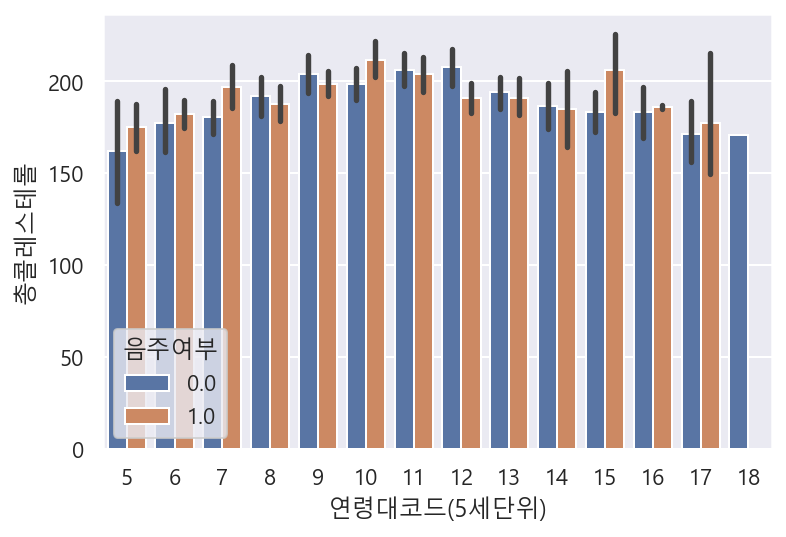

In [100]:
sns.barplot(data = df_sample, x = "연령대코드(5세단위)", y = "총콜레스테롤", hue="음주여부")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

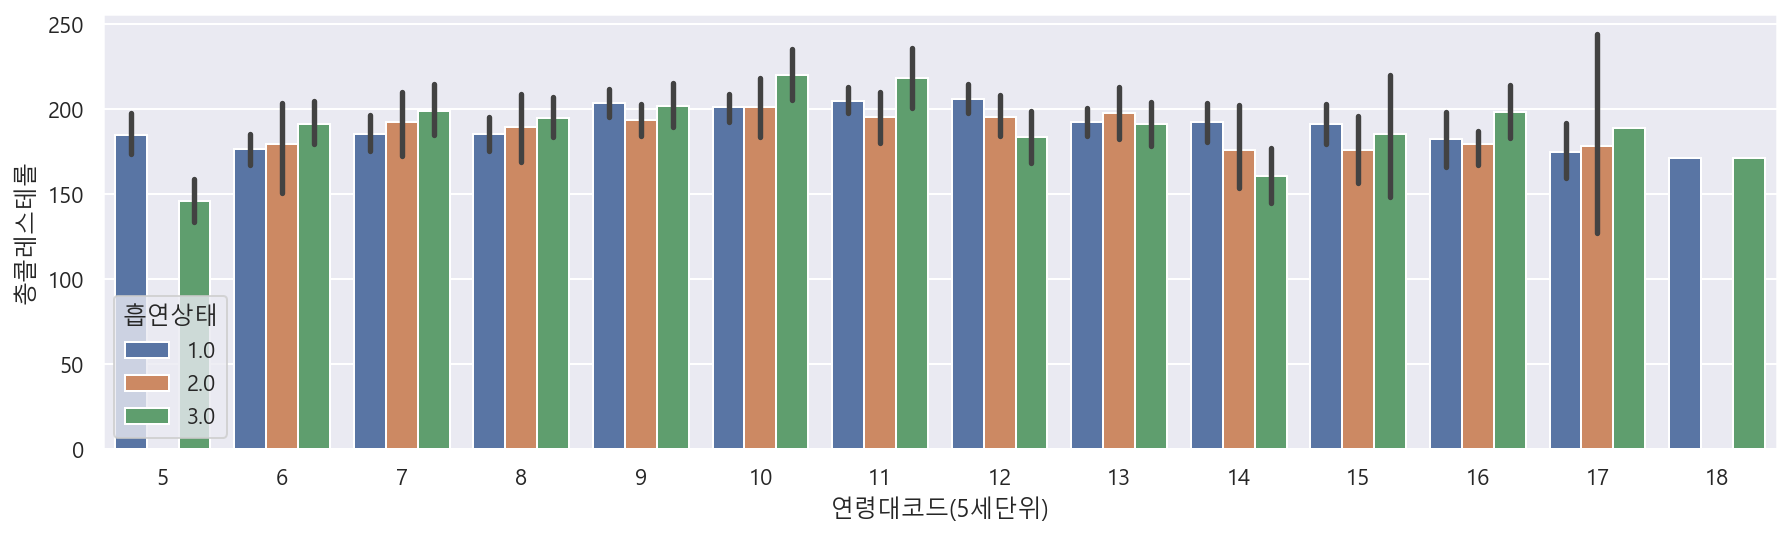

In [101]:
# 연령대코드와 총 콜레스테롤을 봅니다.
# 콜레스테롤과 연령대 코드(5세단위)를 흡연상태에 따라 barplot 으로 그립니다.

plt.figure(figsize = (15,4))
sns.barplot(data = df_sample, x = "연령대코드(5세단위)", y = "총콜레스테롤", hue="흡연상태")

# 파랑1(비흡연상태)
# 주황2(흡연중)
# 초록3(과거흡연했으나 현재 금연상태)

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='트리글리세라이드'>

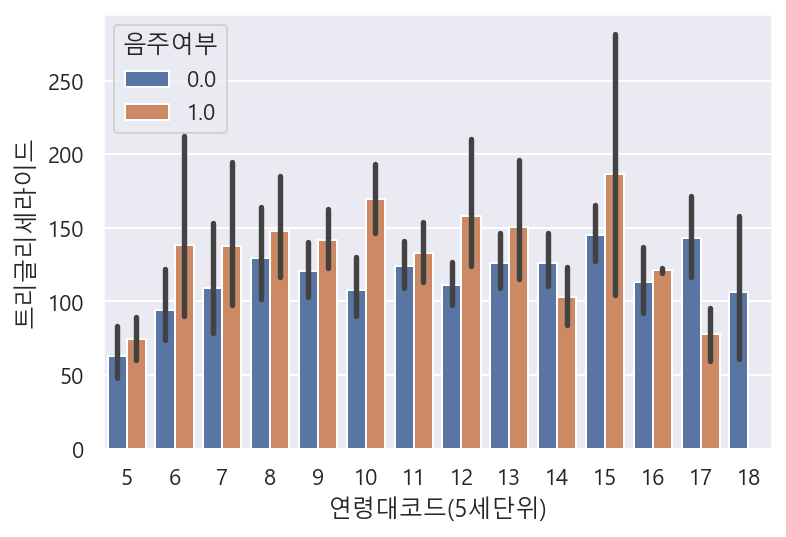

In [102]:
# 트리글리세라이드(중성지방) 에 때른 연령대코드(5세단위)를 음주여부에 따라 barplot으로 그립니다.

sns.barplot(data = df_sample, x="연령대코드(5세단위)", y="트리글리세라이드",
            hue = "음주여부")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='트리글리세라이드'>

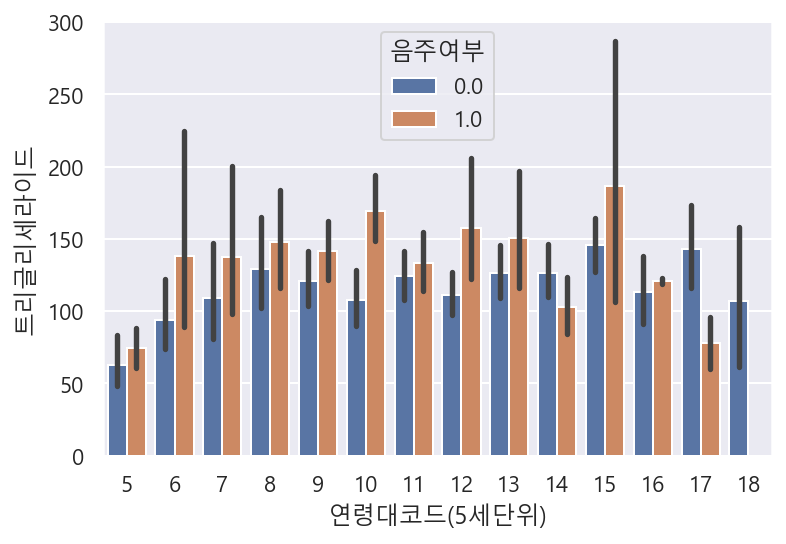

In [103]:
sns.barplot(data = df_sample, x="연령대코드(5세단위)", y="트리글리세라이드",
            hue = "음주여부", ci = 95) # ci = 95 : 95%의 신뢰구간

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='트리글리세라이드'>

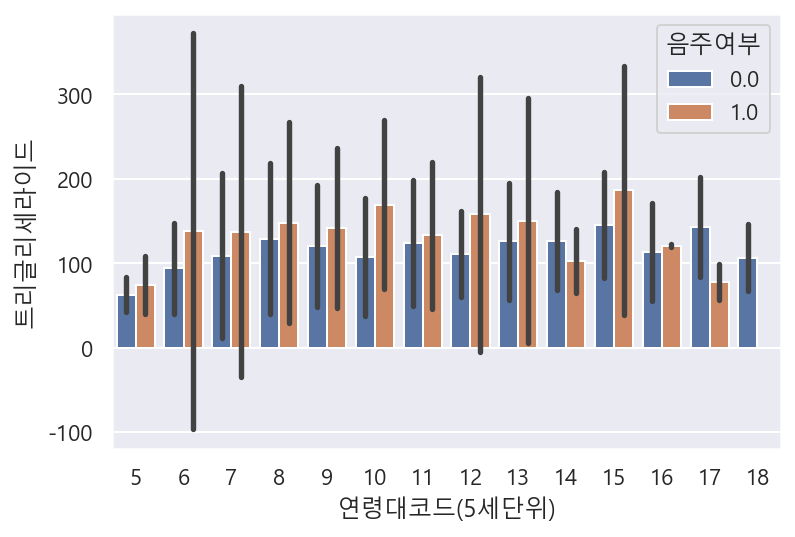

In [104]:
sns.barplot(data = df_sample, x="연령대코드(5세단위)", y="트리글리세라이드",
            hue = "음주여부", ci = "sd") # ci = "sd" : 표준편차

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='트리글리세라이드'>

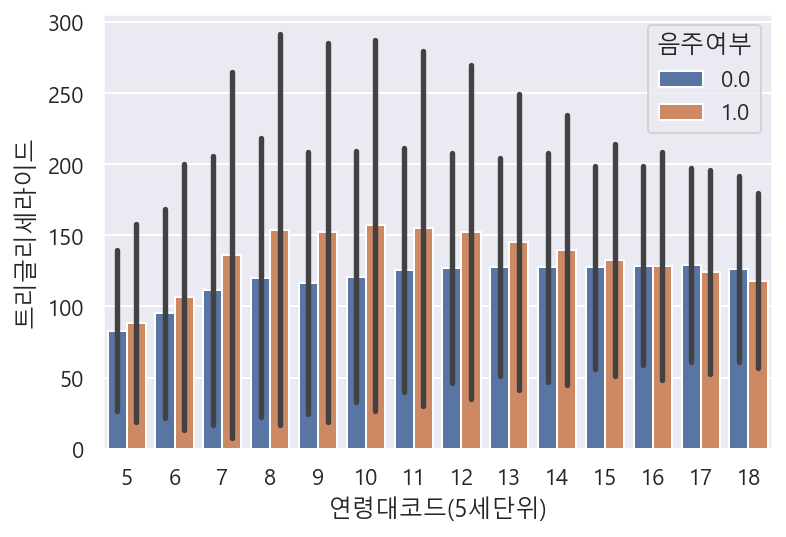

In [105]:
sns.barplot(data = df, x="연령대코드(5세단위)", y="트리글리세라이드",
            hue = "음주여부", ci = "sd") 

# df_sample이 아닌 전체(df)의 편차를 살펴볼 수 있음

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='트리글리세라이드'>

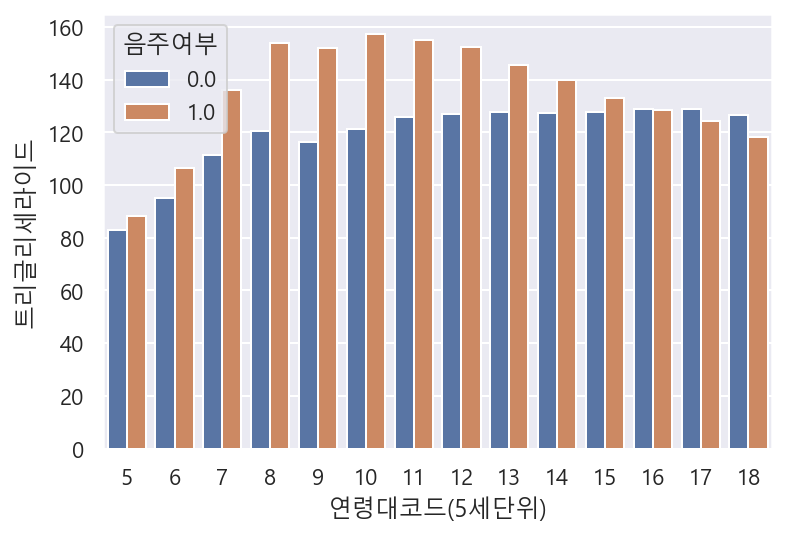

In [106]:
sns.barplot(data = df, x="연령대코드(5세단위)", y="트리글리세라이드",
            hue = "음주여부", ci = None)

# ci = None : ci(신뢰구간)을 표시하고 싶지 않을 때

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg 단위)'>

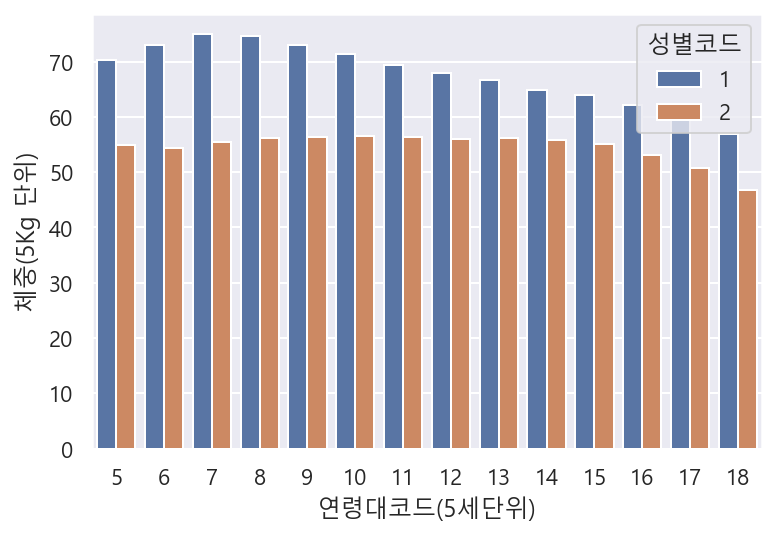

In [107]:
# 음주여부와 체중(5Kg 단위)을 성별에 따라 봅니다.

sns.barplot(data = df, x="연령대코드(5세단위)", y="체중(5Kg 단위)",
            hue = "성별코드", ci = None)

In [108]:
# 남자(1)가 여자(2)보다 체중이 많이 나감

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg 단위)'>

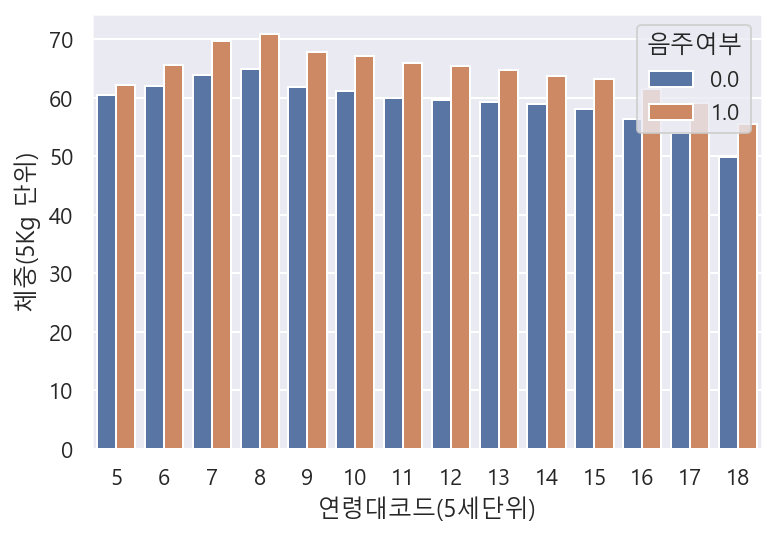

In [109]:
# 연령대코드(5세 단위)에 따른 체중(5Kg 단위)을 음주여부에 따라 barplot 으로 그립니다.

sns.barplot(data = df, x="연령대코드(5세단위)", y="체중(5Kg 단위)",
            hue = "음주여부", ci = None)

In [110]:
# 음주를 하지 않는 사람(0)들이 음주를 하는 사람들(1) 보다 체중이 적게 나감

***

In [ ]:
# 4.8강 ( 09:00) : 수치형 vs 범주형 데이터 선그래프로 그리기 
# - lineplot, pointplot

#### **14.5 lineplot and pointplot**

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg 단위)'>

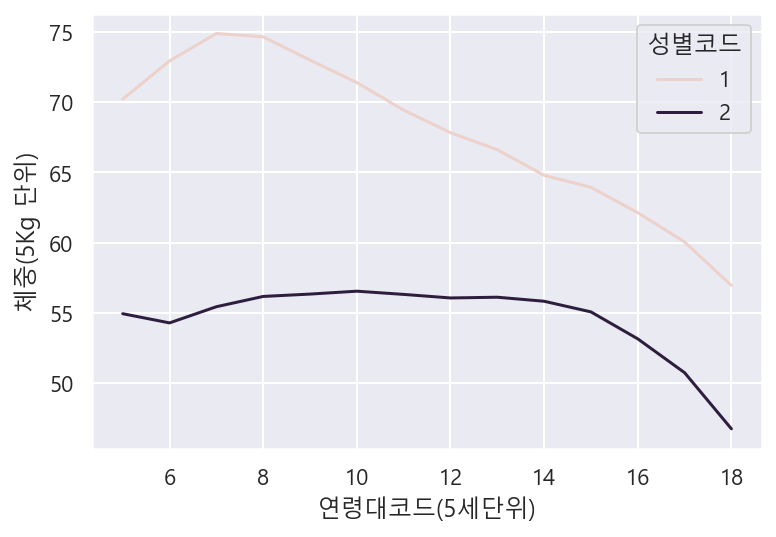

In [111]:
# 연령대코드(5세단위)에 따른 체중(5kg단위) 을 성별코드에 따라 lineplot 으로 그립니다.

sns.lineplot(data = df, x="연령대코드(5세단위)", y="체중(5Kg 단위)",
            hue = "성별코드", ci = None)

# ci를 지정하지 않으면 100만건의 데이터를 계산하므로 오래걸림

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg 단위)'>

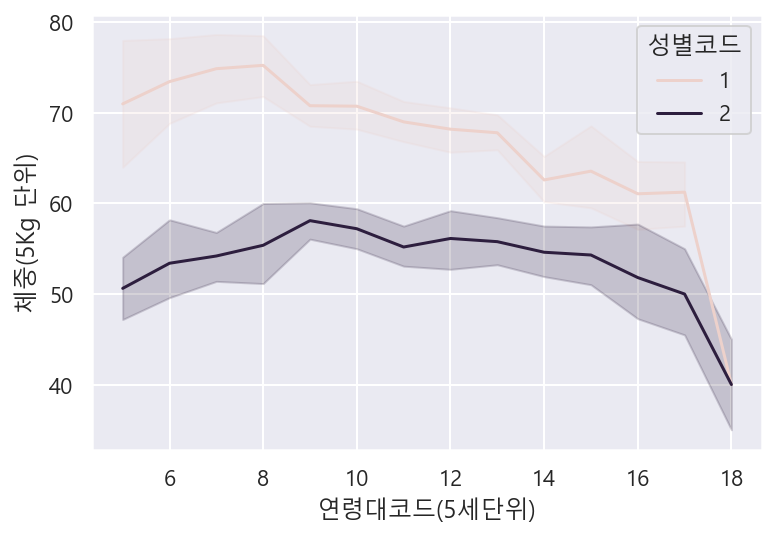

In [112]:
sns.lineplot(data = df_sample, x="연령대코드(5세단위)", y="체중(5Kg 단위)",
            hue = "성별코드")

# ci 지정하지 않는 대신 data = df_sample 로 지정(1000개만 sampling 한 것)하면
# 그림자 값으로 표현됨

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg 단위)'>

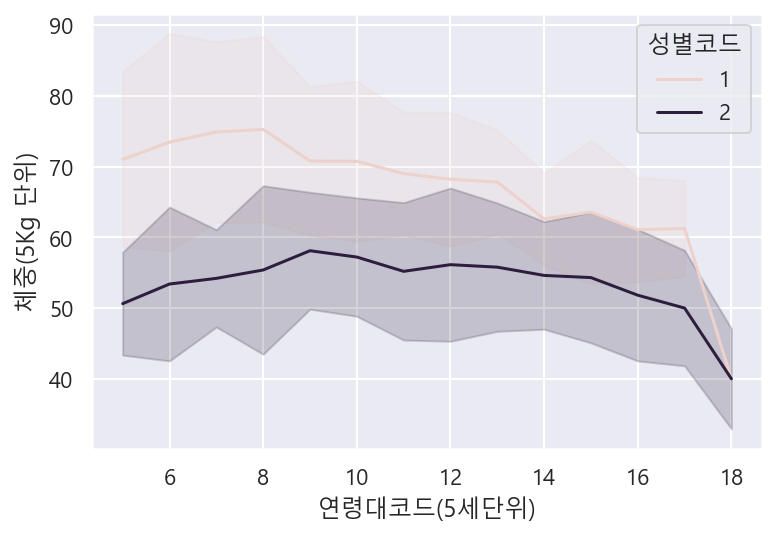

In [113]:
sns.lineplot(data = df_sample, x="연령대코드(5세단위)", y="체중(5Kg 단위)",
            hue = "성별코드", ci ="sd")

# 표준편차의 값

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg 단위)'>

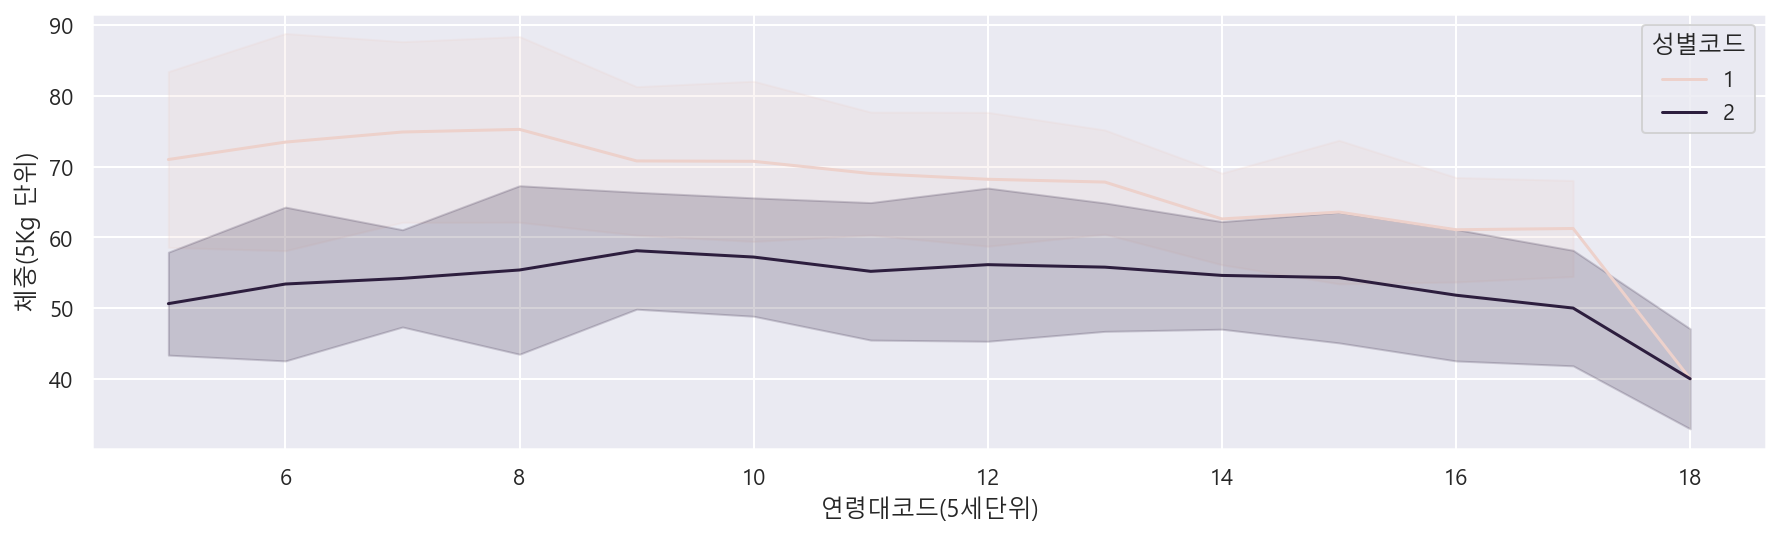

In [114]:
plt.figure(figsize = (15,4))
sns.lineplot(data = df_sample, x="연령대코드(5세단위)", y="체중(5Kg 단위)",
            hue = "성별코드", ci ="sd")

In [115]:
# 1의 끝부분에 그림자가 나타나지 않는 이유는 모두가 적어서 편차로 나타낼 것이 없기 때문

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

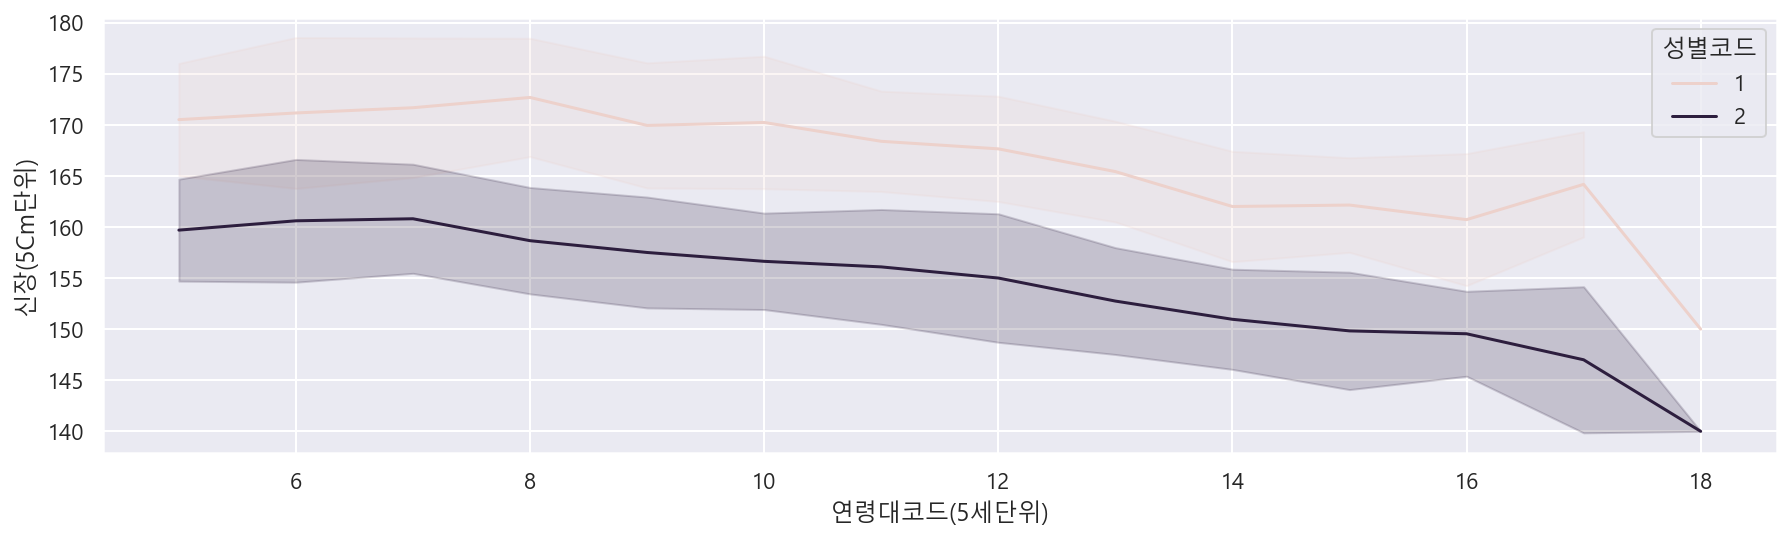

In [116]:
# 연령대코드(5세단위)에 따른 신장(5Cm단위) 을 성별코드에 따라 lineplot 으로 그립니다.

plt.figure(figsize = (15,4))
sns.lineplot(data = df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)",
            hue = "성별코드", ci ="sd")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg 단위)'>

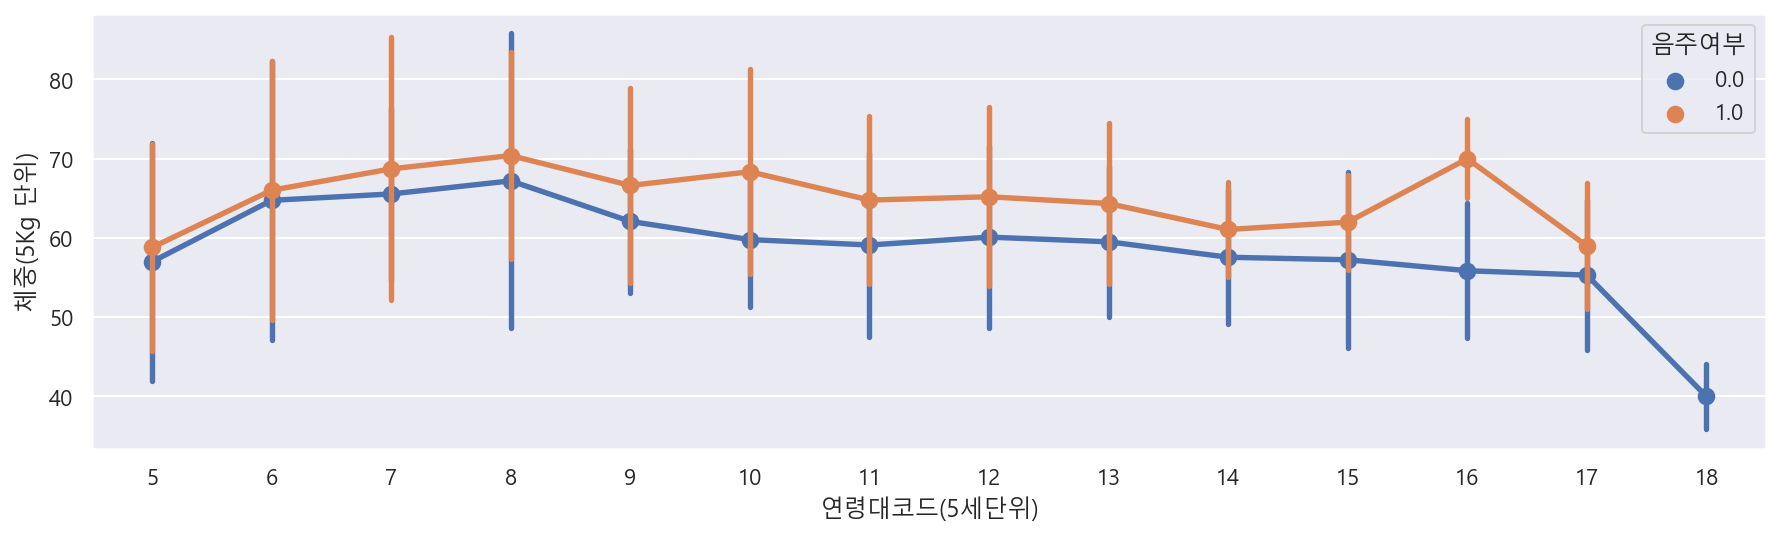

In [117]:
# 연령대코드(5세단위)에 따른 체중(5Kg 단위) 을 음주여부에 따라 pointplot 과 barplot 으로 그립니다.

plt.figure(figsize = (15,4))
sns.pointplot(data = df_sample, x="연령대코드(5세단위)", y="체중(5Kg 단위)",
            hue = "음주여부", ci ="sd")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg 단위)'>

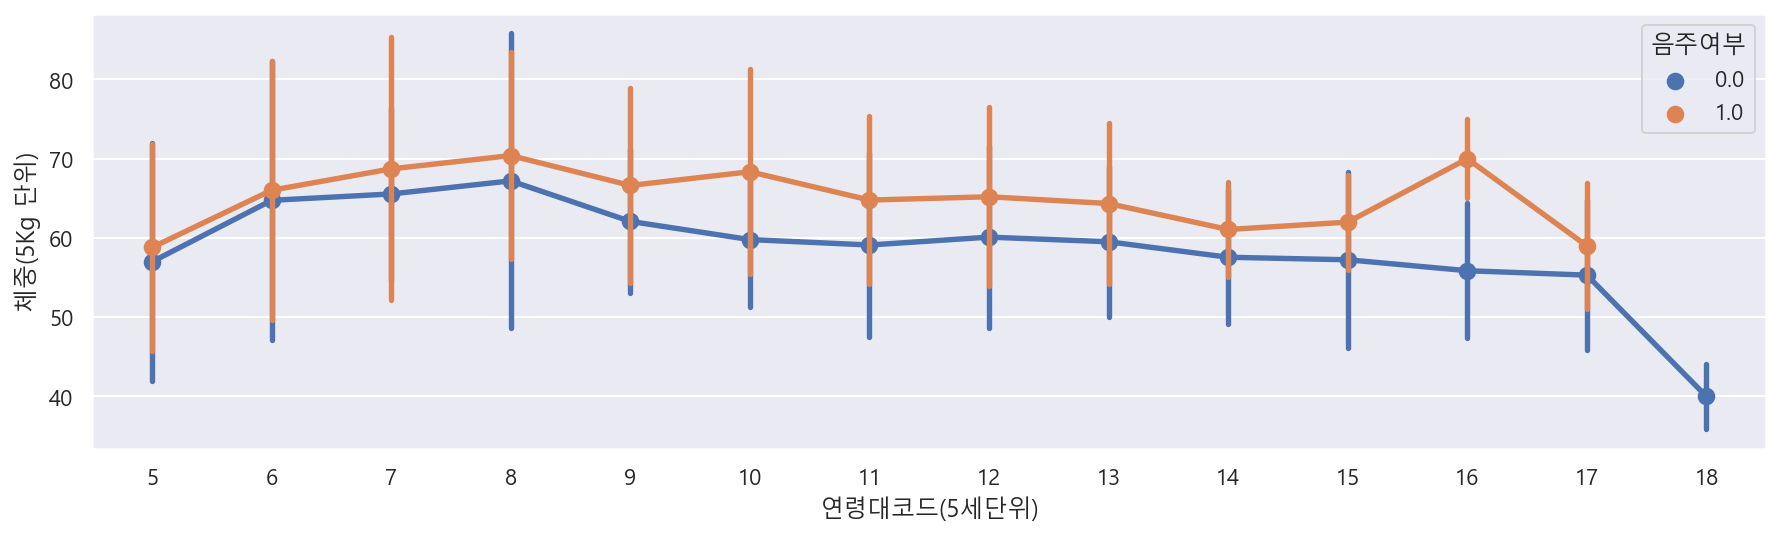

In [118]:
plt.figure(figsize = (15,4))
sns.pointplot(data = df_sample, x="연령대코드(5세단위)", y="체중(5Kg 단위)",
            hue = "음주여부", ci ="sd")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg 단위)'>

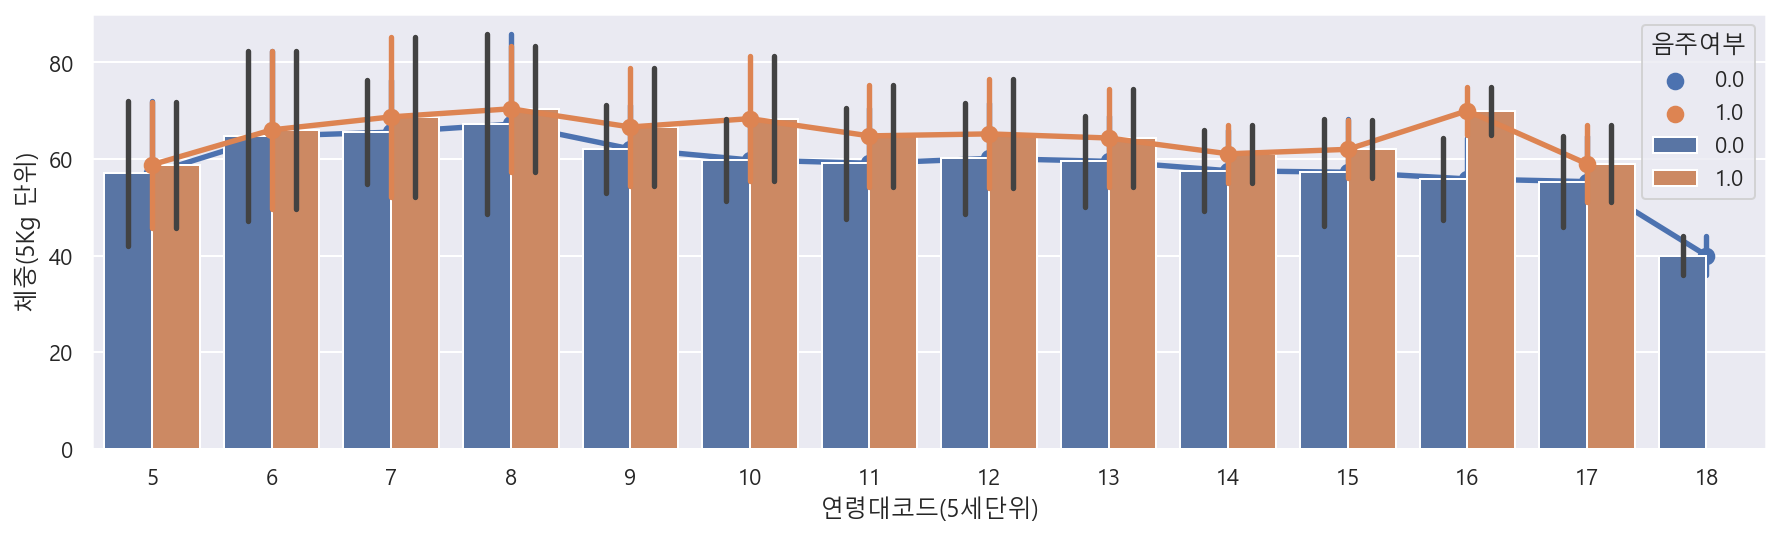

In [119]:
# pointplot과 barplot을 동시에 나타낼 수 있음

plt.figure(figsize = (15,4))
sns.pointplot(data = df_sample, x="연령대코드(5세단위)", y="체중(5Kg 단위)",
            hue = "음주여부", ci ="sd")
sns.barplot(data = df_sample, x="연령대코드(5세단위)", y="체중(5Kg 단위)",
            hue = "음주여부", ci ="sd")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

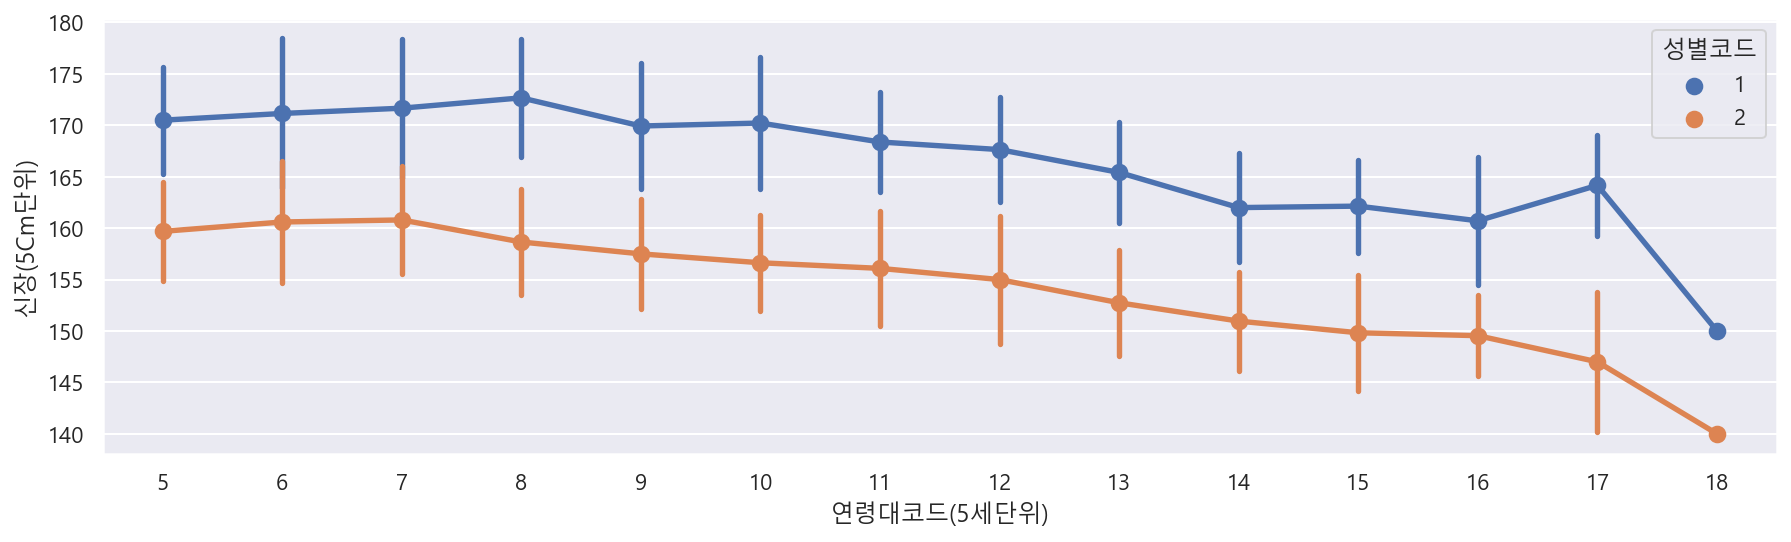

In [120]:
# 연령대코드(5세단위)에 따른 신장(5Cm단위) 을 성별보드에 따라 pointplot 으로 그립니다.

plt.figure(figsize = (15,4))
sns.pointplot(data = df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)",
            hue = "성별코드", ci ="sd")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='혈색소'>

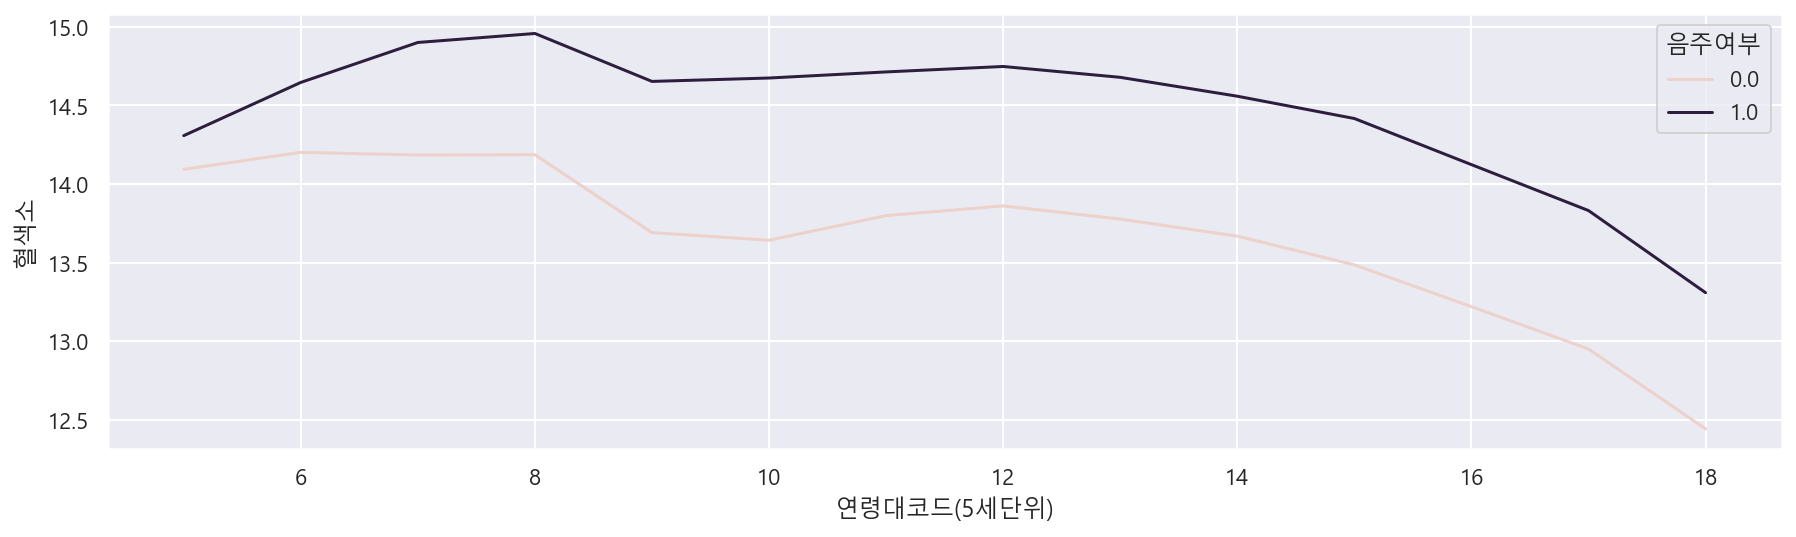

In [121]:
# 연령대코드(5세단위)에 따른 혈색소를 음주여부에 따라 lineplot 으로 그립니다.

plt.figure(figsize = (15,4))
sns.lineplot(data = df, x ="연령대코드(5세단위)", y="혈색소", hue="음주여부", ci =None)

In [122]:
# lineplot or pointplot 은 '주식의 가격', '부동산 가격', 
# '재고량', '판매량' 등의 조회를 할 때 자주 사용됨 

***

In [ ]:
# 4.9강 (18:22 ) : 데이터를 좀 더 자세히 표현하기 
# - boxplot, violinplot 그리기

### **14.6 boxplot**

- [https://pandas.pydata.org/docs/user_guide/visualization.html](https://pandas.pydata.org/docs/user_guide/visualization.html)
- [https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)
- [상자 수염 그림 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC)
- 가공하지 않은 자료 그대로를 이용하여 그린 것이 아니라, 자료로부터 얻어낸 통계량인 5가지 요약 수치로 그린다.
- 5가지 요약 수치란 기술 통계학에서 자료의 정보를 알려주는 아래의 다섯 가지 수치를 의미한다.


    1. 최솟값
    2. 제 1사분위 수
    3. 제 2사분위 수(), 즉 중앙값
    4. 제 3사분위 수()
    5. 최댓값
    6. Box plot 이해하기:
        
        - [박스 플롯에 대하여 - Box and Whisker](https://boxnwhis.kr/2019/02/19/boxplot.html)
        - [Box plot](https://towardsdatascience.com/tagged/box-plot)

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

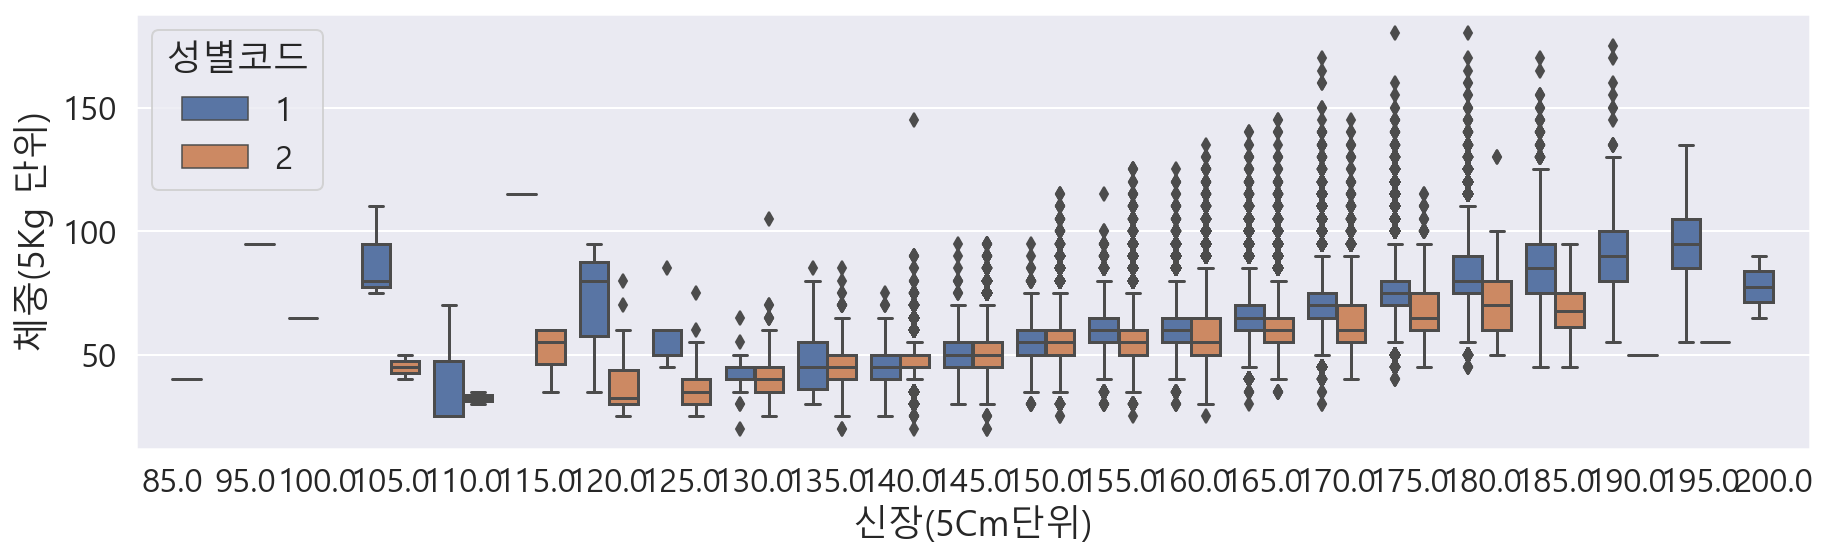

In [123]:
# boxplot 으로 신장(5Cm단위)에 따른 체중(5Kg 단위)을 그리며, 성별코드에 따라 다른 색상으로 표현되게 합니다.

sns.set(font_scale = 1.5, font = "Malgun Gothic")

plt.figure(figsize = (15,4))
sns.boxplot(data=df, x = "신장(5Cm단위)", y="체중(5Kg 단위)", hue="성별코드")

In [ ]:
# 박스 외부의 점 들은 이상치를 나타냄. 위의 그래프에는 이상치가 많이 보임.
# 가장위ㅡ 최대치
# 박스윗끝 (75%)
# 박스내부 선(50%)
# 박스아랫끝(25%)
# 가장 아래 ㅡ 최소치

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

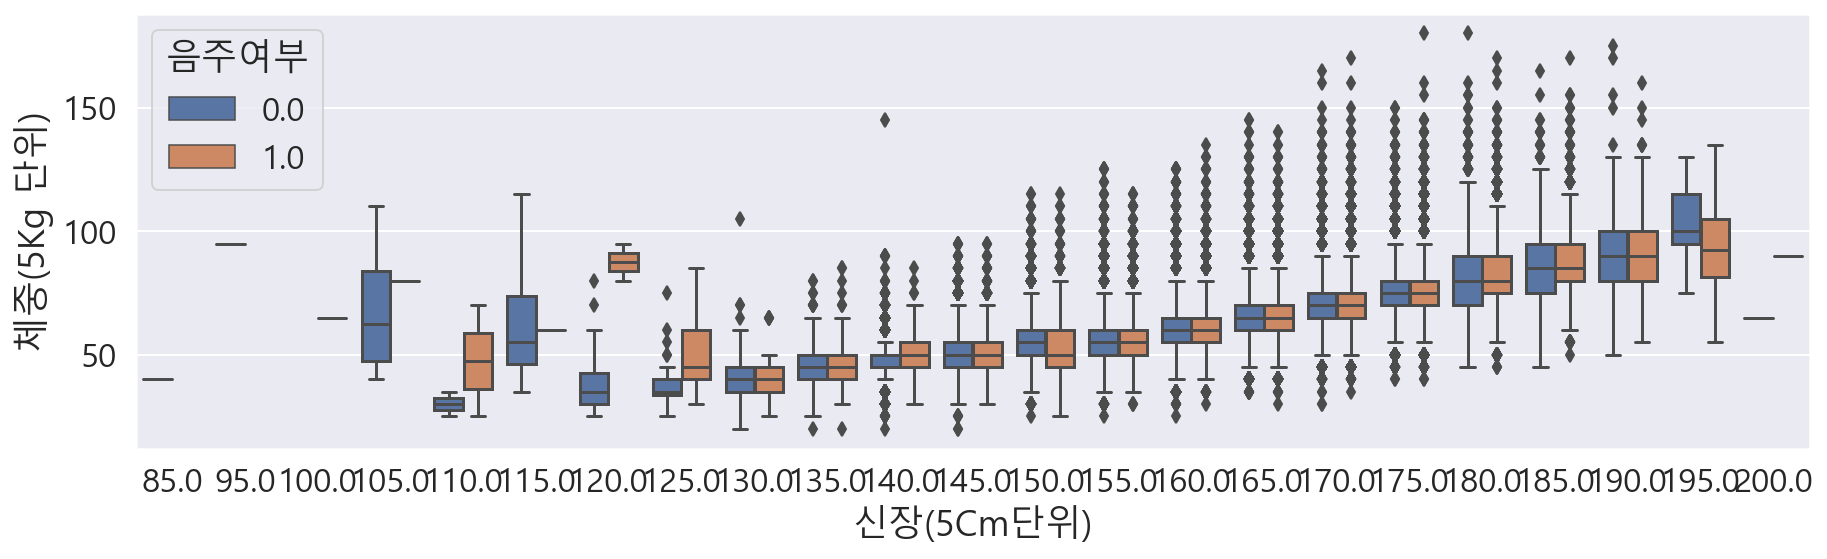

In [124]:
plt.figure(figsize = (15,4))
sns.boxplot(data=df, x = "신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부")

# "성별코드"가 아닌 "음주여부"에 따른 그래프 

### **14.7 violinplot**

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

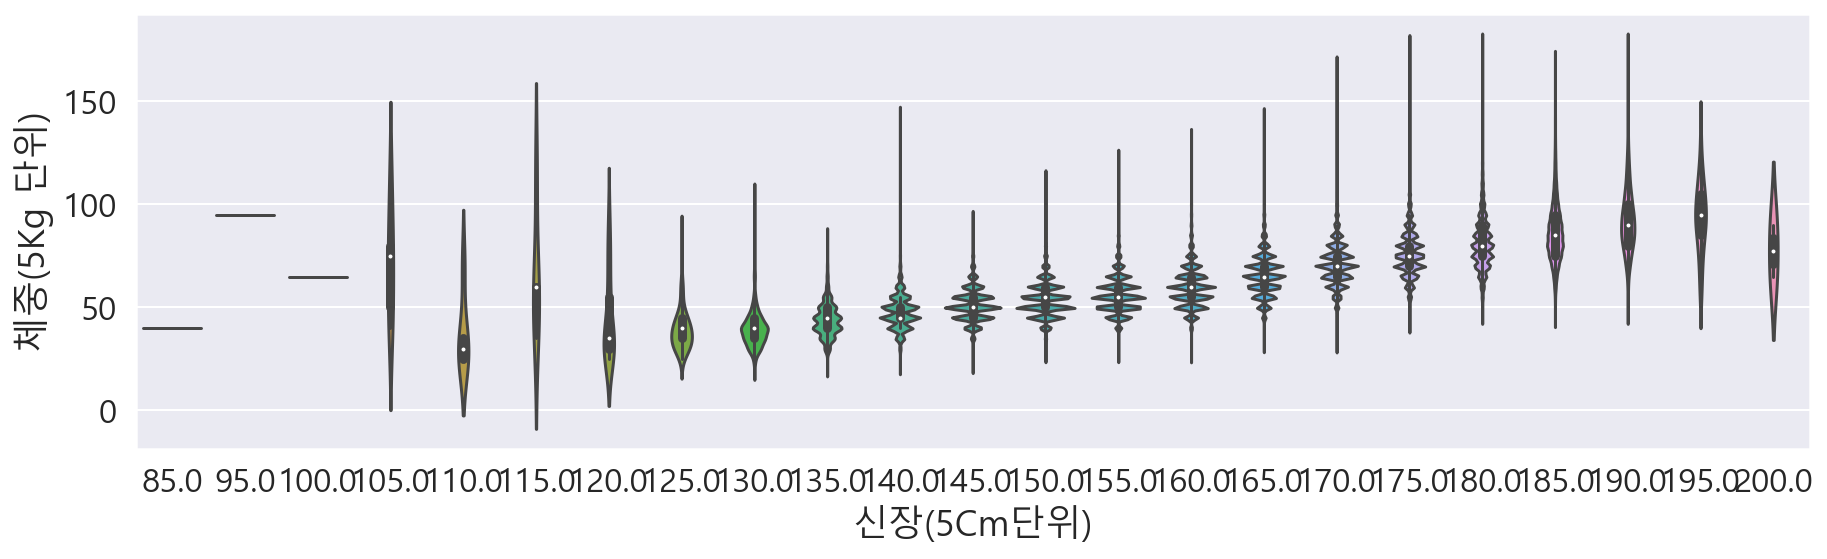

In [125]:
# violinplot 신장(5Cm단위)에 따른 체중(5Kg 단위) 을 그리며, 음주여부에 따라 다른 색상으로 표현되게 합니다.
# (violinplot은 boxplot의 박스안의 분포까지 자세히 표현하는 장점이 있음) 
# sns.set(font_scale = 1.5, font = "Malgun Gothic")

plt.figure(figsize=(15,4))
sns.violinplot(data=df, x="신장(5Cm단위)", y="체중(5Kg 단위)")

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

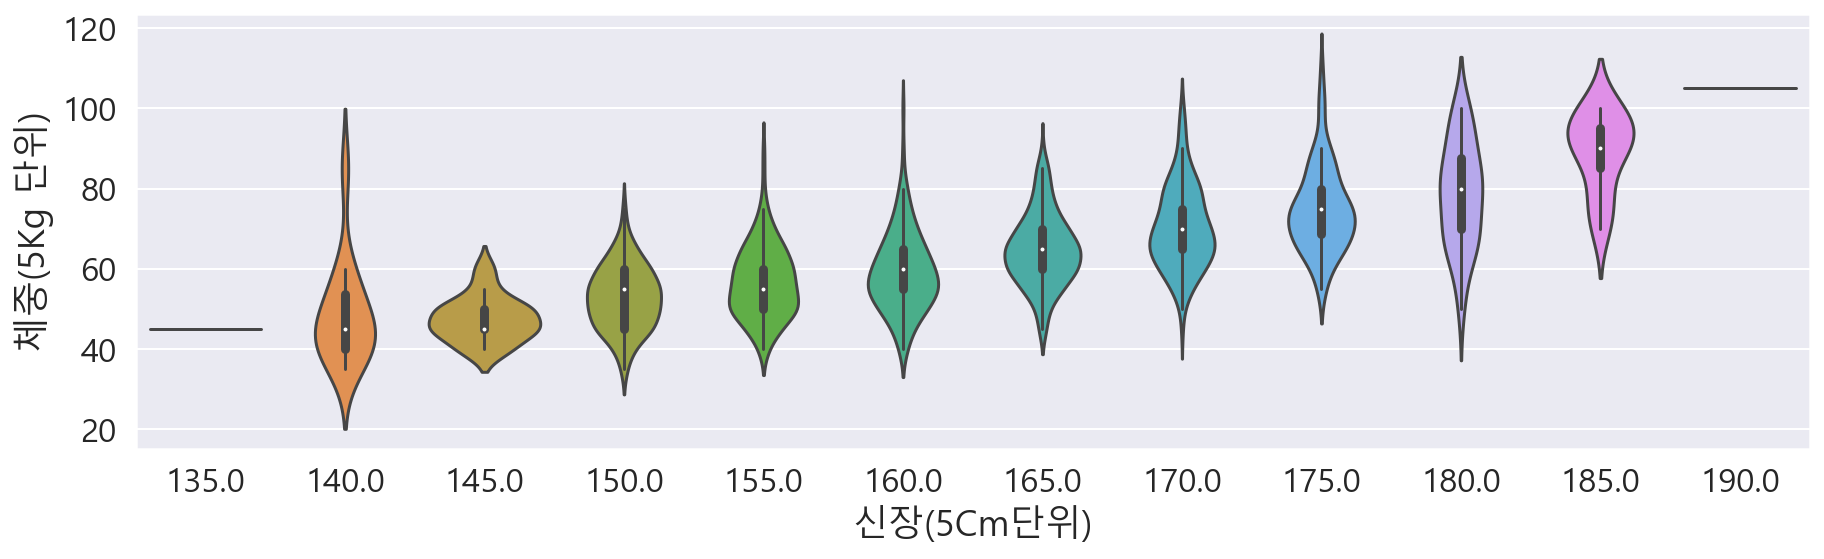

In [126]:
# df(전체데이터)가 아닌 df_sample(샘플)로 표현

plt.figure(figsize=(15,4))
sns.violinplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)")

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

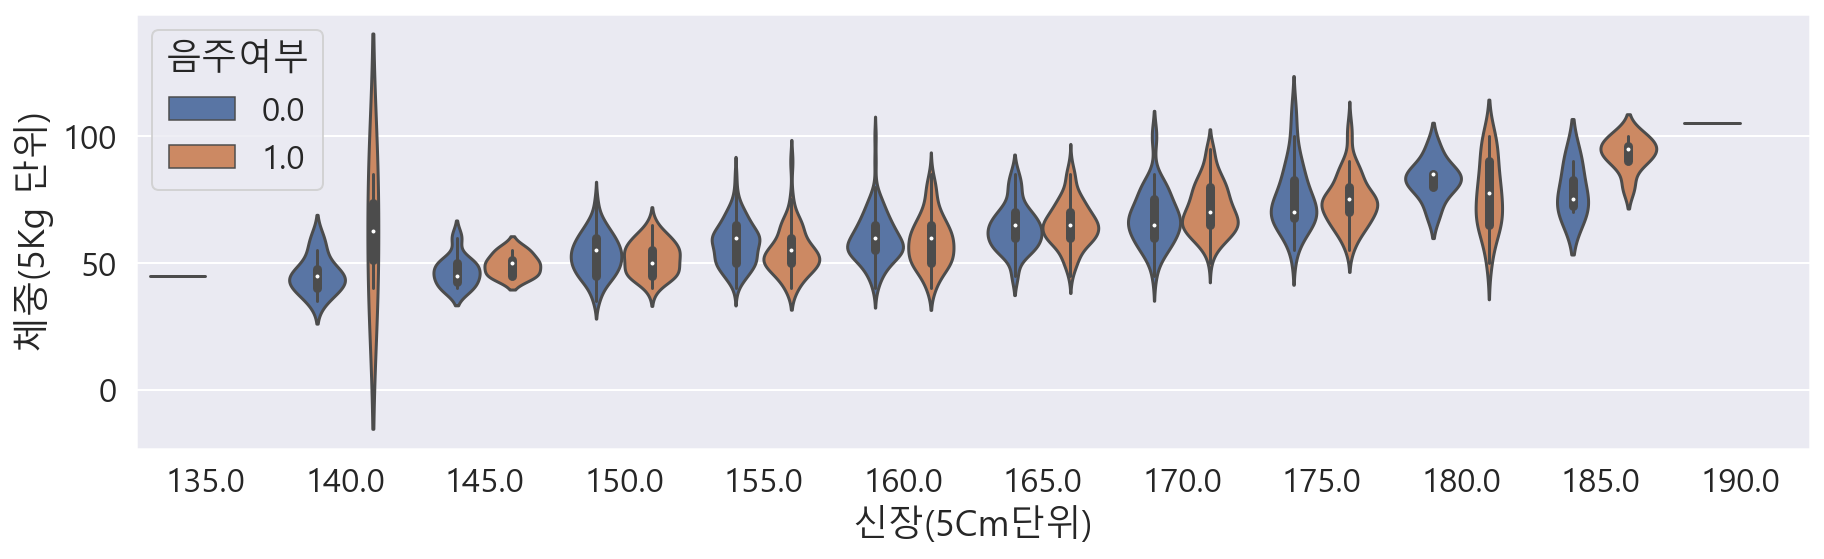

In [127]:
# 다른 색상으로 표현하기

plt.figure(figsize=(15,4))
sns.violinplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부")

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

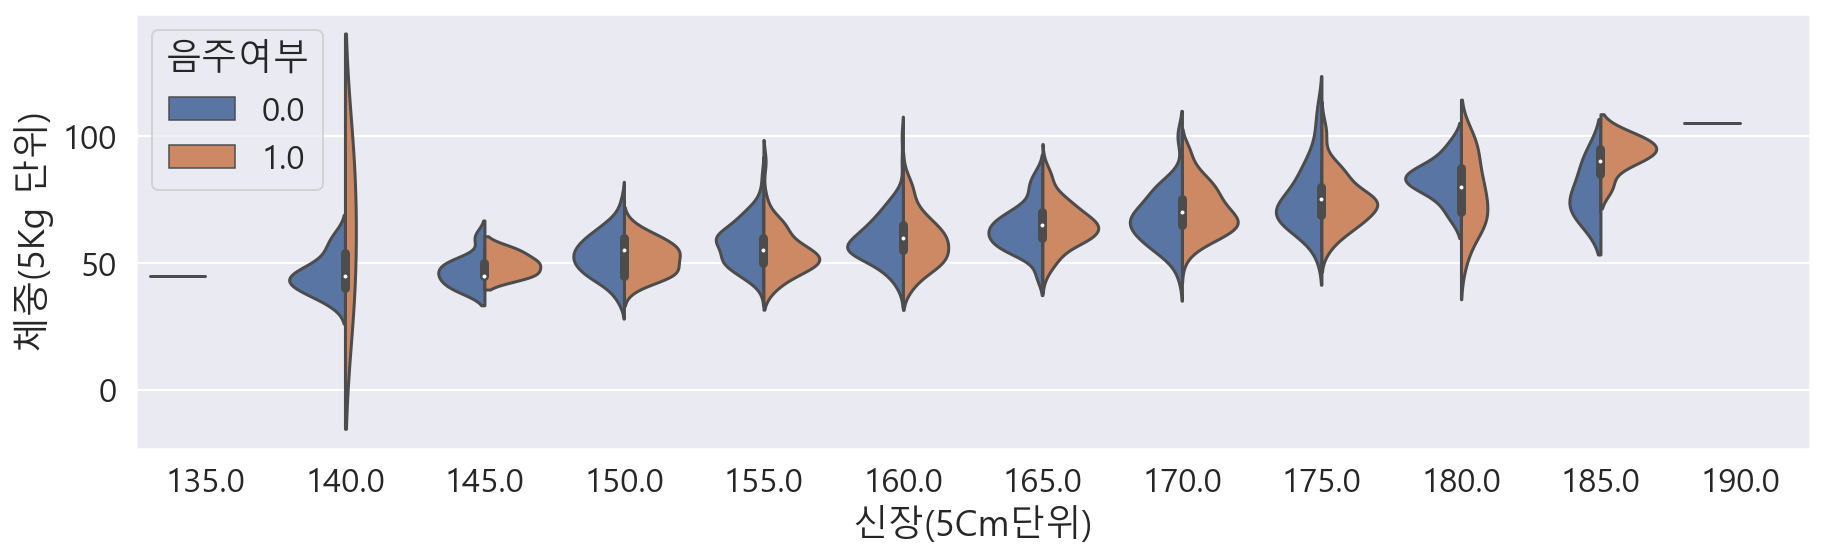

In [131]:
# violinplot 의 split 기능을 사용해 봅니다.

plt.figure(figsize=(15,4))
sns.violinplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)",
               hue="음주여부", split=True)

# split은 위의 그래프는 하나로 붙여서 표현되게한다.
# violinplot은 boxplot을 더 자세하게 표현하다. 

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='혈색소'>

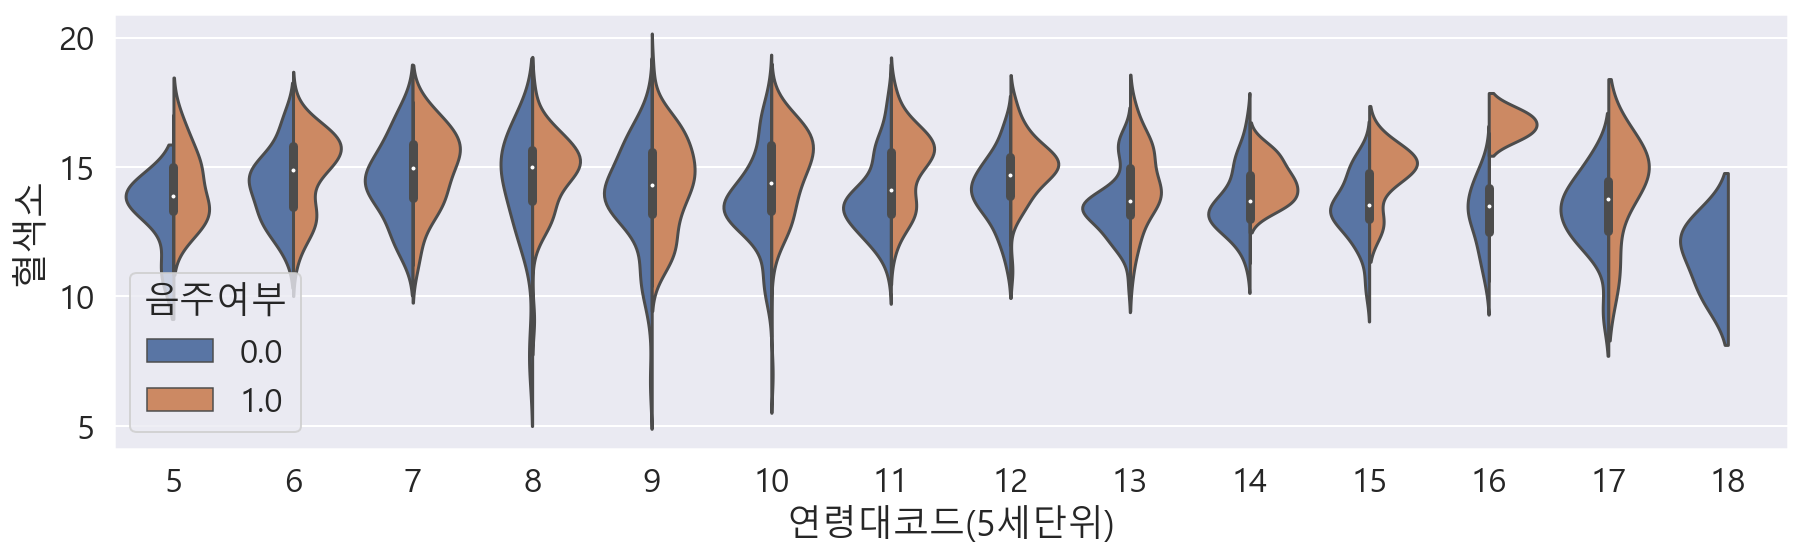

In [130]:
# violinplot 연령대코드(5세단위)에 따른 혈색소를 그리며, 음주여부에 따라 다른 색상으로 표현되게 합니다.

plt.figure(figsize=(15,4))
sns.violinplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소",
               hue="음주여부", split=True)

### **14.8 swarm plot**

- 범주형 데이터를 산점도로 시각화하고자 할 때 사용합니다.

C:\Users\YUNI\Desktop\WinPython\WPy64-39100\python-3.9.10.amd64\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\YUNI\Desktop\WinPython\WPy64-39100\python-3.9.10.amd64\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\YUNI\Desktop\WinPython\WPy64-39100\python-3.9.10.amd64\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 51.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\YUNI\Desktop\WinPython\WPy64-39100\python-3.9.10.amd64\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 55.4% of the points cannot be placed; you may want to decrease the size of the markers 

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

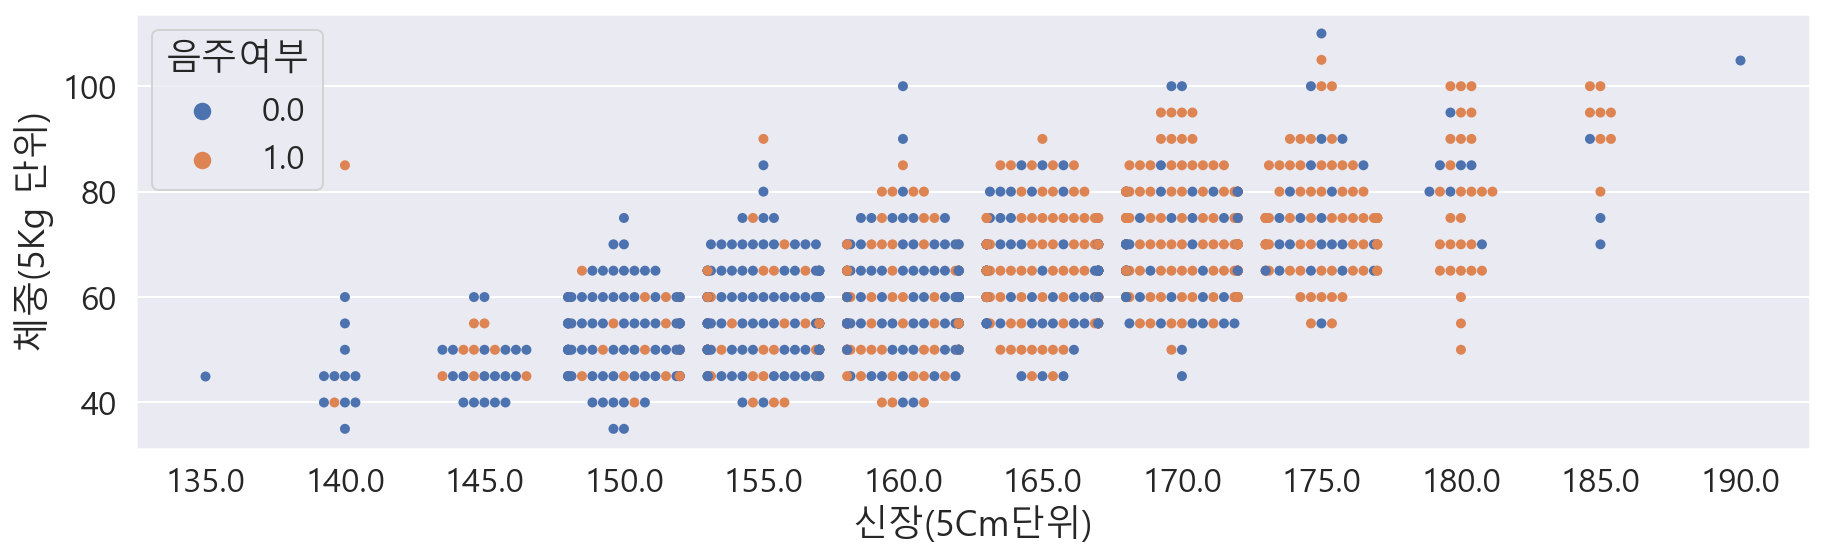

In [133]:
# swarmplot 으로 신장(5Cm단위)에 따른 체중(5Kg 단위)을 그리며, 음주여부에 따라 다른 색상으로 표현되게 합니다.
# 점을 하나씩 찍기 때문에 오래 걸리는 코드는 전체로 그려보기 전에 일부만 가져와 그려봅니다.

plt.figure(figsize=(15,4))
sns.swarmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)",
               hue="음주여부")

C:\Users\YUNI\Desktop\WinPython\WPy64-39100\python-3.9.10.amd64\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\YUNI\Desktop\WinPython\WPy64-39100\python-3.9.10.amd64\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\YUNI\Desktop\WinPython\WPy64-39100\python-3.9.10.amd64\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 51.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\YUNI\Desktop\WinPython\WPy64-39100\python-3.9.10.amd64\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 55.4% of the points cannot be placed; you may want to decrease the size of the markers 

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

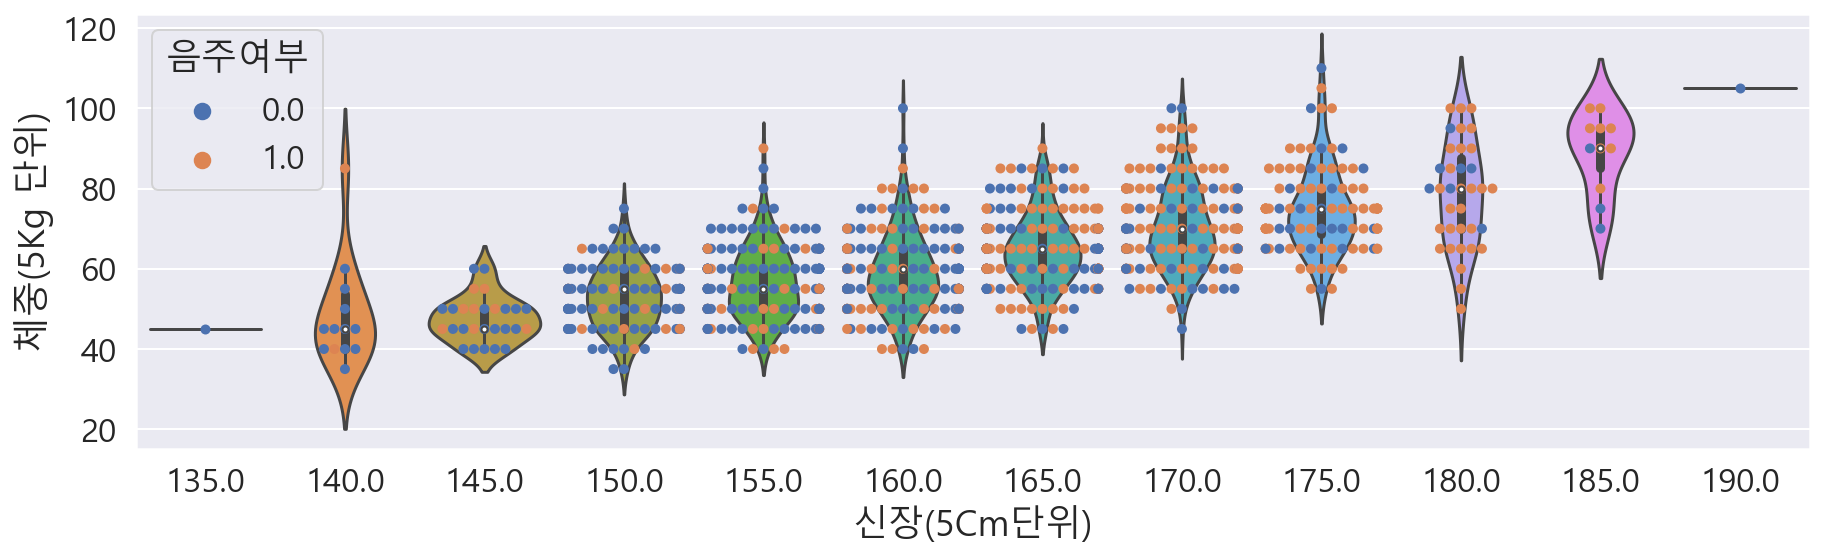

In [135]:
# swarmplot과 violinplot을 함께 그려봄

plt.figure(figsize=(15,4))
sns.swarmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)",
               hue="음주여부")
sns.violinplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)")

C:\Users\YUNI\Desktop\WinPython\WPy64-39100\python-3.9.10.amd64\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\YUNI\Desktop\WinPython\WPy64-39100\python-3.9.10.amd64\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\YUNI\Desktop\WinPython\WPy64-39100\python-3.9.10.amd64\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\YUNI\Desktop\WinPython\WPy64-39100\python-3.9.10.amd64\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.2% of the points cannot be placed; you may want to decrease the size of the markers or

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='혈색소'>

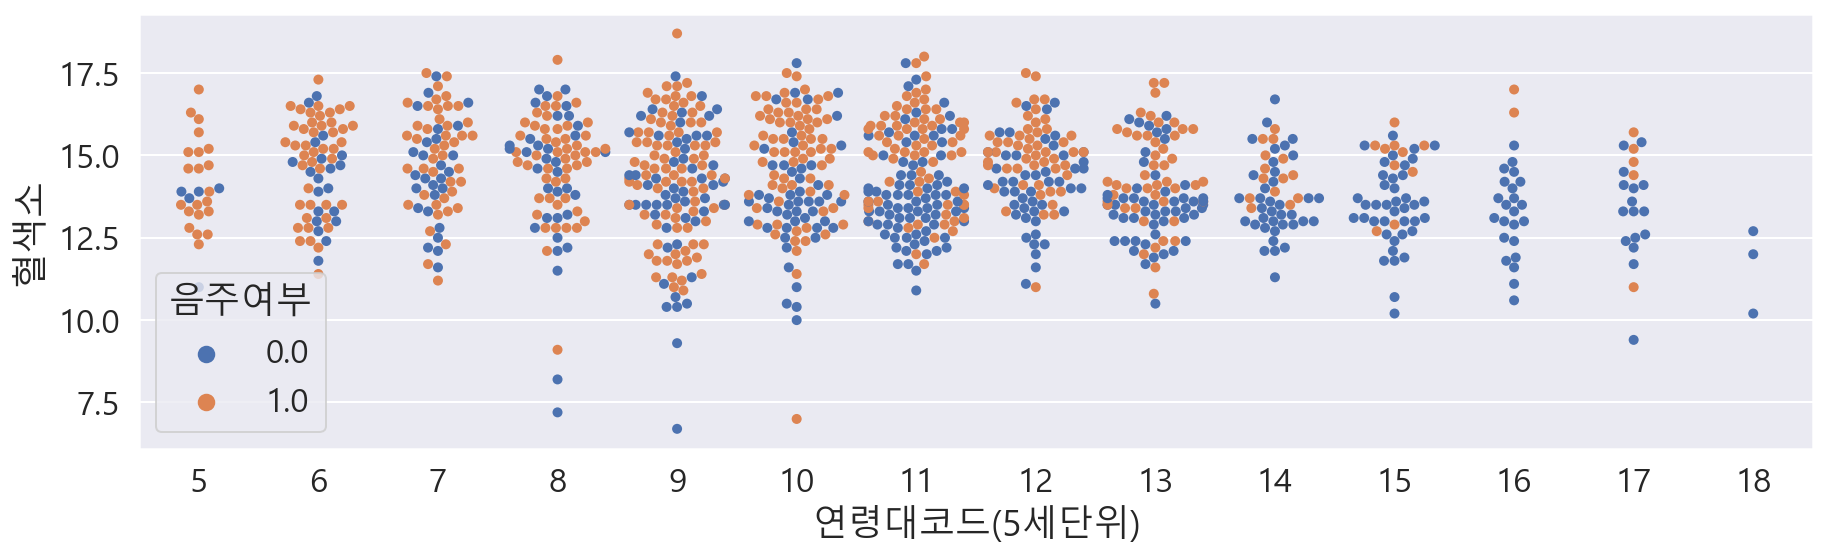

In [136]:
# swarmplot 으로 연령대코드(5세단위)에 따른 음주여부를 그리며, 성별코드에 따라 다른 색상으로 표현되게 합니다.
# 점을 하나씩 찍기 때문에 오래 걸리는 코드는 전체로 그려보기 전에 일부만 가져와 그려봅니다.

plt.figure(figsize=(15,4))
sns.swarmplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부")

In [137]:
# 음주하는 사람들(주황1)들이 대체로 혈색소값이 높은 것을 관찰할 수 있다.

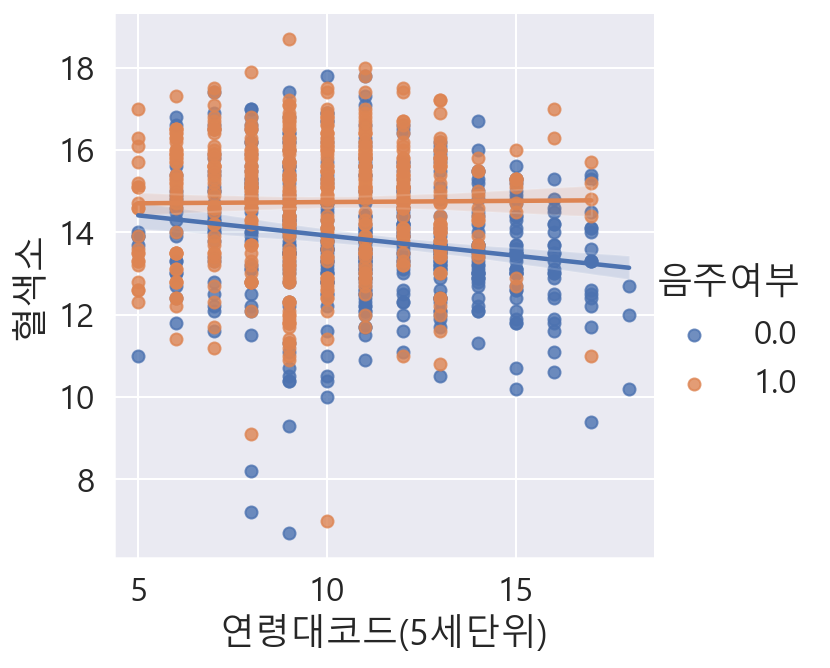

In [139]:
# lmplot 으로 그리기

sns.lmplot(data =df_sample, x="연령대코드(5세단위)" ,y="혈색소", hue="음주여부" )

In [140]:
# lmplot 에서는 swarmplot 의 점들을 한 줄로 나란히 나타내는 동시에
# 회귀선또한 나타내므로 보기 편한 장점이 있다.

# 음주하는 사람들(주황1)의 회귀선이 비음주자(파랑0)의 회귀선보다 위에 위치하는 것에 따라
# 음주자들의 혈색소가 비음주자들의 혈색소가 더 높은 편임을 알 수 있다.

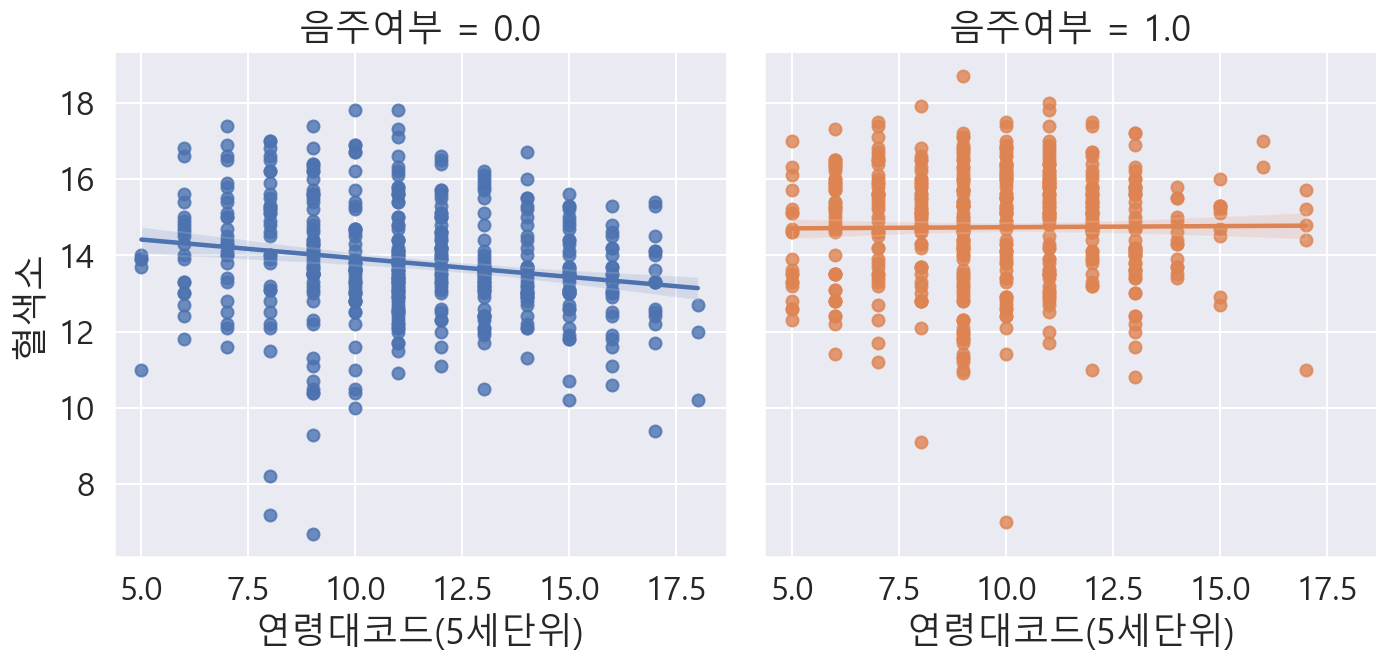

In [144]:
# col="음주여부" 적용 (열을 음주여부에 따라 각각 그림)

sns.lmplot(data =df_sample, x="연령대코드(5세단위)" ,y="혈색소",
           hue="음주여부", col="음주여부")

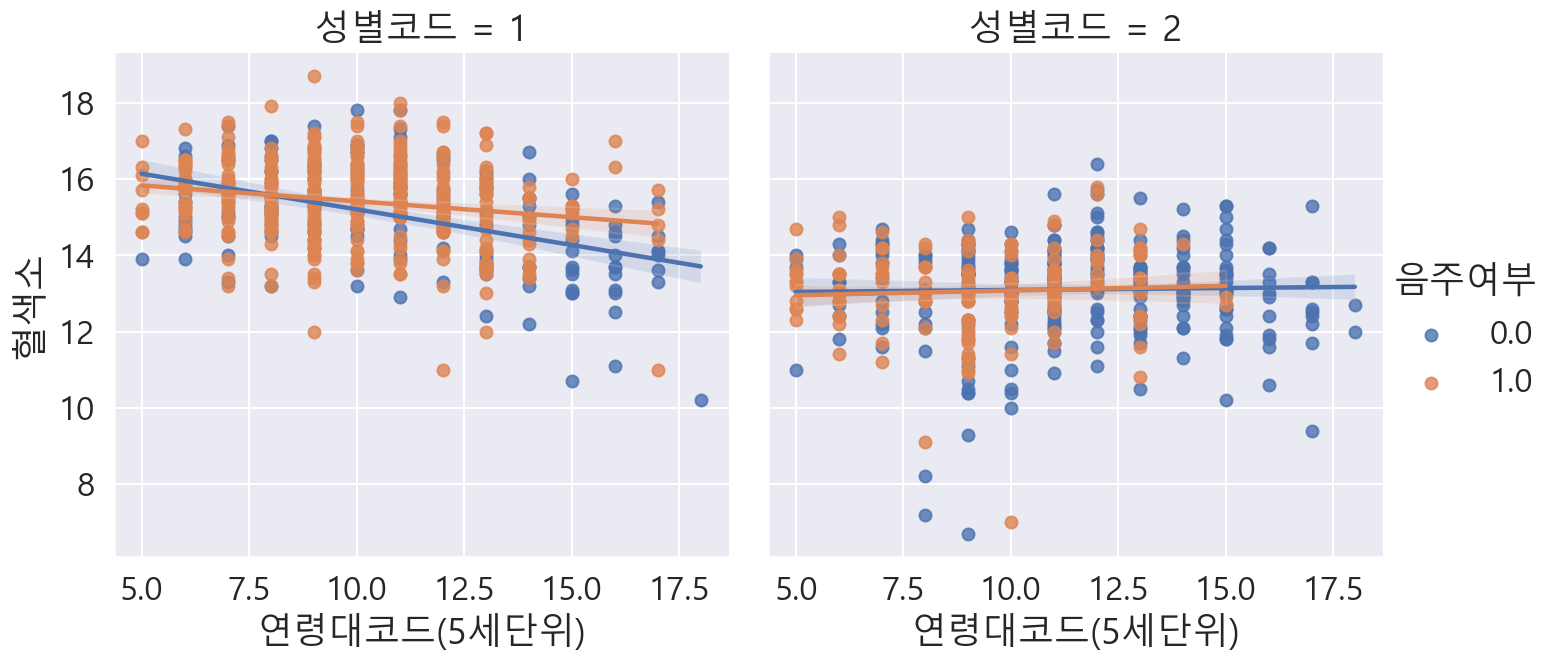

In [146]:
# col="성별코드" 적용 (열을 성별코드에 따라 각각 그림)

sns.lmplot(data =df_sample, x="연령대코드(5세단위)" ,y="혈색소",
           hue="음주여부", col="성별코드")

In [147]:
# lmplot 은 다변수(x,y,hue,col 등)을 한줄의 코드로 시각화 하는 장점이 있다. 
# lmplot 처럼 몰려있는 데이터를 파악 하기 어려우면 swarmplot 을 이용하여 분포도를 관찰

***

In [ ]:
# 4.10강 (22:08 ) :산점도(산포도)와 회귀선 상관관계 보기 - scatterplot, lmplot

### **15. Numeric data visualization**

수치형 데이터 시각화

#### **15.1 scatterplot**

산점도

- 수치형 VS 수치형 데이터의 상관 관계를 볼 때 주로 사용합니다.
- 점의 크기를 데이터의 수치에 따라 다르게 볼 수 있습니다.

<AxesSubplot:xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

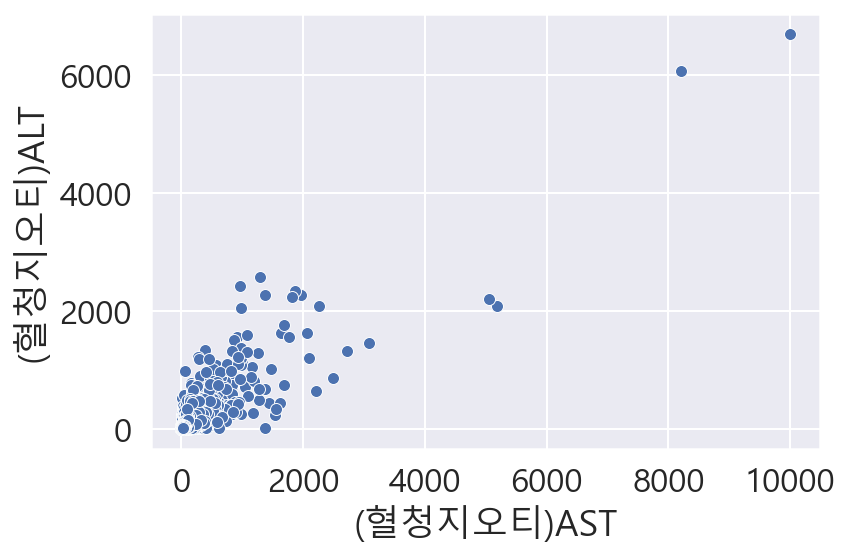

In [149]:
# scatterplot 으로 "(혈청지오티)AST", "(혈청지오티)ALT" 을 그리고 음주여부에 따라 다른 새강으로 표현되게 합니다.
# (sns.sc + tab키 누르면 자동완성)

sns.scatterplot(data = df, x = "(혈청지오티)AST" , y = "(혈청지오티)ALT")

# 점을 일일이 찍어내기 때문에 시간이 오래 걸릴 수 있다.

<AxesSubplot:xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

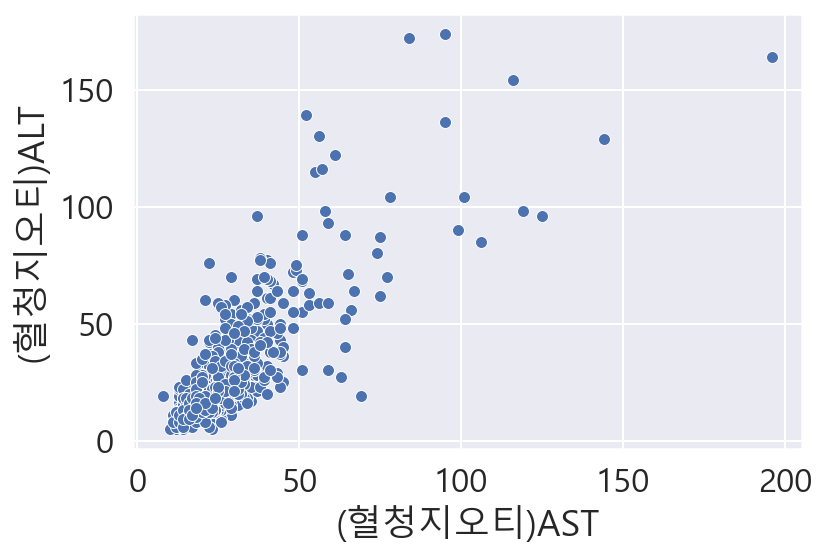

In [150]:
# 시간 절약을 위해 df_sample 적용

sns.scatterplot(data = df_sample, x = "(혈청지오티)AST" , y = "(혈청지오티)ALT")

In [ ]:
# 위의 그래프는 이상치(200 가까이 되는것)들을 파악하기 쉽다.

<AxesSubplot:xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

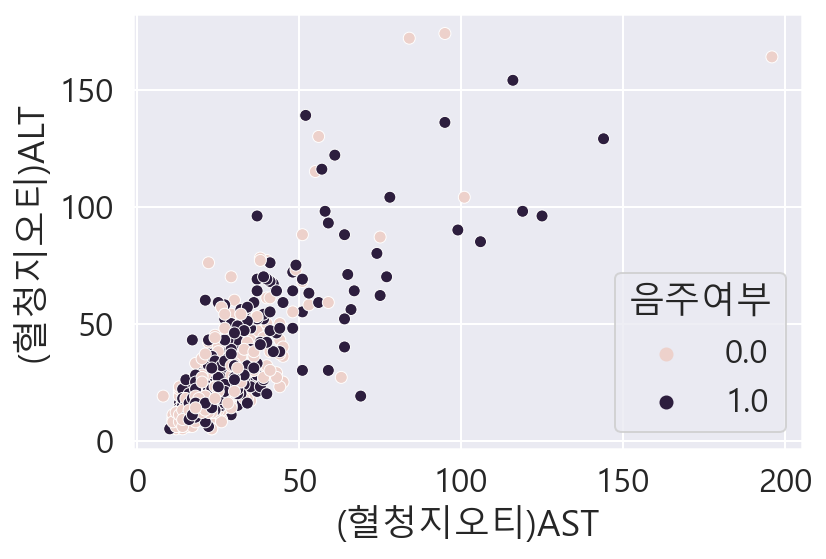

In [151]:
# "음주여부" 따라 그려보기

sns.scatterplot(data = df_sample, x = "(혈청지오티)AST" , y = "(혈청지오티)ALT", hue ="음주여부")

<AxesSubplot:xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

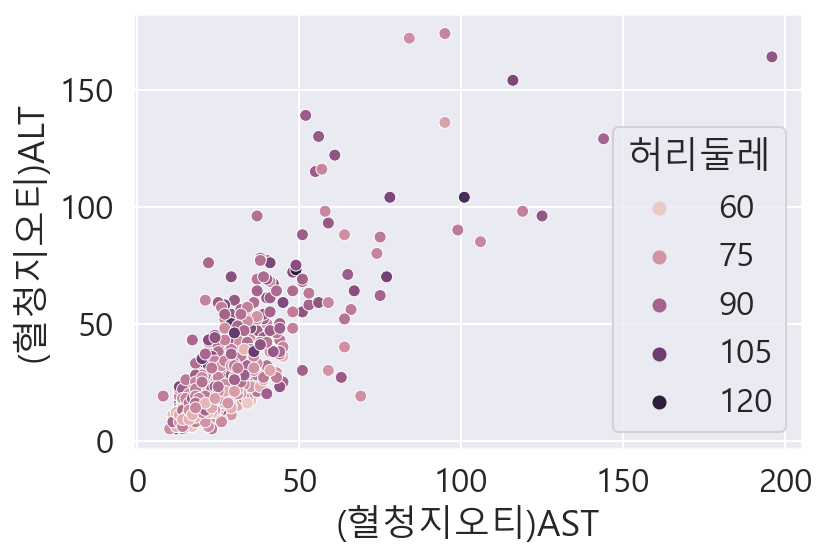

In [152]:
# "허리둘레" 따라 그려보기

sns.scatterplot(data = df_sample, x = "(혈청지오티)AST" , y = "(혈청지오티)ALT",
                hue ="허리둘레")

<AxesSubplot:xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

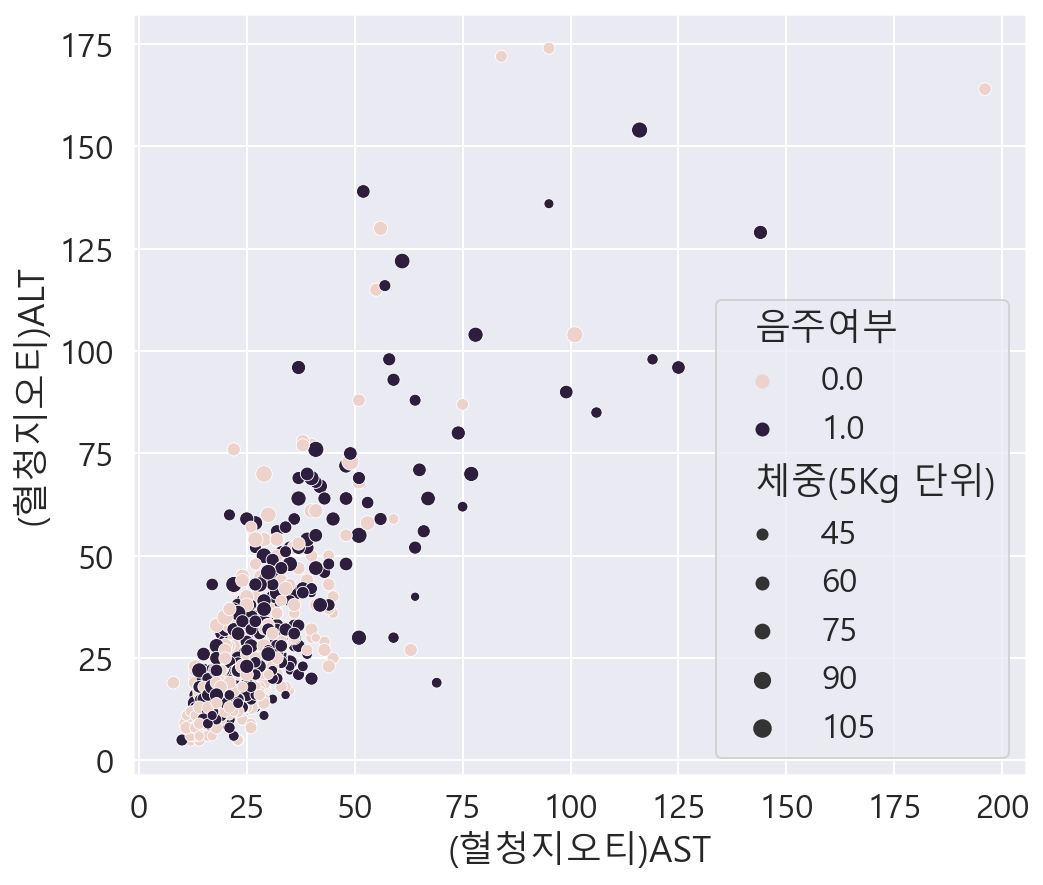

In [154]:
# "음주여부"에 따라 그리고 "체중(5Kg 단위)"에 따라 원의 크기를 관찰하기

plt.figure(figsize=(8,7))
sns.scatterplot(data = df_sample, x = "(혈청지오티)AST" , y = "(혈청지오티)ALT",
                hue ="음주여부", size ="체중(5Kg 단위)")

#### **15.2 implot - Correlation view**

상관관계 보기

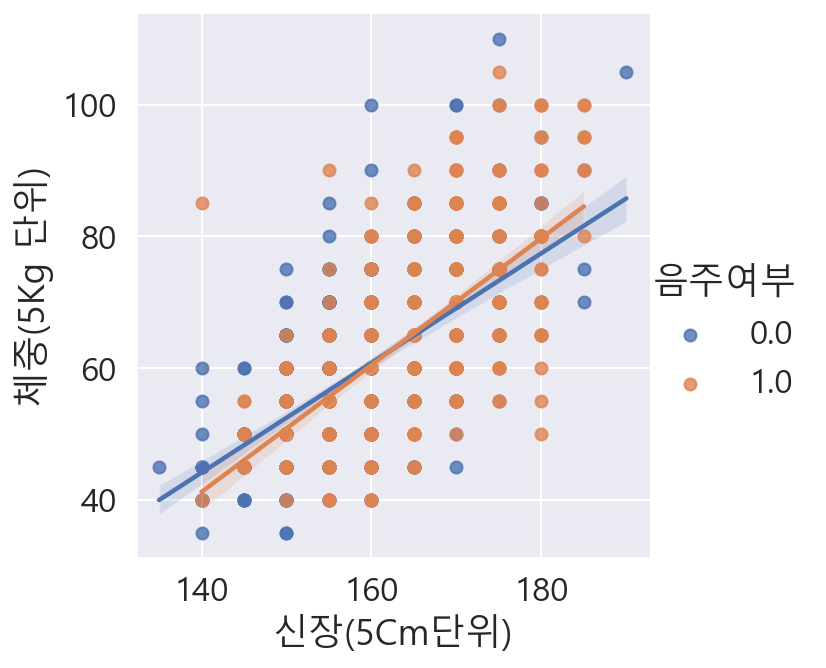

In [155]:
# lmplot 으로 신장(5Cm단위)에 따른 체중(5Kg 단위) 을 그리며, 음주여부에 따라 다른 색상으로 표현되게 합니다.

sns.lmplot(data = df_sample, x = "신장(5Cm단위)", y = "체중(5Kg 단위)",
           hue = "음주여부")

In [156]:
# 위의 그래프가 그리드 처럼 격자로 그려지는 이류는
# 연속된 수치데이터임에도 불구하고 5Cm단위, 5Kg단위 등 카테고리 형태로 되어있기 때문임.

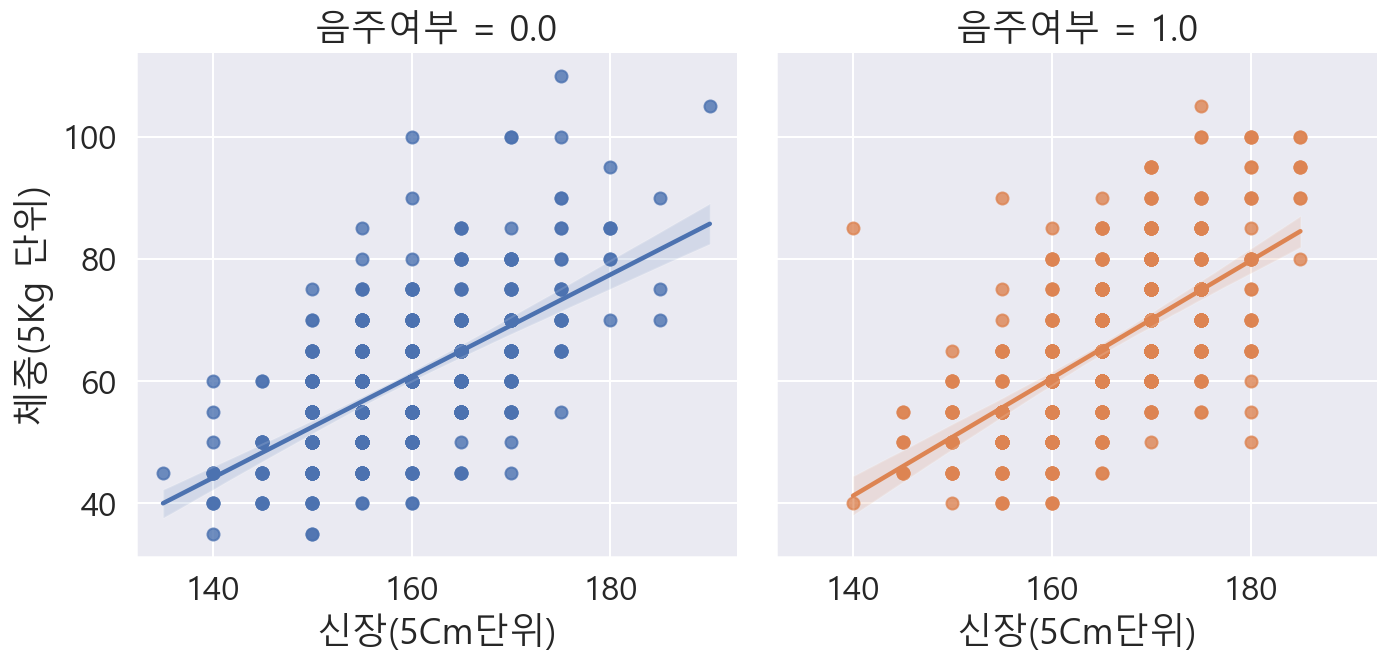

In [157]:
# col = "음주여부" 를 적용해 따로보기

sns.lmplot(data = df_sample, x = "신장(5Cm단위)", y = "체중(5Kg 단위)",
           hue = "음주여부", col = "음주여부")

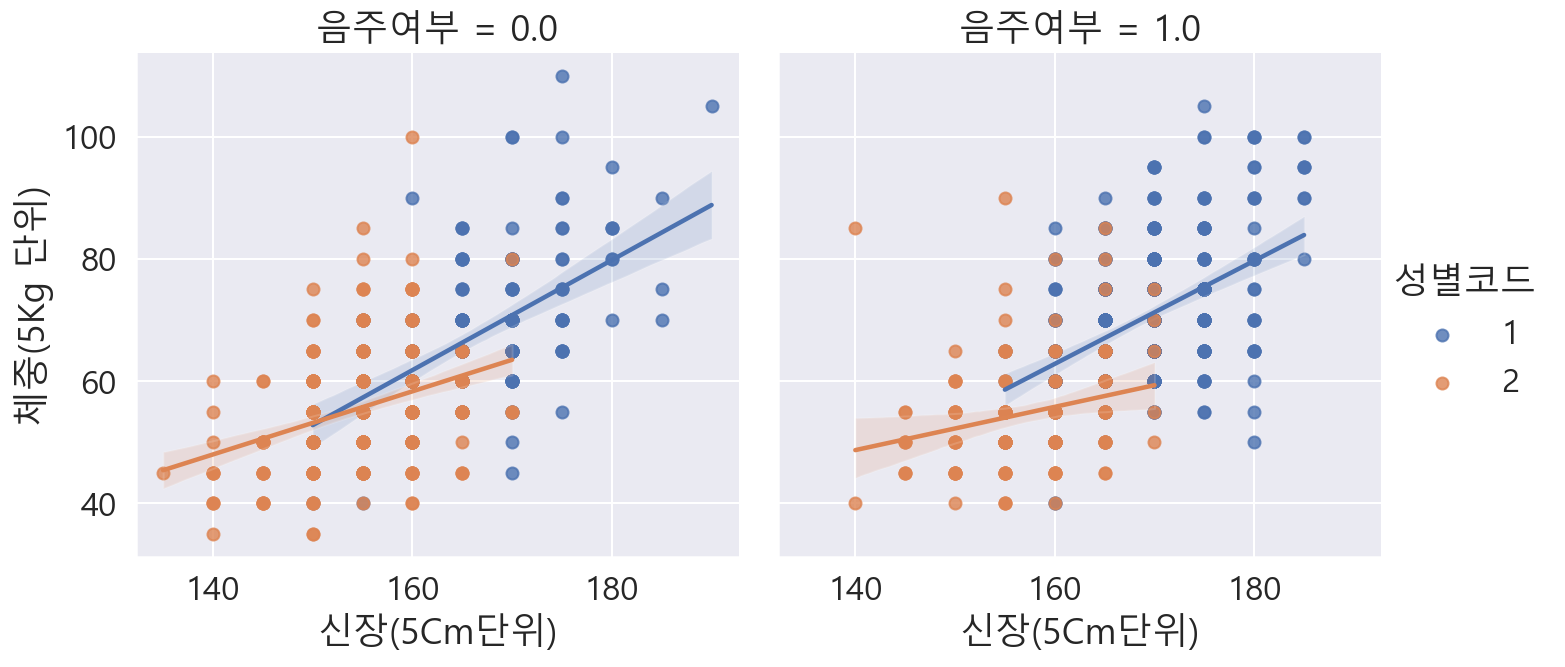

In [160]:
# col = "음주여부" 를 적용해 따로보기
# hue = "성별코드"에 따라 색상을 다르게 표현하기 - 파랑1(남자), 주황2(여자)

sns.lmplot(data = df_sample, x = "신장(5Cm단위)", y = "체중(5Kg 단위)",
           hue = "성별코드", col = "음주여부")

In [162]:
# 위의 그래프를 분석해보면,
# 음주하지 않는 사람들(0.0)의 경우,
# 남성(1)이 여성(2)보다 신장과 체중이 높은편이고,
# 위의 그래프에서 회귀선의 기울기가 +이므로 신장과 체중은 '양의 상관관계'(비례)가 있다고 표현한다.
# 회귀선이 반비례형태로 그려지면 '음의 상관관계'가 있다고 말한다.
# 이 테마는 '상관분석'에서 따로 다룬다.

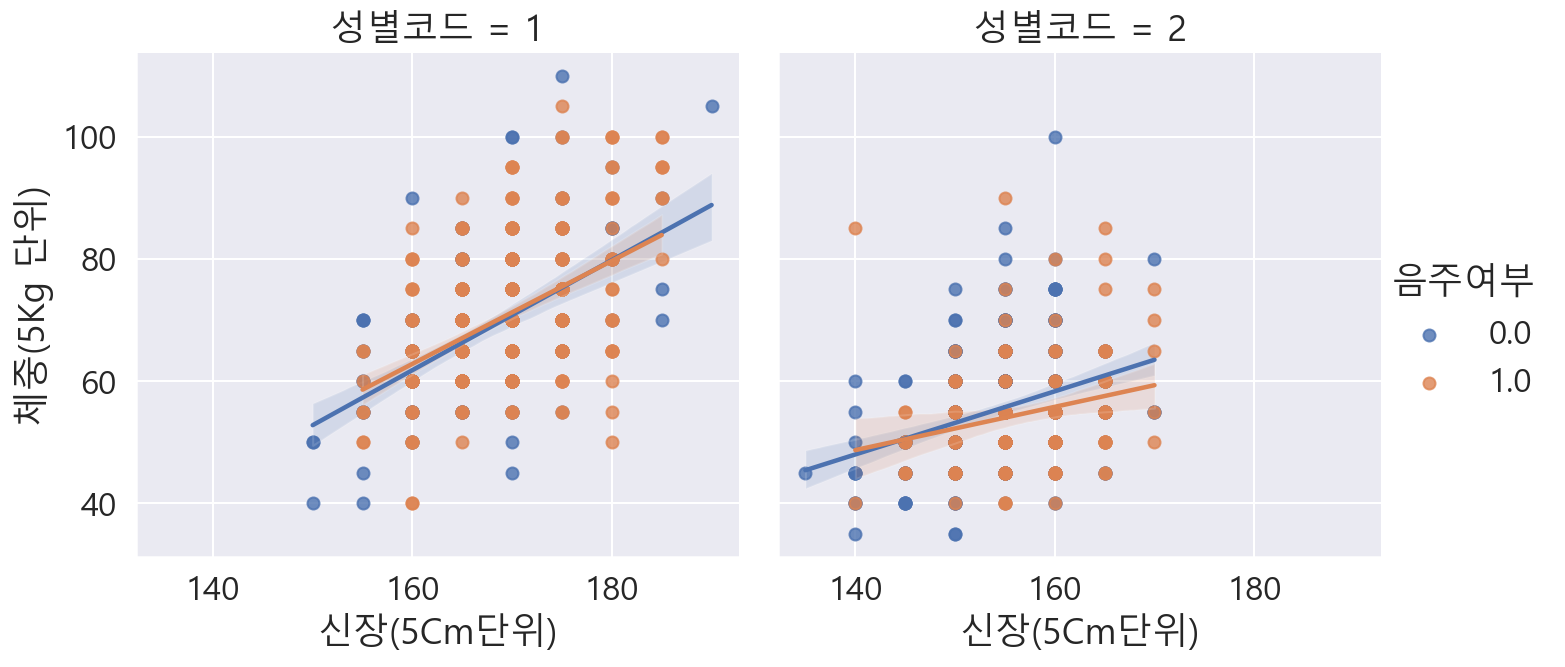

In [163]:
# 위의 그래프의 col과 hue값을 반대로 그려보기
#  hue = "음주여부", col = "성별코드"

sns.lmplot(data = df_sample, x = "신장(5Cm단위)", y = "체중(5Kg 단위)",
           hue = "음주여부", col = "성별코드")

In [ ]:
# 위의 그래프를 분석해보면,

# 남자(1)일 경우 회귀선 2개가 거의 겹쳐져 보임.
# 따라서 신장과 체중은 음주여부에 따라 큰 차이는 보이지 않는 다는 것을 관찰.

# 여자(2)일 경우 음주하지 않는 사람들(파랑0.0)의 그래프가 좀 더 가파름.
# 즉, 음주하지 않는 사람들의 경우 신장과 체중의 상관관계가 좀 더 높은 것으로 보여진다.

In [164]:
# lmplot의 장점은,
# scatterplot과는 다르게 여러 카테고리 변수에 따라 서브플롯을 그릴 수 있다는 점이다.

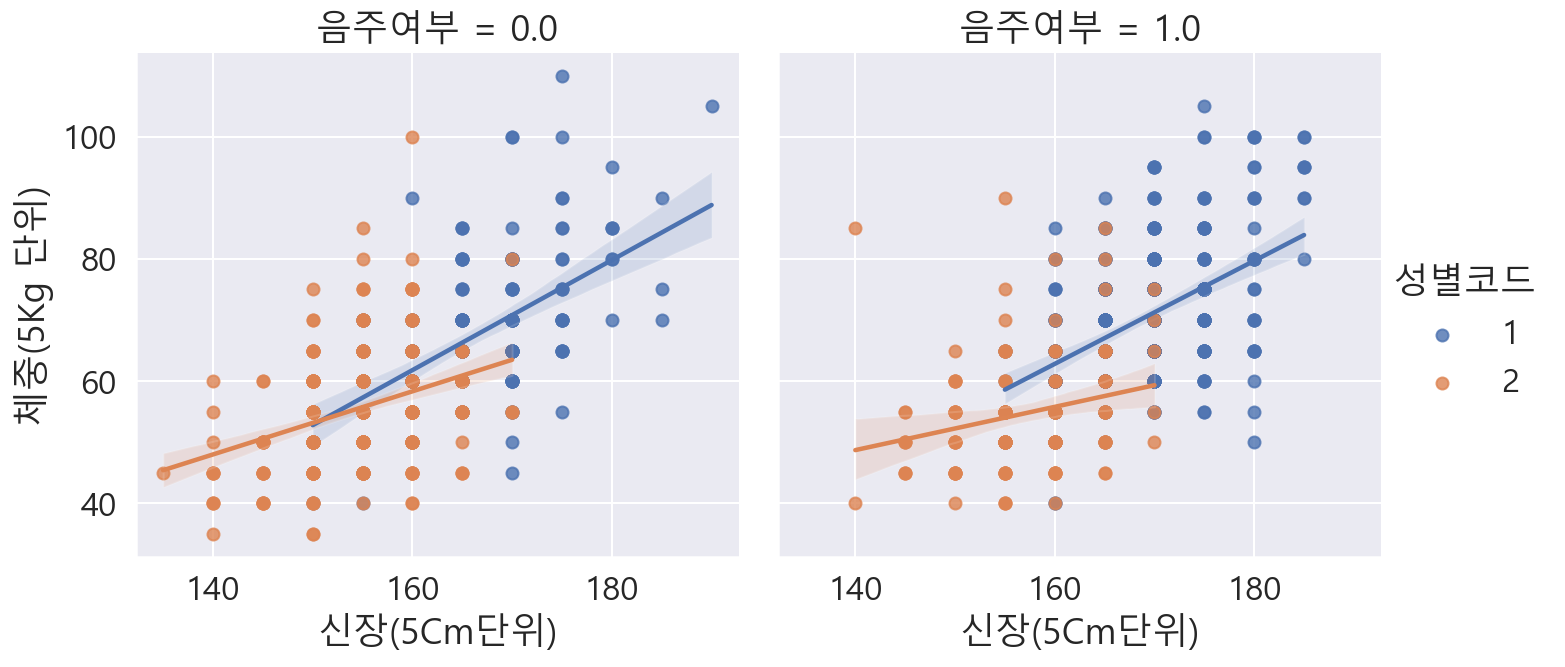

In [165]:
# lmplot의 col기능을 통해 음주여부에 따라 서브플롯을 그려봅니다.

sns.lmplot(data = df_sample, x = "신장(5Cm단위)", y = "체중(5Kg 단위)",
           hue = "성별코드", col = "음주여부")

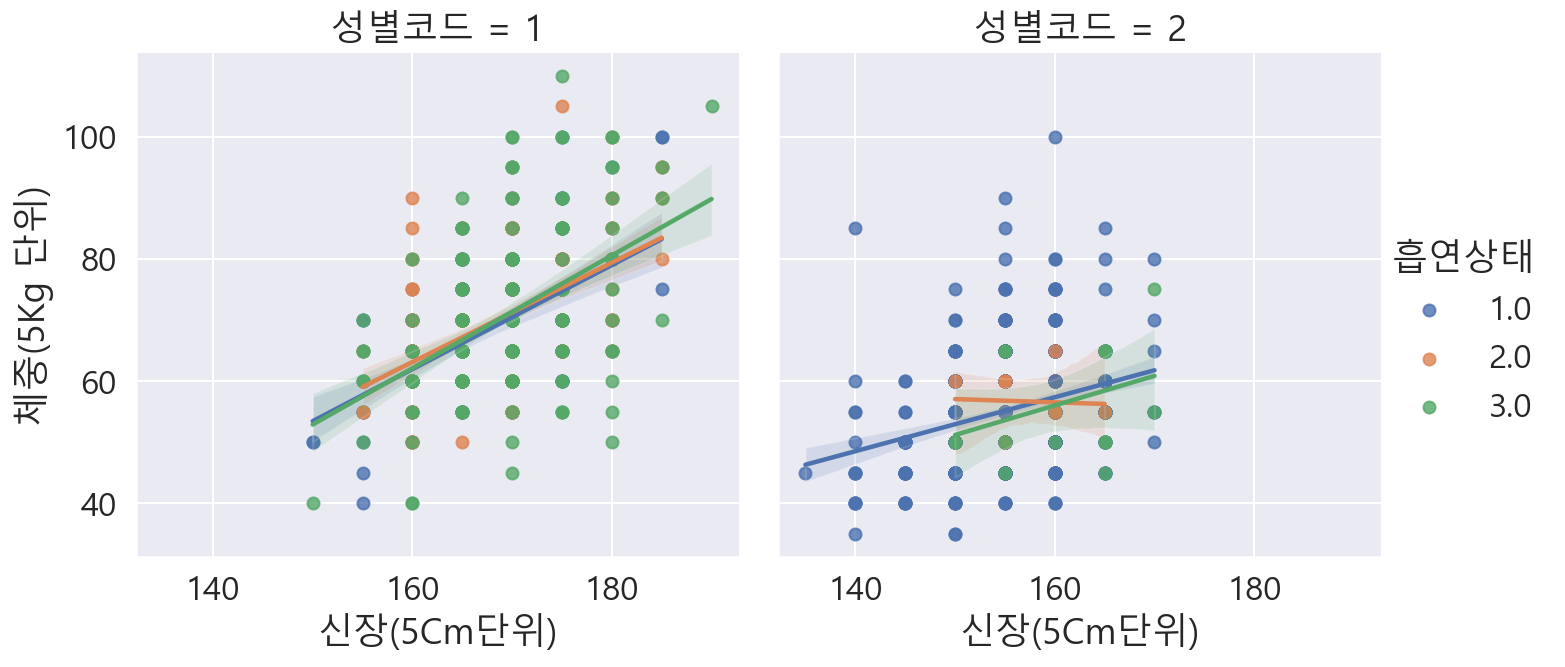

In [166]:
# hue = "흡연상태" 로 그려보기

sns.lmplot(data = df_sample, x = "신장(5Cm단위)", y = "체중(5Kg 단위)",
           hue = "흡연상태", col = "성별코드")

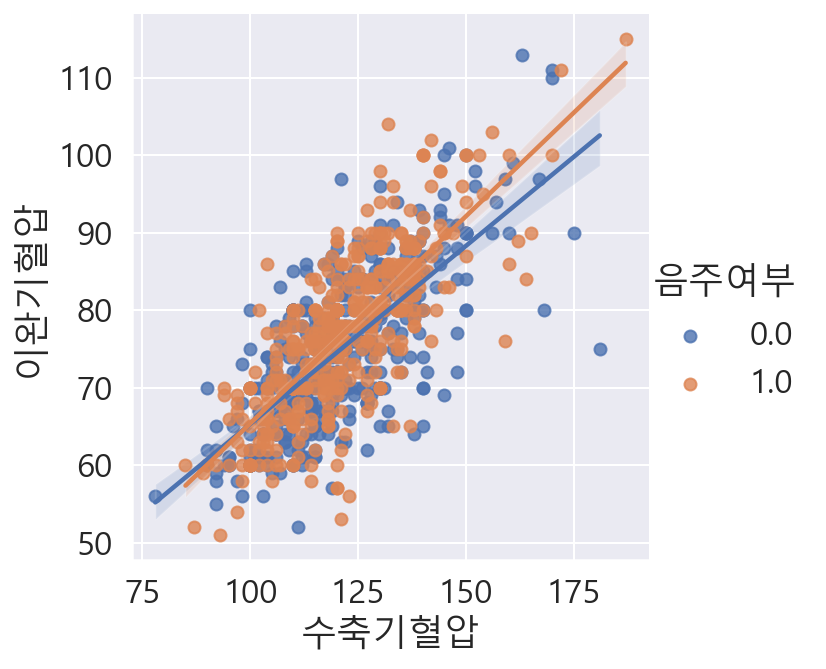

In [169]:
# lmplot으로 수축기/이완기혈압을 그리고 음주여부에 따라 다른 색상으로 표현되게 합니다.

sns.lmplot(data = df_sample, x = "수축기혈압", y = "이완기혈압",
           hue = "음주여부")

# 수축기/이완기 혈압은 음주여부에 따라서 강한 양의 상관관계를 보여준다.
# 음주하는 사람들(1)의 경우 기울기가 더 가파름(이완,수축기혈압이 높음)

`AST와 ALT`

- 출처: [http://sev.iseverance.com/dept_clinic/center/liver/treatment/view.asp?con_no=87827](http://sev.iseverance.com/dept_clinic/center/liver/treatment/view.asp?con_no=87827)


        AST와 ALT는 간세포에 들어 있는 효소입니다.
    
        간이 손상돼 간세포가 파과되면 그 안에 있던 AST와 ALT가 빠져나와 혈액 속에 섞여 돌아다니게 됩니다.
        따라서 간이 손상되면 AST와 ALT 수치가 높아집니다.
        
        정상 수치는 병원에 따라 기준치가 다소 차이가 있으나 AST가 5~35 IU/L, ALT가 5~40 IU/L 정도 입니다.
        
        간혹 전날 술을 마시거나 몸이 피곤하면 일시적으로 AST와 ALT 수치가 정상치를 웃돌 수 있으므로 
        딱 한번의 검사만으로 간질환 여부를 판단하는 경우는 드뭅니다. 
        하지만 AST와 ALT같은 간수치는 간의 상태를 일차적으로 파악하는데 아주 중요한 기준이됩니다.

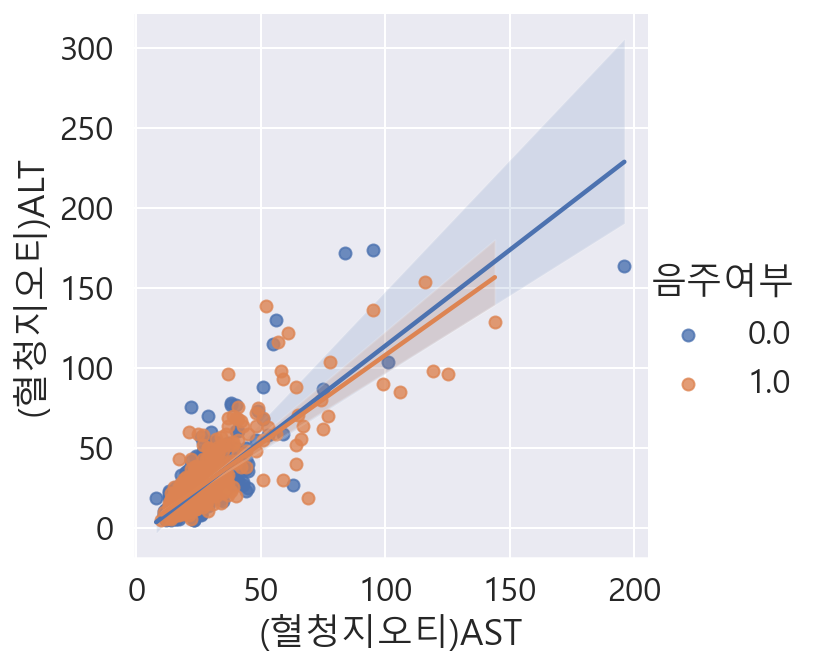

In [170]:
# lmplot 으로 "(혈청지오티)AST"  "(혈청지오티)ALT" 을 그리고 음주여부에 따라 다른 색상으로 표현되게 합니다.

sns.lmplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부")

# 그림자는 신뢰구간(ci)을 나타냄

C:\Users\YUNI\Desktop\WinPython\WPy64-39100\python-3.9.10.amd64\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


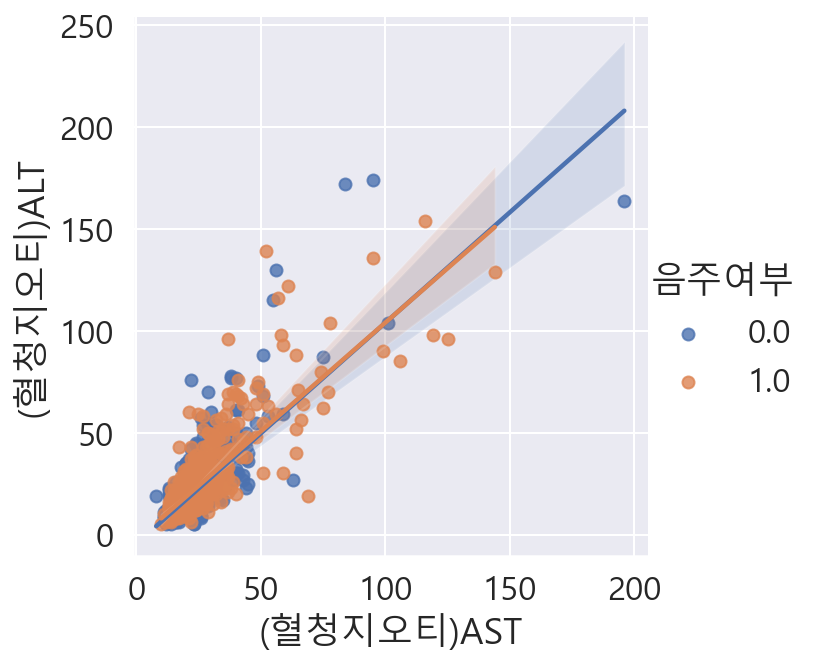

In [171]:
# robust = True 기능은 이상치의 값을 덜 영향 받을 수 있게함

sns.lmplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", robust = True)

### **15.3 Dealing with outliers**

이상치(Outlier)란, 보통 관측된 데이터의 범위에서 많이 벗어난 아주 작은 값이나 큰 값을 말한다.

- 이상치가 있으면 데이터가 자세히 보이지 않거나 이상치로 인해 회귀선이 달라지기도 합니다.
- 시각화를 통해 찾은 이상치를 제거하고 보거나 이상치만 따로 모아 보도록 합니다.


In [176]:
# "(혈청지오티)AST" 와 "(혈청지오티)ALT" 가 400이하인 값만 데이터프레임 형태로 추출해서  
# df_ASLT 라는 변수에 담습니다.

df_sample[(df_sample["(혈청지오티)AST"] < 400) & (df_sample["(혈청지오티)ALT"] < 400)]

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)   허리둘레  \
276826  2017   276827     2           12    11      155.0        85.0  113.0   
849425  2017   849426     2           15    11      155.0        45.0   73.0   
504499  2017   504500     1           11    47      170.0        45.0   63.0   
601054  2017   601055     2           16    26      150.0        50.0   77.0   
980221  2017   980222     2           13    41      150.0        65.0   95.0   
...      ...      ...   ...          ...   ...        ...         ...    ...   
890013  2017   890014     2           11    29      155.0        50.0   65.1   
875389  2017   875390     2            9    11      155.0        45.0   66.5   
358458  2017   358459     2           11    11      160.0        50.0   72.0   
808228  2017   808229     1            9    48      175.0        65.0   75.2   
317698  2017   317699     2           13    42      150.0        55.0   79.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  \
276826    0.7    1.0  ...   35.0   1.0   0.0          0      NaN    NaN   
849425    0.5    0.4  ...   19.0   1.0   0.0          1      NaN    NaN   
504499    0.7    0.4  ...   15.0   3.0   0.0          0      NaN    NaN   
601054    0.4    0.3  ...   13.0   1.0   0.0          0      NaN    NaN   
980221    1.0    0.8  ...  265.0   1.0   0.0          0      NaN    NaN   
...       ...    ...  ...    ...   ...   ...        ...      ...    ...   
890013    1.0    0.8  ...   22.0   2.0   1.0          1      NaN    NaN   
875389    0.9    0.8  ...   12.0   1.0   1.0          1      NaN    NaN   
358458    0.9    0.8  ...   11.0   1.0   0.0          0      NaN    NaN   
808228    1.2    1.2  ...  122.0   3.0   1.0          1      NaN    NaN   
317698    1.0    1.0  ...   22.0   1.0   0.0          0      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석   데이터공개일자  
276826      NaN           NaN  NaN  20181126  
849425      NaN           NaN  0.0  20181126  
504499      NaN           NaN  NaN  20181126  
601054      NaN           NaN  NaN  20181126  
980221      NaN           NaN  NaN  20181126  
...         ...           ...  ...       ...  
890013      NaN           NaN  1.0  20181126  
875389      NaN           NaN  0.0  20181126  
358458      NaN           NaN  NaN  20181126  
808228      NaN           NaN  0.0  20181126  
317698      NaN           NaN  NaN  20181126  

[1000 rows x 34 columns]

In [177]:
df_ASLT =df_sample[(df_sample["(혈청지오티)AST"] < 400) &
                   (df_sample["(혈청지오티)ALT"] < 400)]

df_ASLT

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)   허리둘레  \
276826  2017   276827     2           12    11      155.0        85.0  113.0   
849425  2017   849426     2           15    11      155.0        45.0   73.0   
504499  2017   504500     1           11    47      170.0        45.0   63.0   
601054  2017   601055     2           16    26      150.0        50.0   77.0   
980221  2017   980222     2           13    41      150.0        65.0   95.0   
...      ...      ...   ...          ...   ...        ...         ...    ...   
890013  2017   890014     2           11    29      155.0        50.0   65.1   
875389  2017   875390     2            9    11      155.0        45.0   66.5   
358458  2017   358459     2           11    11      160.0        50.0   72.0   
808228  2017   808229     1            9    48      175.0        65.0   75.2   
317698  2017   317699     2           13    42      150.0        55.0   79.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  \
276826    0.7    1.0  ...   35.0   1.0   0.0          0      NaN    NaN   
849425    0.5    0.4  ...   19.0   1.0   0.0          1      NaN    NaN   
504499    0.7    0.4  ...   15.0   3.0   0.0          0      NaN    NaN   
601054    0.4    0.3  ...   13.0   1.0   0.0          0      NaN    NaN   
980221    1.0    0.8  ...  265.0   1.0   0.0          0      NaN    NaN   
...       ...    ...  ...    ...   ...   ...        ...      ...    ...   
890013    1.0    0.8  ...   22.0   2.0   1.0          1      NaN    NaN   
875389    0.9    0.8  ...   12.0   1.0   1.0          1      NaN    NaN   
358458    0.9    0.8  ...   11.0   1.0   0.0          0      NaN    NaN   
808228    1.2    1.2  ...  122.0   3.0   1.0          1      NaN    NaN   
317698    1.0    1.0  ...   22.0   1.0   0.0          0      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석   데이터공개일자  
276826      NaN           NaN  NaN  20181126  
849425      NaN           NaN  0.0  20181126  
504499      NaN           NaN  NaN  20181126  
601054      NaN           NaN  NaN  20181126  
980221      NaN           NaN  NaN  20181126  
...         ...           ...  ...       ...  
890013      NaN           NaN  1.0  20181126  
875389      NaN           NaN  0.0  20181126  
358458      NaN           NaN  NaN  20181126  
808228      NaN           NaN  0.0  20181126  
317698      NaN           NaN  NaN  20181126  

[1000 rows x 34 columns]

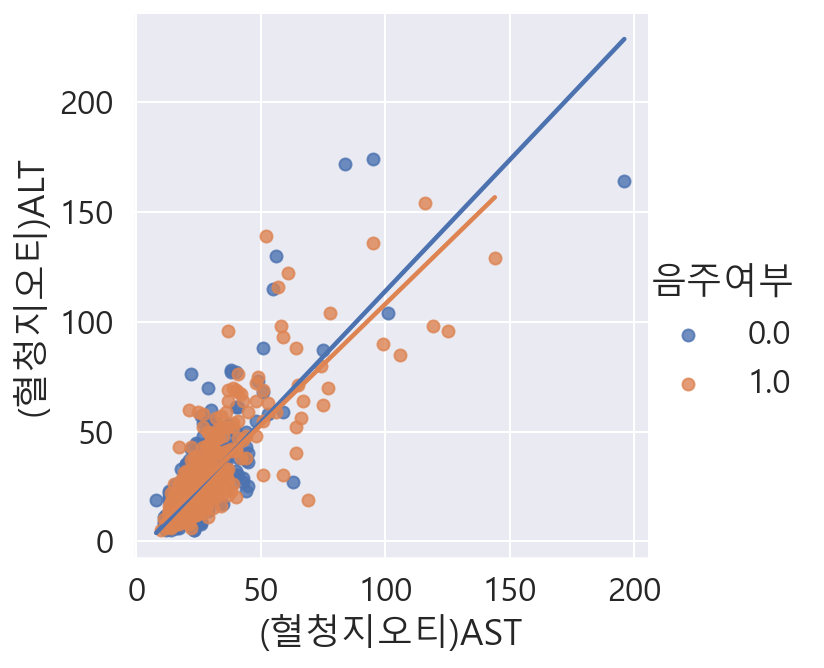

In [179]:
# 이상치를 제거한 "(혈청지오티)AST" 와 "(혈청지오티)ALT" 를 lmplot으로 그리며
# 음주여부에 따라 다른 색으로 표현합니다.

sns.lmplot(data=df_ASLT, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", ci=None)

In [180]:
# "(혈청지오티)AST" 와 "(혈청지오티)ALT" 가 400 이상인 값만 데이터프레임 형태로 추출해서
# df_ASLT_high 라는 변수에 담습니다.

df_ASLT_high = df_sample[(df_sample["(혈청지오티)AST"] > 400) &
                         (df_sample["(혈청지오티)ALT"] > 400)]

In [181]:
# 위에서 구한 df_ASLT_high 데이터프레임에 담겨진 혈청지오티가 높은 데이터만 따로 봅니다.

df_ASLT_high

# df_sample에서 400 이상인 값은 없어서 나타나지 않음

Empty DataFrame
Columns: [기준년도, 가입자일련번호, 성별코드, 연령대코드(5세단위), 시도코드, 신장(5Cm단위), 체중(5Kg 단위), 허리둘레, 시력(좌), 시력(우), 청력(좌), 청력(우), 수축기혈압, 이완기혈압, 식전혈당(공복혈당), 총콜레스테롤, 트리글리세라이드, HDL콜레스테롤, LDL콜레스테롤, 혈색소, 요단백, 혈청크레아티닌, (혈청지오티)AST, (혈청지오티)ALT, 감마지티피, 흡연상태, 음주여부, 구강검진 수검여부, 치아우식증유무, 결손치유무, 치아마모증유무, 제3대구치(사랑니)이상, 치석, 데이터공개일자]
Index: []

[0 rows x 34 columns]

In [184]:
# df_sample에는 나오지 않으므로 전체 데이터(df)를 살펴봄
# "(혈청지오티)AST" 또는(|) "(혈청지오티)ALT" 가 400 이상인 값만 데이터프레임 형태로 추출해서
# df_ASLT_high 라는 변수에 담습니다.

df_ASLT_high = df[(df["(혈청지오티)AST"] > 400) | (df["(혈청지오티)ALT"] > 400)]
df_ASLT_high 

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)   허리둘레  \
2771    2017     2772     1            8    44      170.0        65.0   82.2   
5047    2017     5048     1            7    31      170.0        60.0   77.0   
10803   2017    10804     1           10    46      170.0        75.0   83.1   
14948   2017    14949     1            5    47      180.0       130.0  110.0   
16433   2017    16434     2           12    44      160.0        65.0   86.0   
...      ...      ...   ...          ...   ...        ...         ...    ...   
990160  2017   990161     1           13    11      170.0        70.0   85.0   
990909  2017   990910     1            9    48      165.0        80.0   95.0   
991596  2017   991597     2           16    48      150.0        40.0   67.0   
996864  2017   996865     2            7    44      155.0        45.0   69.0   
997022  2017   997023     1           12    41      180.0        90.0   96.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  \
2771      1.0    0.9  ...  280.0   3.0   1.0          0      NaN    NaN   
5047      1.5    1.5  ...   33.0   1.0   1.0          1      NaN    NaN   
10803     0.7    1.0  ...  228.0   3.0   1.0          1      NaN    NaN   
14948     1.2    1.5  ...  115.0   1.0   0.0          0      NaN    NaN   
16433     1.0    1.0  ...  672.0   1.0   0.0          0      NaN    NaN   
...       ...    ...  ...    ...   ...   ...        ...      ...    ...   
990160    0.8    0.8  ...  626.0   2.0   0.0          0      NaN    NaN   
990909    1.5    1.5  ...   34.0   3.0   0.0          0      NaN    NaN   
991596    0.7    0.6  ...   39.0   1.0   0.0          0      NaN    NaN   
996864    1.2    1.5  ...  490.0   1.0   0.0          0      NaN    NaN   
997022    1.2    1.0  ...  500.0   3.0   1.0          1      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석   데이터공개일자  
2771        NaN           NaN  NaN  20181126  
5047        NaN           NaN  0.0  20181126  
10803       NaN           NaN  0.0  20181126  
14948       NaN           NaN  NaN  20181126  
16433       NaN           NaN  NaN  20181126  
...         ...           ...  ...       ...  
990160      NaN           NaN  NaN  20181126  
990909      NaN           NaN  NaN  20181126  
991596      NaN           NaN  NaN  20181126  
996864      NaN           NaN  NaN  20181126  
997022      NaN           NaN  1.0  20181126  

[394 rows x 34 columns]

In [185]:
# "(혈청지오티)AST" 와(&) "(혈청지오티)ALT" 가 400 이상인 값만 데이터프레임 형태로 추출해서
# df_ASLT_high_and 라는 변수에 담습니다.

df_ASLT_high_and = df[(df["(혈청지오티)AST"] > 400) & (df["(혈청지오티)ALT"] > 400)]
df_ASLT_high_and 

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  \
2771    2017     2772     1            8    44      170.0        65.0  82.2   
5047    2017     5048     1            7    31      170.0        60.0  77.0   
16433   2017    16434     2           12    44      160.0        65.0  86.0   
22868   2017    22869     1           11    48      165.0        60.0  84.0   
28956   2017    28957     1           14    11      160.0        70.0  95.0   
...      ...      ...   ...          ...   ...        ...         ...   ...   
958204  2017   958205     2            5    41      155.0        50.0  60.0   
968788  2017   968789     1           11    48      165.0        65.0  76.0   
984083  2017   984084     2           10    42      155.0        55.0  68.0   
990160  2017   990161     1           13    11      170.0        70.0  85.0   
991596  2017   991597     2           16    48      150.0        40.0  67.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  \
2771      1.0    0.9  ...  280.0   3.0   1.0          0      NaN    NaN   
5047      1.5    1.5  ...   33.0   1.0   1.0          1      NaN    NaN   
16433     1.0    1.0  ...  672.0   1.0   0.0          0      NaN    NaN   
22868     0.9    0.8  ...  464.0   2.0   1.0          0      NaN    NaN   
28956     0.1    0.2  ...  297.0   1.0   0.0          0      NaN    NaN   
...       ...    ...  ...    ...   ...   ...        ...      ...    ...   
958204    0.9    0.8  ...  132.0   1.0   1.0          0      NaN    NaN   
968788    0.8    0.6  ...  326.0   1.0   0.0          0      NaN    NaN   
984083    0.9    1.2  ...  212.0   1.0   0.0          1      NaN    NaN   
990160    0.8    0.8  ...  626.0   2.0   0.0          0      NaN    NaN   
991596    0.7    0.6  ...   39.0   1.0   0.0          0      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석   데이터공개일자  
2771        NaN           NaN  NaN  20181126  
5047        NaN           NaN  0.0  20181126  
16433       NaN           NaN  NaN  20181126  
22868       NaN           NaN  NaN  20181126  
28956       NaN           NaN  NaN  20181126  
...         ...           ...  ...       ...  
958204      NaN           NaN  NaN  20181126  
968788      NaN           NaN  NaN  20181126  
984083      NaN           NaN  0.0  20181126  
990160      NaN           NaN  NaN  20181126  
991596      NaN           NaN  NaN  20181126  

[133 rows x 34 columns]

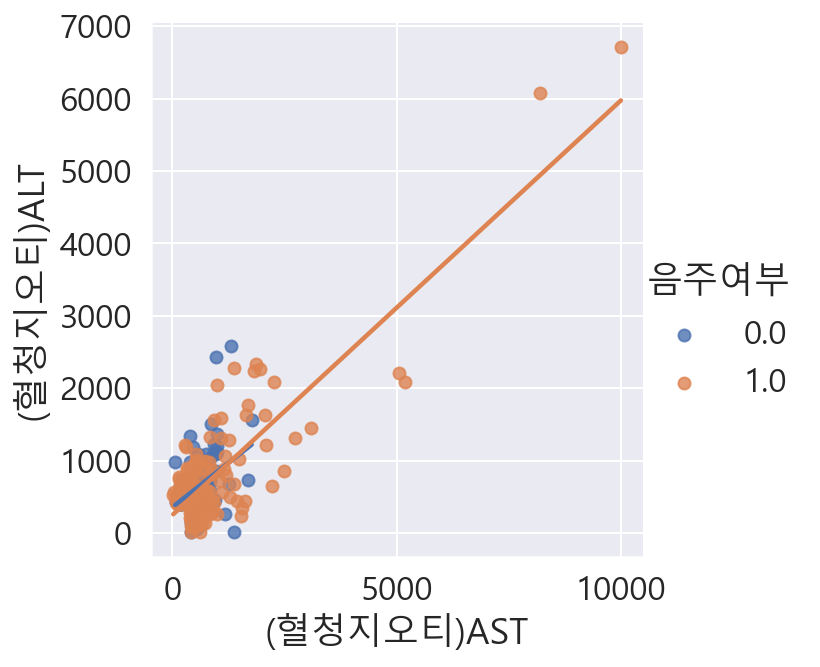

In [186]:
# df_ASLT_high(또는) 와 df_ASLT_and 를 그래프로 그려봄

sns.lmplot(data=df_ASLT_high, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", ci=None)

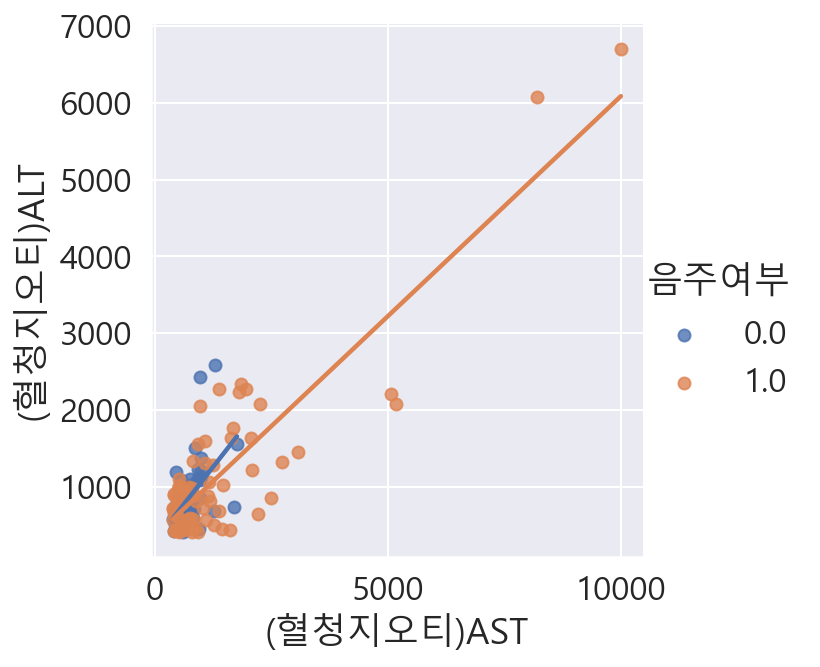

In [187]:
sns.lmplot(data=df_ASLT_high_and, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", ci=None)

In [192]:
# "(혈청지오티)AST"가 8000 이상인 값만 살펴보기

df_ASLT_high_8000 = df_ASLT_high[df_ASLT_high["(혈청지오티)AST"] > 8000]
df_ASLT_high_8000

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  \
677177  2017   677178     1           17    41      155.0        55.0  81.0   
887237  2017   887238     1            5    41      160.0        55.0  71.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  \
677177    0.2    0.9  ...  888.0   1.0   1.0          0      NaN    NaN   
887237    1.2    1.0  ...  379.0   3.0   1.0          0      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상  치석   데이터공개일자  
677177      NaN           NaN NaN  20181126  
887237      NaN           NaN NaN  20181126  

[2 rows x 34 columns]

In [195]:
# 위의 값에서 10열에서 27열까지의 결과를 본다.

df_ASLT_high_8000.iloc[:, 10:27]

# 이상치가 있는지 확인 할 수 있음

청력(좌)  청력(우)  수축기혈압  이완기혈압  식전혈당(공복혈당)  총콜레스테롤  트리글리세라이드  HDL콜레스테롤  \
677177    2.0    2.0  100.0   60.0       107.0   129.0     152.0      30.0   
887237    1.0    1.0   97.0   71.0        86.0   158.0     111.0     100.0   

        LDL콜레스테롤   혈색소  요단백  혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT  감마지티피  흡연상태  \
677177      69.0  13.0  1.0      1.2      8200.0      6080.0  888.0   1.0   
887237      35.0  17.8  3.0      0.8      9999.0      6710.0  379.0   3.0   

        음주여부  
677177   1.0  
887237   1.0

***

In [ ]:
# 4.11강 (18:13 ) 수치형 데이터의 분포를 표현하기 - distplot

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
# 한글폰트를 설정해 주지 않으면 그래프 상에서 한글이 깨져보입니다.
# 한글이 출력될 수 있도록 폰트 설정을 해줍니다.
# 운영체제별 설정을 위해 로드 합니다.
import os

# 윈도우, 맥 이외 OS는 별도로 설정해 주세요.
print(os.name)

if os.name == 'nt':
    plt.rc('font', family='Malgun Gothic') # window 용
else:
    plt.rc('font', family='AppleGothic') # Mac 용
    
# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc("axes", unicode_minus =False)

nt


In [13]:
df= pd.read_csv("datadori/4.2.2 NHIS_OPEN_GJ_2017.csv", encoding = "cp949")

df.shape

(1000000, 34)

In [14]:
df_sample = df.sample(1000, random_state =1)
df_sample.shape

(1000, 34)

In [15]:
sns.set(font_scale = 1.5, font = "Malgun Gothic")

In [16]:
df_ASLT =df_sample[(df_sample["(혈청지오티)AST"] < 400) &
                   (df_sample["(혈청지오티)ALT"] < 400)]

df_ASLT_high = df[(df["(혈청지오티)AST"] > 400) |
                  (df["(혈청지오티)ALT"] > 400)]

df_ASLT_high_and = df[(df["(혈청지오티)AST"] > 400) &
                      (df["(혈청지오티)ALT"] > 400)]



### distplot 없어질 예정이람
[https://www.boostcourse.org/ds112/lecture/60084?isDesc=false](https://www.boostcourse.org/ds112/lecture/60084?isDesc=false)

### distplot 대신 histplot 쓰세용

### **15.4 distplot**

- [히스토그램 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%ED%9E%88%EC%8A%A4%ED%86%A0%EA%B7%B8%EB%9E%A8)
- [확률 밀도 함수 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%ED%99%95%EB%A5%A0_%EB%B0%80%EB%8F%84_%ED%95%A8%EC%88%98)


In [17]:
# 수치형 데이터로 된 컬럼을 찾기 위해 컬럼명만 따로 출력합니다.

df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

In [23]:
# notnull() 기능으로 결측치가 아닌 값만 가져옴

df_chol = df.loc[df["총콜레스테롤"].notnull(), "총콜레스테롤"]
df_chol.head()

0    178.0
1    255.0
2    211.0
3    160.0
4    253.0
Name: 총콜레스테롤, dtype: float64

In [30]:
df_chol.describe()

count    999957.000000
mean        195.515105
std          38.937646
min          10.000000
25%         169.000000
50%         193.000000
75%         219.000000
max        2245.000000
Name: 총콜레스테롤, dtype: float64

C:\Users\YUNI\Desktop\WinPython\WPy64-39100\python-3.9.10.amd64\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='총콜레스테롤', ylabel='Density'>

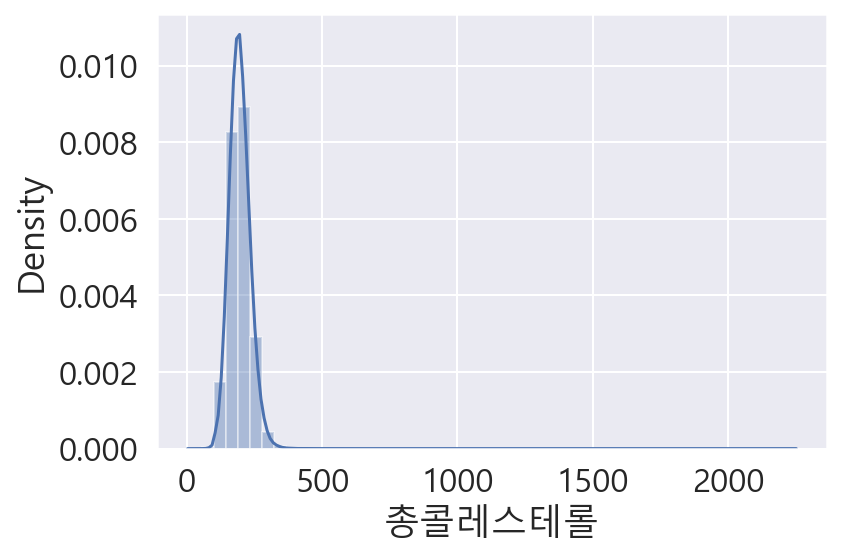

In [25]:
# "총콜레스테롤"에 따른 displot 을 그립니다.

sns.distplot(df_chol)

<AxesSubplot:xlabel='총콜레스테롤', ylabel='Count'>

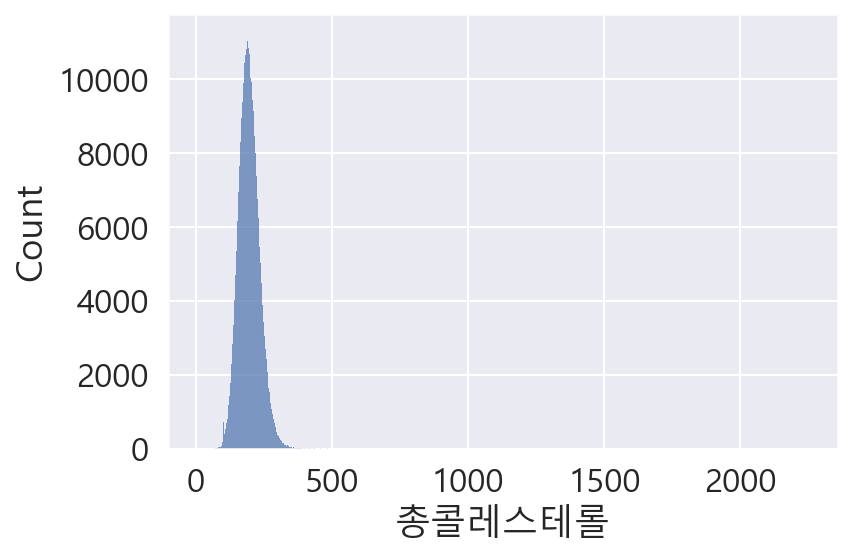

In [27]:
sns.histplot(df_chol)

<AxesSubplot:xlabel='총콜레스테롤', ylabel='Count'>

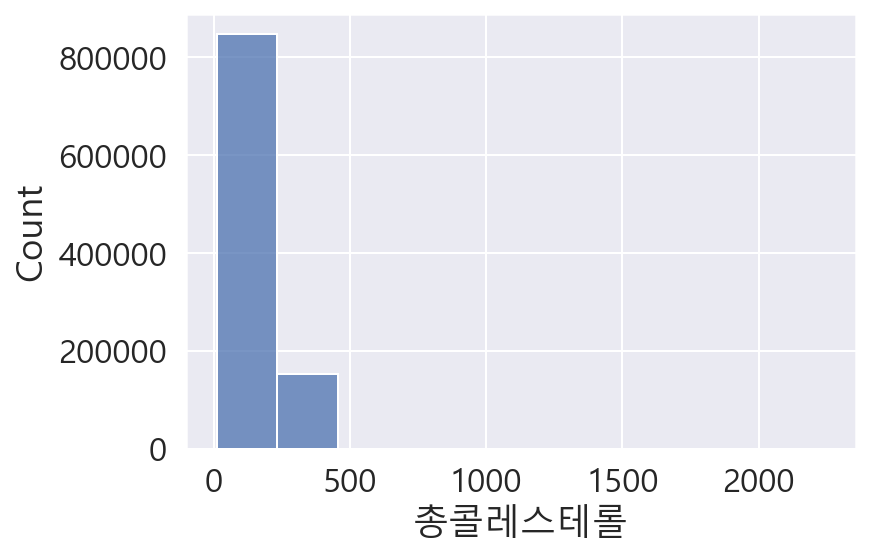

In [29]:
sns.histplot(df_chol, bins = 10)

In [31]:
# 음주여부가 1인 값에 대한 "총콜레스테롤"을 displot 으로 그립니다.

df_chol

0         178.0
1         255.0
2         211.0
3         160.0
4         253.0
          ...  
999995    196.0
999996    199.0
999997    240.0
999998    267.0
999999    172.0
Name: 총콜레스테롤, Length: 999957, dtype: float64

In [ ]:
# 음주여부가 0인 값에 대한 "총콜레스테롤"을 displot 으로 그립니다.



<AxesSubplot:xlabel='총콜레스테롤', ylabel='Density'>

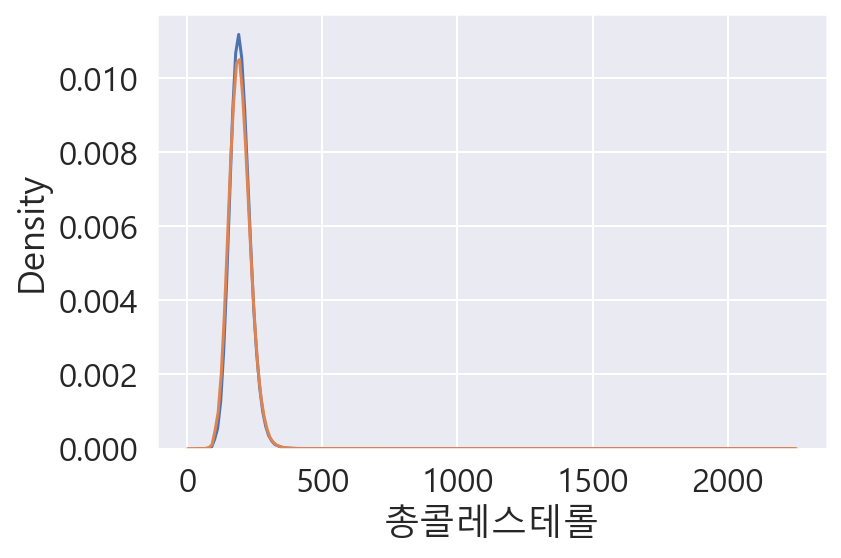

In [35]:
# 음주여부 값에 대한 "총콜레스테롤"을 displot 으로 그리며, 하나의 그래프에 표시되도록 합니다.

sns.kdeplot(df.loc
            [df["총콜레스테롤"].notnull() & (df["음주여부"] == 1),
                   "총콜레스테롤"], label = "음주 중")
sns.kdeplot(df.loc
            [df["총콜레스테롤"].notnull() & (df["음주여부"] == 0),
                   "총콜레스테롤"], label = "비음주중")

# kdeplot 은 히스토그램이 생략된 곡선만 나타남

<AxesSubplot:xlabel='총콜레스테롤', ylabel='Density'>

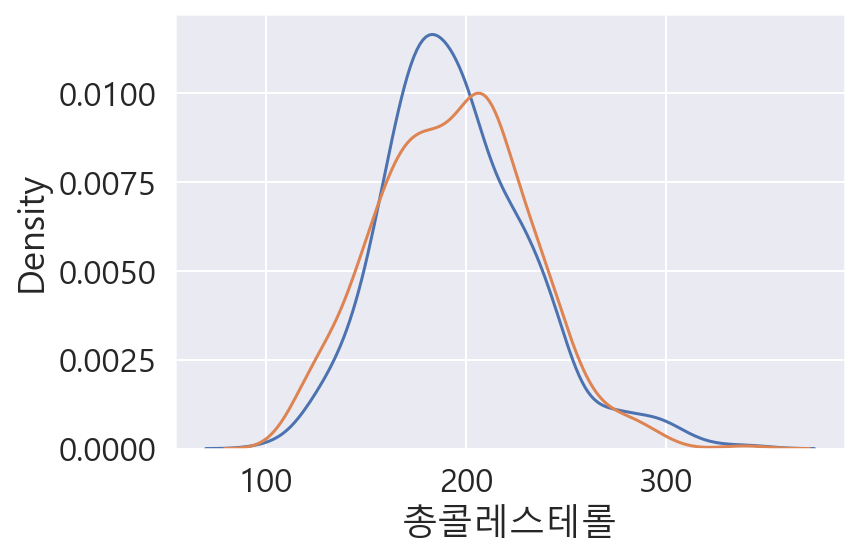

In [36]:
# df_sample (1000개의 샘플)의 결과도 살펴봄

sns.kdeplot(df_sample.loc
            [df_sample["총콜레스테롤"].notnull() & (df["음주여부"] == 1),
                   "총콜레스테롤"], label = "음주 중")
sns.kdeplot(df_sample.loc
            [df_sample["총콜레스테롤"].notnull() & (df["음주여부"] == 0),
                   "총콜레스테롤"], label = "비음주중")

<AxesSubplot:xlabel='총콜레스테롤', ylabel='Density'>

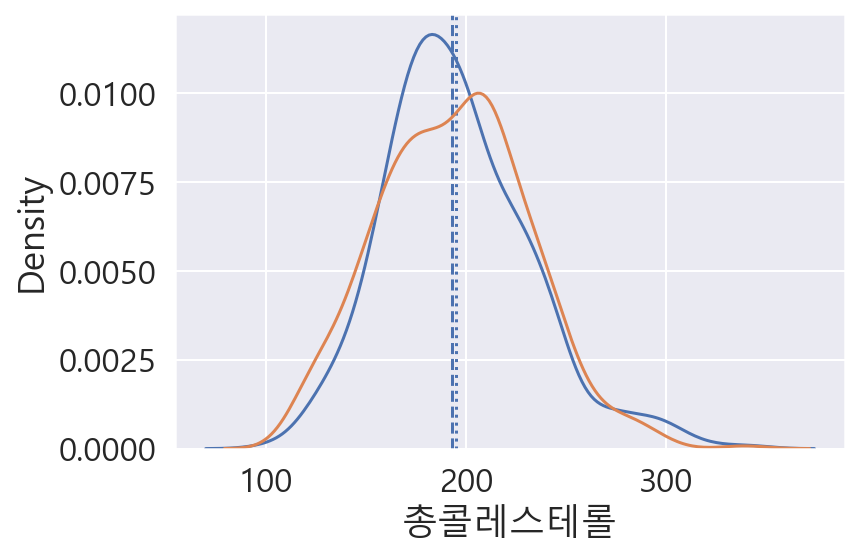

In [38]:
# plt.axvline 으로 평균값과 중앙값(수직선)도 살펴본다

plt.axvline(df_sample["총콜레스테롤"].mean(), linestyle=":")
plt.axvline(df_sample["총콜레스테롤"].median(), linestyle="--")

sns.kdeplot(df_sample.loc
            [df_sample["총콜레스테롤"].notnull() & (df["음주여부"] == 1),
                   "총콜레스테롤"], label = "음주 중")
sns.kdeplot(df_sample.loc
            [df_sample["총콜레스테롤"].notnull() & (df["음주여부"] == 0),
                   "총콜레스테롤"], label = "비음주중")

In [40]:
# 감마지티피 값에 따라 음주여부를 시각화 합니다.

df_sample.loc[df_sample["음주여부"] == 1, "감마지티피"]
df_sample.loc[df_sample["음주여부"] == 0, "감마지티피"]

276826     35.0
849425     19.0
504499     15.0
601054     13.0
980221    265.0
          ...  
671388     49.0
835467     35.0
62192      46.0
358458     11.0
317698     22.0
Name: 감마지티피, Length: 487, dtype: float64

<AxesSubplot:xlabel='감마지티피', ylabel='Density'>

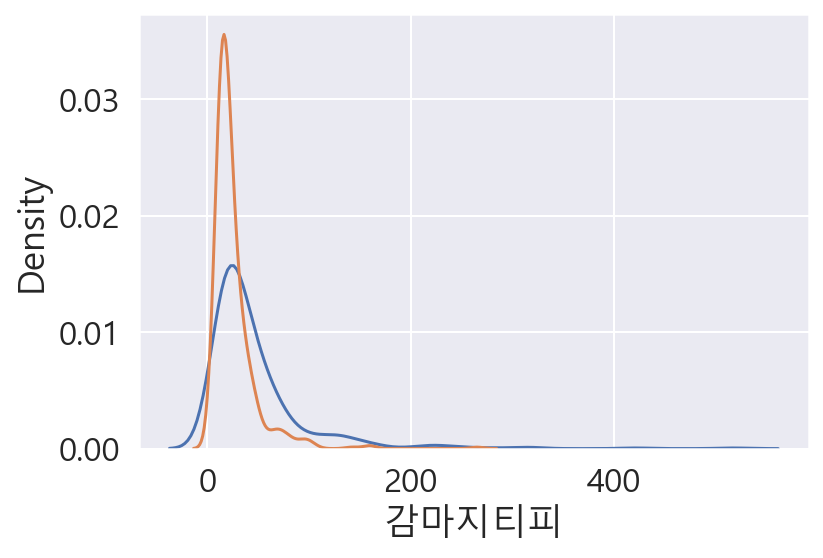

In [45]:
s_1 = df_sample.loc[df_sample["음주여부"] ==1, "감마지티피"]
s_0 = df_sample.loc[df_sample["음주여부"] ==0, "감마지티피"]

sns.kdeplot(s_1, label ="음주중")
sns.kdeplot(s_0, label ="비음주중")

***

In [ ]:
# 4.12강 ( 21:50) 상관계수 - heatmap 으로 표현하기

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os

# 윈도우, 맥 이외 OS는 별도로 설정해 주세요.
print(os.name)

if os.name == 'nt':
    plt.rc('font', family='Malgun Gothic') # window 용
else:
    plt.rc('font', family='AppleGothic') # Mac 용
    
# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc("axes", unicode_minus =False)

nt


In [6]:
df= pd.read_csv("datadori/4.2.2 NHIS_OPEN_GJ_2017.csv", encoding = "cp949")
df_sample = df.sample(1000, random_state =1)
sns.set(font_scale = 1.5, font = "Malgun Gothic")

### **16. correlation analysis**

상관 분석

- [상관 분석 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D)
- [Correlation - Wikipedia](https://en.wikipedia.org/wiki/Correlation)

일반적으로

**r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,<br>
r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,<br>
r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,<br>
r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,<br>
r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,<br>
r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,<br>
r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계<br>**

로 해석한다.

In [12]:
# 상관계수에 사용할 컬럼을 변수에 담습니다.

columns = ['연령대코드(5세단위)','체중(5Kg 단위)','신장(5Cm단위)','허리둘레','시력(좌)',
           '시력(우)','청력(좌)','청력(우)','수축기혈압','이완기혈압','식전혈당(공복혈당)',
           '총콜레스테롤','트리글리세라이드','HDL콜레스테롤','LDL콜레스테롤','혈색소',
           '요단백','혈청크레아티닌','(혈청지오티)ALT','(혈청지오티)AST','감마지티피',
           '흡연상태','음주여부'] 

columns

['연령대코드(5세단위)',
 '체중(5Kg 단위)',
 '신장(5Cm단위)',
 '허리둘레',
 '시력(좌)',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '수축기혈압',
 '이완기혈압',
 '식전혈당(공복혈당)',
 '총콜레스테롤',
 '트리글리세라이드',
 'HDL콜레스테롤',
 'LDL콜레스테롤',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 '(혈청지오티)ALT',
 '(혈청지오티)AST',
 '감마지티피',
 '흡연상태',
 '음주여부']

#### **16.1 How to find the Correlation Coefficient**

상관계수 구하기

In [19]:
# 샘플컬럼만 가져와서 df_small 이라는 데이터프레인에 담은 뒤 상관계수를 구합니다.
# corr()로 상관계수를 구할 수 있음

df_small = df_sample[columns]
df_corr = df_small.corr()
df_corr

# 자기 자신과의 상관계수 값은 1.00000 이 됨

연령대코드(5세단위)  체중(5Kg 단위)  신장(5Cm단위)      허리둘레     시력(좌)     시력(우)  \
연령대코드(5세단위)     1.000000   -0.210610  -0.397412  0.134720 -0.201947 -0.203802   
체중(5Kg 단위)     -0.210610    1.000000   0.648489  0.790520  0.076534  0.133502   
신장(5Cm단위)      -0.397412    0.648489   1.000000  0.293774  0.141800  0.156605   
허리둘레            0.134720    0.790520   0.293774  1.000000 -0.033007  0.034518   
시력(좌)          -0.201947    0.076534   0.141800 -0.033007  1.000000  0.462877   
시력(우)          -0.203802    0.133502   0.156605  0.034518  0.462877  1.000000   
청력(좌)           0.193769   -0.038100  -0.100178  0.048379 -0.049368 -0.041439   
청력(우)           0.253585   -0.070590  -0.121083  0.052245 -0.084603 -0.096255   
수축기혈압           0.296807    0.244673   0.030012  0.333025 -0.010112 -0.020638   
이완기혈압           0.149758    0.287084   0.118103  0.302398 -0.001695  0.012802   
식전혈당(공복혈당)      0.166079    0.155556   0.059881  0.219585 -0.075272  0.006790   
총콜레스테롤          0.005873    0.082305  -0.013813  0.081332  0.005267  0.038706   
트리글리세라이드        0.033434    0.238945   0.113687  0.288572  0.029648  0.018477   
HDL콜레스테롤       -0.121635   -0.357603  -0.152505 -0.409940  0.021295 -0.030666   
LDL콜레스테롤        0.023206    0.106049  -0.003485  0.098301 -0.015221  0.044949   
혈색소            -0.165788    0.508366   0.529475  0.377023  0.073866  0.056753   
요단백            -0.022885    0.028840   0.014089 -0.002252  0.010995  0.009548   
혈청크레아티닌         0.020587    0.190769   0.243101  0.149351  0.018104  0.031835   
(혈청지오티)ALT     -0.014101    0.372930   0.187945  0.357288  0.029429  0.083163   
(혈청지오티)AST      0.106376    0.196722   0.035321  0.229202  0.003379  0.024706   
감마지티피           0.052946    0.254150   0.171372  0.271566  0.011519  0.045560   
흡연상태           -0.136350    0.397230   0.505945  0.268685  0.063964  0.054681   
음주여부           -0.277149    0.235974   0.362905  0.084514  0.073696  0.063220   

                청력(좌)     청력(우)     수축기혈압     이완기혈압  ...  HDL콜레스테롤  LDL콜레스테롤  \
연령대코드(5세단위)  0.193769  0.253585  0.296807  0.149758  ... -0.121635  0.023206   
체중(5Kg 단위)  -0.038100 -0.070590  0.244673  0.287084  ... -0.357603  0.106049   
신장(5Cm단위)   -0.100178 -0.121083  0.030012  0.118103  ... -0.152505 -0.003485   
허리둘레         0.048379  0.052245  0.333025  0.302398  ... -0.409940  0.098301   
시력(좌)       -0.049368 -0.084603 -0.010112 -0.001695  ...  0.021295 -0.015221   
시력(우)       -0.041439 -0.096255 -0.020638  0.012802  ... -0.030666  0.044949   
청력(좌)        1.000000  0.512849  0.105602  0.034535  ... -0.015340 -0.018551   
청력(우)        0.512849  1.000000  0.127883  0.041907  ... -0.078820 -0.059298   
수축기혈압        0.105602  0.127883  1.000000  0.744132  ... -0.138843  0.003982   
이완기혈압        0.034535  0.041907  0.744132  1.000000  ... -0.090783  0.045014   
식전혈당(공복혈당)  -0.000567  0.035457  0.168399  0.134820  ... -0.136568 -0.038186   
총콜레스테롤      -0.034960 -0.095937  0.047920  0.097394  ...  0.137891  0.880425   
트리글리세라이드    -0.029229 -0.027957  0.187875  0.166679  ... -0.383788  0.011516   
HDL콜레스테롤    -0.015340 -0.078820 -0.138843 -0.090783  ...  1.000000 -0.062431   
LDL콜레스테롤    -0.018551 -0.059298  0.003982  0.045014  ... -0.062431  1.000000   
혈색소         -0.015990 -0.031084  0.143038  0.219912  ... -0.208488  0.112034   
요단백         -0.026771 -0.013656  0.016896  0.021567  ... -0.005009 -0.004715   
혈청크레아티닌     -0.026352 -0.030057  0.090268  0.131162  ... -0.142140  0.037578   
(혈청지오티)ALT   0.003031 -0.023672  0.118240  0.154490  ... -0.179211  0.075795   
(혈청지오티)AST   0.014587  0.002233  0.143089  0.159043  ... -0.031833  0.011017   
감마지티피       -0.006351  0.005842  0.176208  0.204673  ... -0.121648  0.046815   
흡연상태        -0.034204 -0.040937  0.108511  0.144251  ... -0.188906 -0.011593   
음주여부        -0.037669 -0.032475  0.032543  0.110143  ...  0.052452 -0.046947   

                  혈색소       요단백   혈청크레아티닌  (혈청지오티)ALT  (혈청지오티)AST     감마지티피  \
연령대코드(5세단위) -0.165788 -0.022885  0.020587   -0.014101    0.106376  0

In [22]:
# 키에 대한 상관계수가 특정 수치 이상인 데이터를 봅니다.

df_corr["신장(5Cm단위)"].sort_values()

# sort_values()로 상관계수를 볼 수 있다.

연령대코드(5세단위)   -0.397412
HDL콜레스테롤      -0.152505
청력(우)         -0.121083
청력(좌)         -0.100178
총콜레스테롤        -0.013813
LDL콜레스테롤      -0.003485
요단백            0.014089
수축기혈압          0.030012
(혈청지오티)AST     0.035321
식전혈당(공복혈당)     0.059881
트리글리세라이드       0.113687
이완기혈압          0.118103
시력(좌)          0.141800
시력(우)          0.156605
감마지티피          0.171372
(혈청지오티)ALT     0.187945
혈청크레아티닌        0.243101
허리둘레           0.293774
음주여부           0.362905
흡연상태           0.505945
혈색소            0.529475
체중(5Kg 단위)     0.648489
신장(5Cm단위)      1.000000
Name: 신장(5Cm단위), dtype: float64

In [24]:
# 상관계수가 특정수치(0.3) 이상인 경우만 보면,

df_corr.loc[df_corr["신장(5Cm단위)"] > 0.3, "신장(5Cm단위)"]

# 결과에 허리둘레는 나오지 않음

체중(5Kg 단위)    0.648489
신장(5Cm단위)     1.000000
혈색소           0.529475
흡연상태          0.505945
음주여부          0.362905
Name: 신장(5Cm단위), dtype: float64

In [26]:
# 상관계수가 특정수치(0.1) 이상인 경우만 보면,

df_corr.loc[df_corr["신장(5Cm단위)"] > 0.1, "신장(5Cm단위)"]

# 허리둘레와의 상관계수가 0.293 정도 나옴

체중(5Kg 단위)    0.648489
신장(5Cm단위)     1.000000
허리둘레          0.293774
시력(좌)         0.141800
시력(우)         0.156605
이완기혈압         0.118103
트리글리세라이드      0.113687
혈색소           0.529475
혈청크레아티닌       0.243101
(혈청지오티)ALT    0.187945
감마지티피         0.171372
흡연상태          0.505945
음주여부          0.362905
Name: 신장(5Cm단위), dtype: float64

In [29]:
# 음주여부에 대한 상관계수가 특정 수치 이상인 데이터를 봅니다.

df_corr["음주여부"].sort_values()

# 음주여부와 관련된 상관계수들은 볼 수 있다.

연령대코드(5세단위)   -0.277149
LDL콜레스테롤      -0.046947
청력(좌)         -0.037669
청력(우)         -0.032475
요단백           -0.012932
총콜레스테롤         0.019892
수축기혈압          0.032543
HDL콜레스테롤       0.052452
시력(우)          0.063220
혈청크레아티닌        0.072320
시력(좌)          0.073696
허리둘레           0.084514
식전혈당(공복혈당)     0.086991
(혈청지오티)AST     0.088594
(혈청지오티)ALT     0.095971
트리글리세라이드       0.103018
이완기혈압          0.110143
체중(5Kg 단위)     0.235974
감마지티피          0.250011
혈색소            0.291863
신장(5Cm단위)      0.362905
흡연상태           0.365642
음주여부           1.000000
Name: 음주여부, dtype: float64

In [33]:
# 위의 결과에서..
# 양의 상관관계를 가지고 있는 것들은 혈색소, 신장, 흡연상태 등이 있는 것을 볼 수 있다.
# 위키문서를 살펴보면 
# 0.1 ~ 0.3 : 약한 양적 선형관계
# 0.3 ~ 0.7 : 뚜렷한 양적 선형관계
# 0.7 ~ 1.0 : 강한 양적 선형관계

In [34]:
# 상관계수가 특정수치(0.25) 이상인 경우(양적 선형관계)만 보면,

df_corr.loc[df_corr["음주여부"] > 0.25, "음주여부"]

신장(5Cm단위)    0.362905
혈색소          0.291863
감마지티피        0.250011
흡연상태         0.365642
음주여부         1.000000
Name: 음주여부, dtype: float64

In [38]:
# 혈색소에 대한 상관계수가 특정 수치 이상인 데이터를 봅니다.

df_corr["혈색소"].sort_values(ascending = False).head(7)

# 혈색소와 상관관계가 높은 순으로 7개가 출력됨

혈색소           1.000000
신장(5Cm단위)     0.529475
체중(5Kg 단위)    0.508366
흡연상태          0.460010
허리둘레          0.377023
(혈청지오티)ALT    0.294575
음주여부          0.291863
Name: 혈색소, dtype: float64

In [40]:
# 감마지티피에 대한 상관계수가 특정 수치 이상인 데이터를 봅니다.

df_corr["감마지티피"].sort_values(ascending = False).head(7)

감마지티피         1.000000
(혈청지오티)AST    0.525509
(혈청지오티)ALT    0.514197
트리글리세라이드      0.335514
흡연상태          0.305811
식전혈당(공복혈당)    0.292087
허리둘레          0.271566
Name: 감마지티피, dtype: float64

#### **16.2 heatmap**

- [Plotting a diagonal correlation matrix - seaborn documentation](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)

<AxesSubplot:>

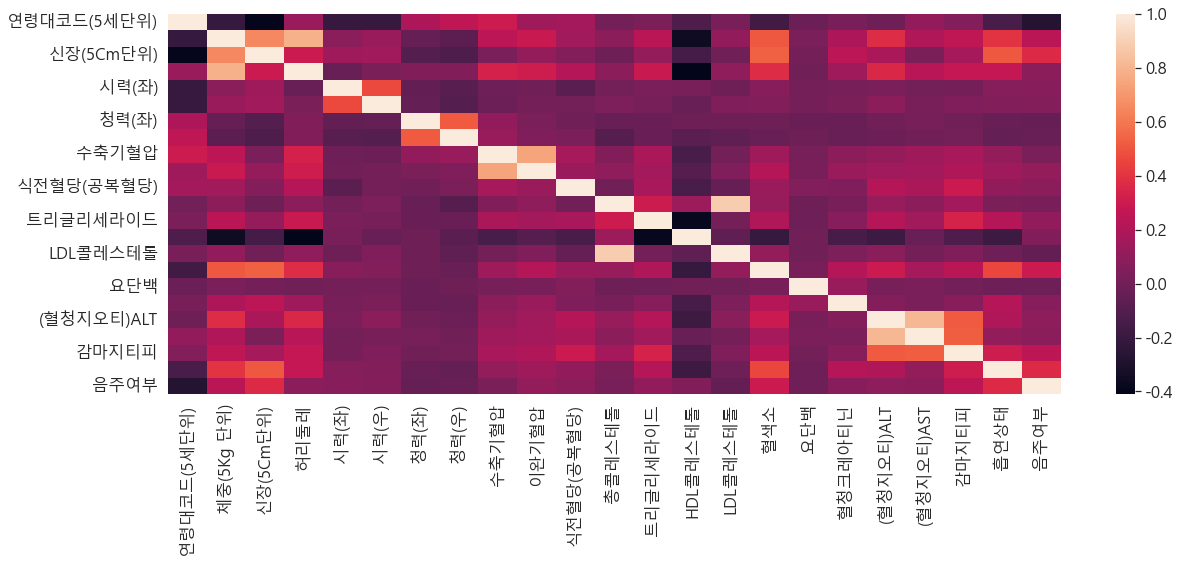

In [49]:
# 위에서 구한 상관계수를 heatmap을 통해 표현해 봅니다.

plt.figure(figsize=(20,7))
sns.heatmap(df_corr)

<AxesSubplot:>

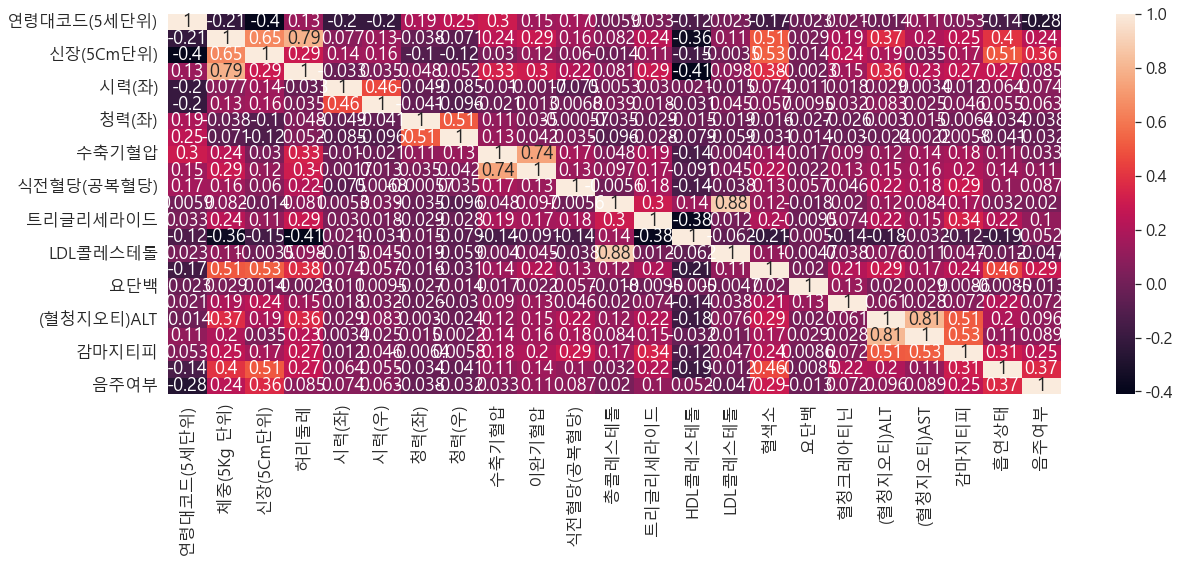

In [48]:
# annot = True 를 적용하여 각 칸안에 해당하는 숫자를 나타낼수 있게 함

plt.figure(figsize=(20,7))
sns.heatmap(df_corr, annot=True)

# 값이 겹쳐서 나오게 되므로 소수점 자리를 제한하는 것이 좋아보임

<AxesSubplot:>

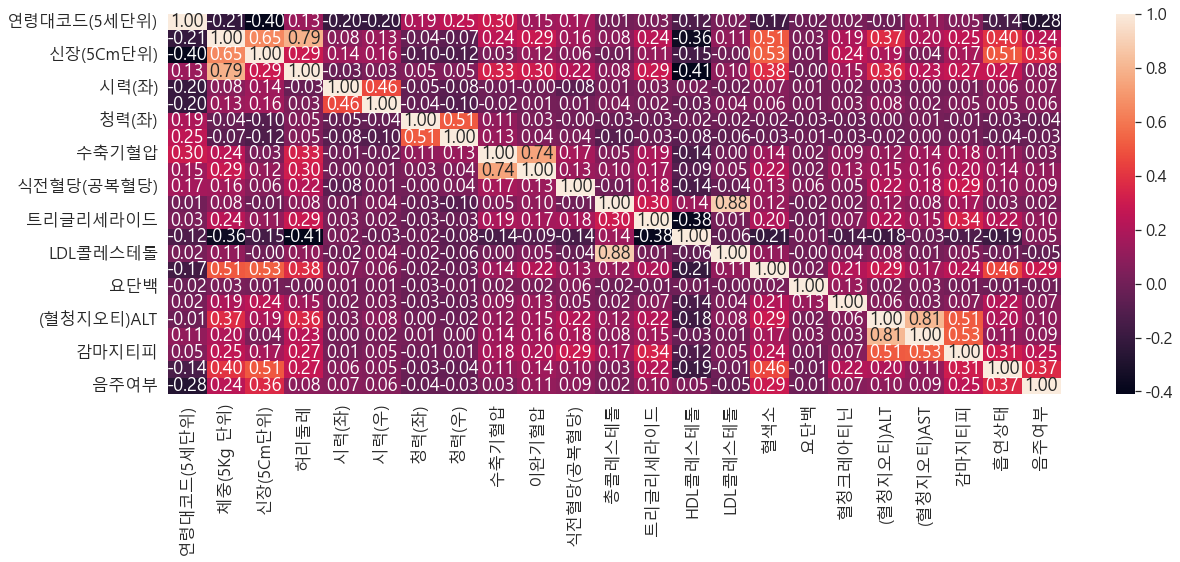

In [50]:
# fmt=.2f 를 적용하여 소숫점 아래 둘째자리 까지만 나타내게 함

plt.figure(figsize=(20,7))
sns.heatmap(df_corr, annot=True, fmt=".2f")

<AxesSubplot:>

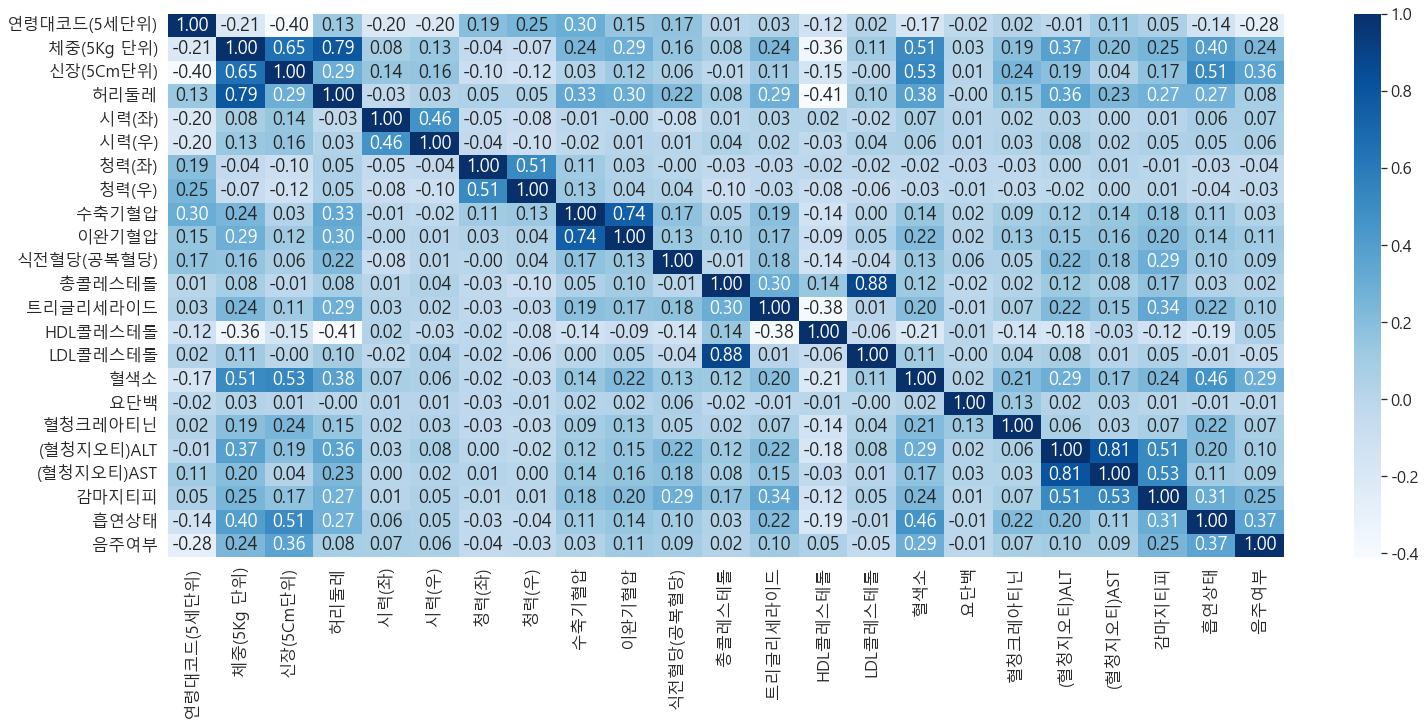

In [59]:
# cmap="Blues" 를 적용하여 파란색으로만 표시할 수 있게함
# 1에 가까울 수록 진하고 멀어질 수록 연해짐

plt.figure(figsize=(25,10))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues")

In [60]:
# 상관계수가 높은 것들을 보면
# 혈색소 : 체중, 신장
# 허리둘레 : 체중
# 체중: 신장, 허리둘레.. 등등

# 따라서 신장과 허리둘레의 크기는 체중와 상관관계가 있을까는 가설에 
# 강한 상관관계가 있음을 볼 수 있다.

#### 옵션 1. mask

위의 그래프는 대칭이므로 값이 두 개가 표시가 됨
대각선을 중심으로 값을 나누어 표시하기 위해
위의 공식문서에서 다음의 옵션을 참고

  #Generate a mask for the upper triangle <br>
`mask = np.triu(np.ones_like(corr, dtype=bool))`


In [63]:
mask = np.triu(np.ones_like(df_corr, dtype=bool))
mask

# True 로 표시된 값만 표시하게 됨

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,

<AxesSubplot:>

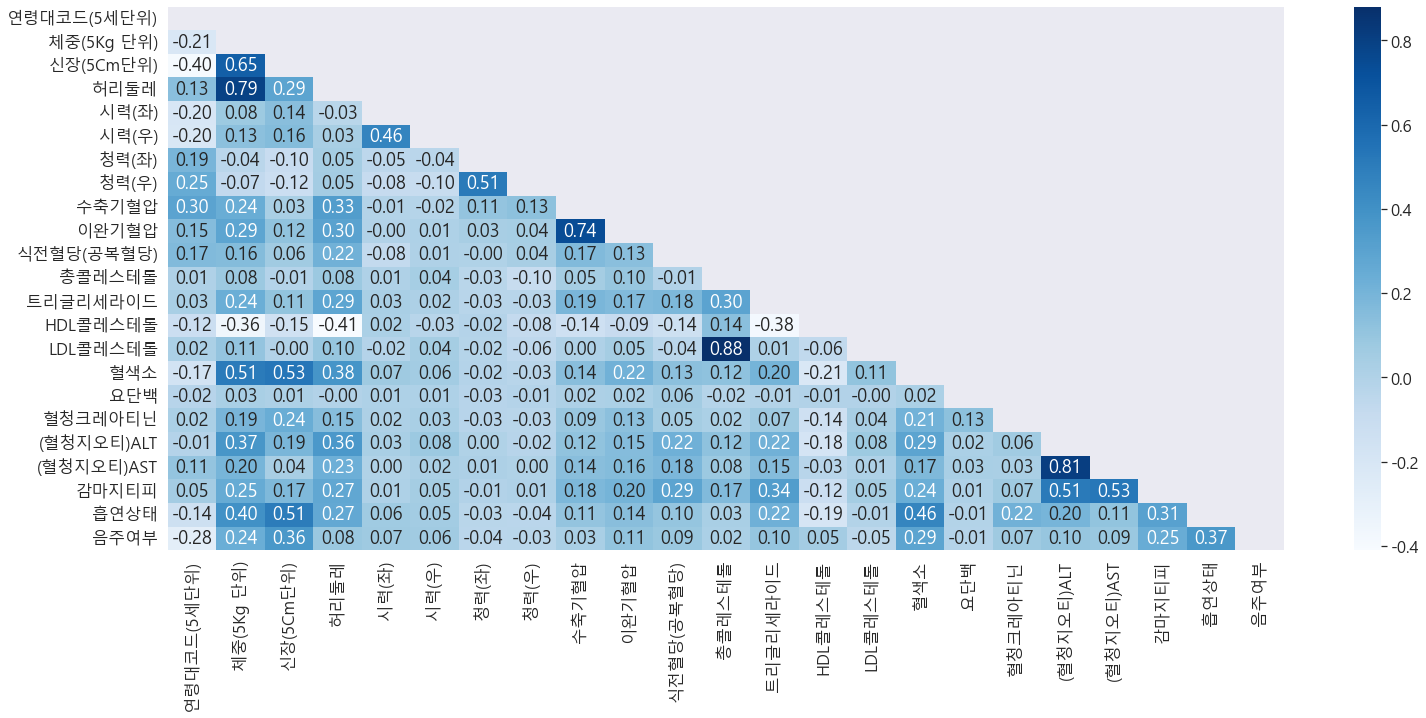

In [64]:
# 위의 히트맵에서 위의 mask를 적용

plt.figure(figsize=(25,10))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues", mask = mask)

#### 옵션2. vmax or vmin

vmax 또는 vmin 값은 색상의 농도의 기준을 어디로 할 것인지 지정한다.

### 최종결론

가설 : 신장과 허리둘레의 크기는 체중과 상관관계가 있나? <br>
결론 : 신장은 체중과 상관계수(0.65), 허리둘레(0.79)로 상관관계가 높다!

기타 음주여부 ~ 신장과 흡연상태와 약한 상관관계가 있다.

보통 100만건 이상의 데이터, 4 GB~8 GB 정도의 컴퓨터 메모리를 쓰고 있다면 
엑셀보다 pandas에서 훨씬 수월하게 분석, 시각화, 상관계수 구하기, 데이터 요약 등을 할 수 있음